In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [77]:
listostocks = (os.listdir("/home/raflicky/Desktop/NYSE_DATA/1_Hour/Nasdaq_stocks"))

In [186]:
def clean_data(files, path = "/home/raflicky/Desktop/NYSE_DATA/1_Day/Stocks"):
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
        df = pd.merge(df,stock_price,how='left',on='Date')
    return df

In [229]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [245]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [224]:
my_data_frame = clean_data(listostocks)
my_data_frame = my_data_frame.drop(['Date'], axis=1)
my_data_frame = my_data_frame.fillna(0)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [225]:
working_data = my_data_frame.iloc[0:5000]
working_data_sum = my_data_frame_sum.iloc[0:5000]
validate_data = my_data_frame.iloc[5000:]
validate_data_sum = my_data_frame_sum.iloc[5000:]

In [226]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [246]:
trainingX, trainingY = next_batch2(my_x, my_y, 100)
testingX, testingY = next_batch2(my_x, my_y, 100)

In [247]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 100)

In [159]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [302]:
# design network
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(150))
model.add(Dense(1))

Train on 4999 samples, validate on 4999 samples
Epoch 1/20000
 - 4s - loss: 499.6843 - val_loss: 489.3806
Epoch 2/20000
 - 2s - loss: 482.9629 - val_loss: 477.7245
Epoch 3/20000
 - 2s - loss: 473.9900 - val_loss: 471.2077
Epoch 4/20000
 - 2s - loss: 469.0794 - val_loss: 466.8800
Epoch 5/20000
 - 2s - loss: 464.9728 - val_loss: 462.9710
Epoch 6/20000
 - 2s - loss: 457.5789 - val_loss: 457.7225
Epoch 7/20000
 - 2s - loss: 453.1971 - val_loss: 452.9612
Epoch 8/20000
 - 2s - loss: 445.4962 - val_loss: 441.7858
Epoch 9/20000
 - 2s - loss: 437.6136 - val_loss: 434.5677
Epoch 10/20000
 - 2s - loss: 430.9890 - val_loss: 430.3121
Epoch 11/20000
 - 1s - loss: 425.4765 - val_loss: 424.3154
Epoch 12/20000
 - 2s - loss: 420.1010 - val_loss: 422.4741
Epoch 13/20000
 - 2s - loss: 417.5219 - val_loss: 420.2061
Epoch 14/20000
 - 2s - loss: 411.6934 - val_loss: 413.8674
Epoch 15/20000
 - 2s - loss: 406.5338 - val_loss: 408.3743
Epoch 16/20000
 - 2s - loss: 400.8188 - val_loss: 397.4407
Epoch 17/20000
 -

Epoch 139/20000
 - 1s - loss: 110.9830 - val_loss: 112.9444
Epoch 140/20000
 - 1s - loss: 109.6917 - val_loss: 110.0299
Epoch 141/20000
 - 1s - loss: 110.4371 - val_loss: 106.6205
Epoch 142/20000
 - 1s - loss: 108.1029 - val_loss: 106.8371
Epoch 143/20000
 - 1s - loss: 107.8104 - val_loss: 105.7250
Epoch 144/20000
 - 1s - loss: 105.8580 - val_loss: 109.2848
Epoch 145/20000
 - 1s - loss: 105.2487 - val_loss: 101.4592
Epoch 146/20000
 - 1s - loss: 103.3224 - val_loss: 102.0183
Epoch 147/20000
 - 1s - loss: 102.1838 - val_loss: 104.2127
Epoch 148/20000
 - 1s - loss: 104.2314 - val_loss: 100.6581
Epoch 149/20000
 - 1s - loss: 100.8512 - val_loss: 99.3276
Epoch 150/20000
 - 1s - loss: 99.6444 - val_loss: 96.6345
Epoch 151/20000
 - 1s - loss: 97.8017 - val_loss: 93.1244
Epoch 152/20000
 - 1s - loss: 96.2997 - val_loss: 96.6468
Epoch 153/20000
 - 2s - loss: 96.4389 - val_loss: 92.8711
Epoch 154/20000
 - 1s - loss: 94.8681 - val_loss: 95.1012
Epoch 155/20000
 - 1s - loss: 94.7649 - val_loss: 9

Epoch 280/20000
 - 1s - loss: 50.9558 - val_loss: 54.0508
Epoch 281/20000
 - 1s - loss: 51.5555 - val_loss: 47.9917
Epoch 282/20000
 - 1s - loss: 52.1568 - val_loss: 49.5679
Epoch 283/20000
 - 1s - loss: 50.4407 - val_loss: 46.8643
Epoch 284/20000
 - 1s - loss: 49.9381 - val_loss: 48.1088
Epoch 285/20000
 - 2s - loss: 49.5877 - val_loss: 47.4606
Epoch 286/20000
 - 1s - loss: 50.3092 - val_loss: 48.7039
Epoch 287/20000
 - 2s - loss: 51.4520 - val_loss: 49.4851
Epoch 288/20000
 - 1s - loss: 52.2593 - val_loss: 47.8773
Epoch 289/20000
 - 2s - loss: 50.8474 - val_loss: 48.0420
Epoch 290/20000
 - 1s - loss: 50.9655 - val_loss: 47.5555
Epoch 291/20000
 - 1s - loss: 50.1974 - val_loss: 46.8506
Epoch 292/20000
 - 1s - loss: 50.1852 - val_loss: 50.8876
Epoch 293/20000
 - 1s - loss: 50.5669 - val_loss: 49.1796
Epoch 294/20000
 - 1s - loss: 49.9209 - val_loss: 49.1402
Epoch 295/20000
 - 1s - loss: 50.2180 - val_loss: 45.0759
Epoch 296/20000
 - 1s - loss: 48.8360 - val_loss: 51.6997
Epoch 297/2000

 - 2s - loss: 32.2309 - val_loss: 29.1687
Epoch 422/20000
 - 1s - loss: 32.8621 - val_loss: 31.6599
Epoch 423/20000
 - 1s - loss: 32.3392 - val_loss: 30.0673
Epoch 424/20000
 - 2s - loss: 31.2665 - val_loss: 30.6455
Epoch 425/20000
 - 1s - loss: 31.5850 - val_loss: 30.6328
Epoch 426/20000
 - 1s - loss: 32.7876 - val_loss: 32.4197
Epoch 427/20000
 - 1s - loss: 33.6679 - val_loss: 29.6669
Epoch 428/20000
 - 1s - loss: 32.2303 - val_loss: 30.4171
Epoch 429/20000
 - 1s - loss: 32.5886 - val_loss: 28.4757
Epoch 430/20000
 - 1s - loss: 31.5364 - val_loss: 33.0027
Epoch 431/20000
 - 1s - loss: 32.9578 - val_loss: 30.8933
Epoch 432/20000
 - 1s - loss: 31.8437 - val_loss: 31.0933
Epoch 433/20000
 - 1s - loss: 32.2560 - val_loss: 33.7711
Epoch 434/20000
 - 1s - loss: 33.5209 - val_loss: 31.9629
Epoch 435/20000
 - 1s - loss: 33.9834 - val_loss: 37.1227
Epoch 436/20000
 - 1s - loss: 34.7002 - val_loss: 34.8153
Epoch 437/20000
 - 1s - loss: 34.5906 - val_loss: 31.5153
Epoch 438/20000
 - 1s - loss: 

Epoch 563/20000
 - 1s - loss: 25.2720 - val_loss: 21.8676
Epoch 564/20000
 - 1s - loss: 24.4562 - val_loss: 24.9369
Epoch 565/20000
 - 2s - loss: 25.2750 - val_loss: 23.0717
Epoch 566/20000
 - 1s - loss: 25.1778 - val_loss: 25.5664
Epoch 567/20000
 - 1s - loss: 25.1078 - val_loss: 25.2785
Epoch 568/20000
 - 1s - loss: 25.0747 - val_loss: 23.3343
Epoch 569/20000
 - 1s - loss: 25.1137 - val_loss: 27.7041
Epoch 570/20000
 - 1s - loss: 26.5706 - val_loss: 23.4828
Epoch 571/20000
 - 2s - loss: 26.5151 - val_loss: 24.7004
Epoch 572/20000
 - 1s - loss: 24.9438 - val_loss: 22.4237
Epoch 573/20000
 - 1s - loss: 25.0962 - val_loss: 23.5001
Epoch 574/20000
 - 1s - loss: 24.7769 - val_loss: 23.8800
Epoch 575/20000
 - 1s - loss: 24.0725 - val_loss: 23.4356
Epoch 576/20000
 - 1s - loss: 24.6442 - val_loss: 23.2699
Epoch 577/20000
 - 1s - loss: 23.7837 - val_loss: 21.7267
Epoch 578/20000
 - 1s - loss: 25.0895 - val_loss: 23.3193
Epoch 579/20000
 - 1s - loss: 24.7771 - val_loss: 22.7548
Epoch 580/2000

 - 1s - loss: 22.1961 - val_loss: 19.9889
Epoch 705/20000
 - 1s - loss: 22.1758 - val_loss: 19.8699
Epoch 706/20000
 - 2s - loss: 21.4435 - val_loss: 21.6446
Epoch 707/20000
 - 1s - loss: 21.7815 - val_loss: 20.7453
Epoch 708/20000
 - 1s - loss: 21.5741 - val_loss: 22.0027
Epoch 709/20000
 - 2s - loss: 21.6638 - val_loss: 20.1447
Epoch 710/20000
 - 1s - loss: 22.5255 - val_loss: 21.5190
Epoch 711/20000
 - 1s - loss: 21.7943 - val_loss: 19.1885
Epoch 712/20000
 - 1s - loss: 22.7393 - val_loss: 22.0086
Epoch 713/20000
 - 2s - loss: 21.8787 - val_loss: 21.8365
Epoch 714/20000
 - 2s - loss: 21.9950 - val_loss: 20.5717
Epoch 715/20000
 - 2s - loss: 22.2248 - val_loss: 21.6141
Epoch 716/20000
 - 2s - loss: 21.5454 - val_loss: 18.5894
Epoch 717/20000
 - 1s - loss: 22.4163 - val_loss: 22.6843
Epoch 718/20000
 - 1s - loss: 22.3584 - val_loss: 20.3192
Epoch 719/20000
 - 1s - loss: 22.6121 - val_loss: 19.8339
Epoch 720/20000
 - 2s - loss: 21.4880 - val_loss: 19.5790
Epoch 721/20000
 - 1s - loss: 

Epoch 846/20000
 - 1s - loss: 20.0950 - val_loss: 18.0638
Epoch 847/20000
 - 1s - loss: 19.6427 - val_loss: 17.6716
Epoch 848/20000
 - 1s - loss: 19.9122 - val_loss: 19.6914
Epoch 849/20000
 - 1s - loss: 21.1167 - val_loss: 19.2102
Epoch 850/20000
 - 1s - loss: 21.0199 - val_loss: 18.5703
Epoch 851/20000
 - 1s - loss: 19.7091 - val_loss: 18.0768
Epoch 852/20000
 - 2s - loss: 20.4359 - val_loss: 17.5237
Epoch 853/20000
 - 1s - loss: 19.6506 - val_loss: 17.4416
Epoch 854/20000
 - 1s - loss: 19.4056 - val_loss: 16.7303
Epoch 855/20000
 - 1s - loss: 19.8416 - val_loss: 18.0010
Epoch 856/20000
 - 1s - loss: 19.5450 - val_loss: 16.9671
Epoch 857/20000
 - 1s - loss: 20.1381 - val_loss: 17.3442
Epoch 858/20000
 - 1s - loss: 18.7645 - val_loss: 16.9336
Epoch 859/20000
 - 2s - loss: 18.9099 - val_loss: 15.2013
Epoch 860/20000
 - 2s - loss: 19.5975 - val_loss: 17.6586
Epoch 861/20000
 - 1s - loss: 18.8918 - val_loss: 16.5587
Epoch 862/20000
 - 1s - loss: 19.0834 - val_loss: 17.5500
Epoch 863/2000

 - 2s - loss: 18.2584 - val_loss: 16.6150
Epoch 988/20000
 - 1s - loss: 18.8812 - val_loss: 15.2316
Epoch 989/20000
 - 2s - loss: 17.2554 - val_loss: 15.9170
Epoch 990/20000
 - 1s - loss: 18.0312 - val_loss: 16.6937
Epoch 991/20000
 - 1s - loss: 17.6522 - val_loss: 16.1945
Epoch 992/20000
 - 2s - loss: 18.3406 - val_loss: 15.2610
Epoch 993/20000
 - 1s - loss: 18.8048 - val_loss: 15.6272
Epoch 994/20000
 - 1s - loss: 17.7442 - val_loss: 14.6707
Epoch 995/20000
 - 2s - loss: 18.1432 - val_loss: 17.1910
Epoch 996/20000
 - 1s - loss: 17.8819 - val_loss: 15.8928
Epoch 997/20000
 - 2s - loss: 18.4529 - val_loss: 15.2838
Epoch 998/20000
 - 1s - loss: 17.2600 - val_loss: 14.7018
Epoch 999/20000
 - 1s - loss: 16.4983 - val_loss: 13.6535
Epoch 1000/20000
 - 2s - loss: 16.6020 - val_loss: 16.2983
Epoch 1001/20000
 - 1s - loss: 16.9519 - val_loss: 16.0101
Epoch 1002/20000
 - 1s - loss: 18.1549 - val_loss: 17.1200
Epoch 1003/20000
 - 1s - loss: 18.2359 - val_loss: 16.1316
Epoch 1004/20000
 - 1s - l

Epoch 1127/20000
 - 2s - loss: 16.3745 - val_loss: 13.9995
Epoch 1128/20000
 - 1s - loss: 16.7023 - val_loss: 14.2775
Epoch 1129/20000
 - 2s - loss: 17.6795 - val_loss: 15.7581
Epoch 1130/20000
 - 2s - loss: 17.0339 - val_loss: 14.9862
Epoch 1131/20000
 - 2s - loss: 17.0721 - val_loss: 15.3405
Epoch 1132/20000
 - 2s - loss: 16.2739 - val_loss: 13.6540
Epoch 1133/20000
 - 2s - loss: 16.7449 - val_loss: 14.7190
Epoch 1134/20000
 - 2s - loss: 16.4303 - val_loss: 15.8678
Epoch 1135/20000
 - 1s - loss: 17.2861 - val_loss: 15.1176
Epoch 1136/20000
 - 2s - loss: 17.1884 - val_loss: 14.4799
Epoch 1137/20000
 - 1s - loss: 16.6733 - val_loss: 13.4561
Epoch 1138/20000
 - 2s - loss: 16.3446 - val_loss: 13.7025
Epoch 1139/20000
 - 2s - loss: 16.0325 - val_loss: 17.2092
Epoch 1140/20000
 - 2s - loss: 16.8941 - val_loss: 14.2691
Epoch 1141/20000
 - 2s - loss: 16.9911 - val_loss: 14.9982
Epoch 1142/20000
 - 2s - loss: 16.8363 - val_loss: 15.1676
Epoch 1143/20000
 - 2s - loss: 16.3776 - val_loss: 14.91

Epoch 1266/20000
 - 1s - loss: 15.5327 - val_loss: 13.3555
Epoch 1267/20000
 - 2s - loss: 15.5686 - val_loss: 14.2918
Epoch 1268/20000
 - 1s - loss: 15.8430 - val_loss: 13.5121
Epoch 1269/20000
 - 1s - loss: 15.9625 - val_loss: 15.1340
Epoch 1270/20000
 - 1s - loss: 15.8408 - val_loss: 14.2681
Epoch 1271/20000
 - 1s - loss: 16.2101 - val_loss: 16.0259
Epoch 1272/20000
 - 1s - loss: 16.4964 - val_loss: 15.5491
Epoch 1273/20000
 - 1s - loss: 16.5563 - val_loss: 14.5678
Epoch 1274/20000
 - 1s - loss: 15.8496 - val_loss: 14.1255
Epoch 1275/20000
 - 1s - loss: 15.8004 - val_loss: 14.5432
Epoch 1276/20000
 - 2s - loss: 15.5379 - val_loss: 15.1047
Epoch 1277/20000
 - 2s - loss: 16.6516 - val_loss: 15.3714
Epoch 1278/20000
 - 1s - loss: 17.6536 - val_loss: 15.2353
Epoch 1279/20000
 - 2s - loss: 16.3390 - val_loss: 14.1583
Epoch 1280/20000
 - 1s - loss: 16.5275 - val_loss: 16.8789
Epoch 1281/20000
 - 2s - loss: 16.9074 - val_loss: 13.2094
Epoch 1282/20000
 - 1s - loss: 15.9442 - val_loss: 15.35

Epoch 1405/20000
 - 2s - loss: 14.5993 - val_loss: 14.9596
Epoch 1406/20000
 - 1s - loss: 15.5338 - val_loss: 13.9588
Epoch 1407/20000
 - 1s - loss: 16.0436 - val_loss: 14.2032
Epoch 1408/20000
 - 1s - loss: 15.4075 - val_loss: 13.2383
Epoch 1409/20000
 - 1s - loss: 15.6196 - val_loss: 14.0439
Epoch 1410/20000
 - 1s - loss: 15.0532 - val_loss: 14.1865
Epoch 1411/20000
 - 1s - loss: 15.8259 - val_loss: 13.9432
Epoch 1412/20000
 - 1s - loss: 15.3967 - val_loss: 13.3795
Epoch 1413/20000
 - 1s - loss: 15.9491 - val_loss: 15.5995
Epoch 1414/20000
 - 1s - loss: 15.9298 - val_loss: 12.7645
Epoch 1415/20000
 - 1s - loss: 15.5087 - val_loss: 15.0093
Epoch 1416/20000
 - 2s - loss: 15.6836 - val_loss: 13.1213
Epoch 1417/20000
 - 1s - loss: 15.4062 - val_loss: 14.7152
Epoch 1418/20000
 - 1s - loss: 15.1340 - val_loss: 14.0373
Epoch 1419/20000
 - 1s - loss: 15.3534 - val_loss: 16.6329
Epoch 1420/20000
 - 1s - loss: 16.8096 - val_loss: 14.7912
Epoch 1421/20000
 - 1s - loss: 15.5404 - val_loss: 15.28

Epoch 1544/20000
 - 2s - loss: 14.7621 - val_loss: 14.0223
Epoch 1545/20000
 - 1s - loss: 15.5298 - val_loss: 15.2113
Epoch 1546/20000
 - 1s - loss: 15.4995 - val_loss: 13.7697
Epoch 1547/20000
 - 2s - loss: 14.8104 - val_loss: 13.8574
Epoch 1548/20000
 - 2s - loss: 15.8864 - val_loss: 17.2583
Epoch 1549/20000
 - 2s - loss: 16.1964 - val_loss: 13.7355
Epoch 1550/20000
 - 2s - loss: 16.0148 - val_loss: 14.6571
Epoch 1551/20000
 - 1s - loss: 15.0216 - val_loss: 12.7793
Epoch 1552/20000
 - 2s - loss: 15.6492 - val_loss: 15.0248
Epoch 1553/20000
 - 2s - loss: 14.6023 - val_loss: 13.7359
Epoch 1554/20000
 - 2s - loss: 14.9802 - val_loss: 14.9229
Epoch 1555/20000
 - 2s - loss: 15.1411 - val_loss: 13.2121
Epoch 1556/20000
 - 1s - loss: 15.6073 - val_loss: 14.6349
Epoch 1557/20000
 - 2s - loss: 16.0488 - val_loss: 13.6424
Epoch 1558/20000
 - 1s - loss: 16.1948 - val_loss: 14.8097
Epoch 1559/20000
 - 1s - loss: 15.8121 - val_loss: 14.3249
Epoch 1560/20000
 - 2s - loss: 15.7378 - val_loss: 12.77

Epoch 1683/20000
 - 1s - loss: 14.8392 - val_loss: 13.6978
Epoch 1684/20000
 - 2s - loss: 15.8057 - val_loss: 14.6679
Epoch 1685/20000
 - 1s - loss: 15.2333 - val_loss: 13.5247
Epoch 1686/20000
 - 1s - loss: 15.1209 - val_loss: 13.0584
Epoch 1687/20000
 - 1s - loss: 14.6972 - val_loss: 13.7267
Epoch 1688/20000
 - 2s - loss: 14.6144 - val_loss: 12.7378
Epoch 1689/20000
 - 1s - loss: 14.8920 - val_loss: 15.4993
Epoch 1690/20000
 - 1s - loss: 15.2349 - val_loss: 13.2267
Epoch 1691/20000
 - 1s - loss: 15.5543 - val_loss: 14.1162
Epoch 1692/20000
 - 2s - loss: 15.8683 - val_loss: 13.6128
Epoch 1693/20000
 - 2s - loss: 14.6445 - val_loss: 12.6784
Epoch 1694/20000
 - 1s - loss: 14.8462 - val_loss: 15.3058
Epoch 1695/20000
 - 1s - loss: 15.4847 - val_loss: 13.0721
Epoch 1696/20000
 - 1s - loss: 15.4052 - val_loss: 15.0356
Epoch 1697/20000
 - 1s - loss: 15.4246 - val_loss: 13.0958
Epoch 1698/20000
 - 1s - loss: 15.0681 - val_loss: 14.1177
Epoch 1699/20000
 - 1s - loss: 14.7692 - val_loss: 12.16

Epoch 1822/20000
 - 2s - loss: 15.6227 - val_loss: 13.9676
Epoch 1823/20000
 - 1s - loss: 14.8812 - val_loss: 14.7794
Epoch 1824/20000
 - 1s - loss: 15.1292 - val_loss: 13.5671
Epoch 1825/20000
 - 1s - loss: 14.9747 - val_loss: 15.0334
Epoch 1826/20000
 - 1s - loss: 15.8117 - val_loss: 12.8769
Epoch 1827/20000
 - 1s - loss: 15.4592 - val_loss: 14.5230
Epoch 1828/20000
 - 1s - loss: 14.7501 - val_loss: 11.9212
Epoch 1829/20000
 - 2s - loss: 14.2189 - val_loss: 12.8472
Epoch 1830/20000
 - 2s - loss: 14.6997 - val_loss: 12.6091
Epoch 1831/20000
 - 1s - loss: 14.3157 - val_loss: 13.1225
Epoch 1832/20000
 - 1s - loss: 14.2053 - val_loss: 12.3108
Epoch 1833/20000
 - 2s - loss: 13.9998 - val_loss: 12.7404
Epoch 1834/20000
 - 1s - loss: 14.3611 - val_loss: 13.8168
Epoch 1835/20000
 - 2s - loss: 14.3407 - val_loss: 13.5574
Epoch 1836/20000
 - 1s - loss: 14.5554 - val_loss: 13.6663
Epoch 1837/20000
 - 1s - loss: 14.7121 - val_loss: 13.3500
Epoch 1838/20000
 - 2s - loss: 14.5762 - val_loss: 12.98

Epoch 1961/20000
 - 1s - loss: 14.6597 - val_loss: 13.6148
Epoch 1962/20000
 - 1s - loss: 15.0383 - val_loss: 13.2779
Epoch 1963/20000
 - 1s - loss: 13.9920 - val_loss: 12.2891
Epoch 1964/20000
 - 2s - loss: 14.5213 - val_loss: 14.7198
Epoch 1965/20000
 - 1s - loss: 14.7991 - val_loss: 12.7497
Epoch 1966/20000
 - 1s - loss: 14.5262 - val_loss: 13.4097
Epoch 1967/20000
 - 2s - loss: 14.7718 - val_loss: 13.3330
Epoch 1968/20000
 - 1s - loss: 14.9665 - val_loss: 12.5948
Epoch 1969/20000
 - 1s - loss: 13.8116 - val_loss: 14.1699
Epoch 1970/20000
 - 2s - loss: 14.1547 - val_loss: 12.5385
Epoch 1971/20000
 - 1s - loss: 14.8306 - val_loss: 16.2030
Epoch 1972/20000
 - 1s - loss: 14.7341 - val_loss: 13.7788
Epoch 1973/20000
 - 2s - loss: 14.8914 - val_loss: 14.2231
Epoch 1974/20000
 - 1s - loss: 14.9045 - val_loss: 13.7655
Epoch 1975/20000
 - 2s - loss: 15.8190 - val_loss: 12.7962
Epoch 1976/20000
 - 1s - loss: 14.8540 - val_loss: 15.3744
Epoch 1977/20000
 - 1s - loss: 14.9352 - val_loss: 11.58

Epoch 2100/20000
 - 1s - loss: 14.5016 - val_loss: 12.9649
Epoch 2101/20000
 - 2s - loss: 14.1538 - val_loss: 14.7743
Epoch 2102/20000
 - 1s - loss: 14.2701 - val_loss: 11.9106
Epoch 2103/20000
 - 1s - loss: 13.7752 - val_loss: 13.4078
Epoch 2104/20000
 - 1s - loss: 14.0955 - val_loss: 13.1452
Epoch 2105/20000
 - 2s - loss: 13.9007 - val_loss: 12.7455
Epoch 2106/20000
 - 1s - loss: 14.5939 - val_loss: 11.9512
Epoch 2107/20000
 - 1s - loss: 14.1219 - val_loss: 14.4274
Epoch 2108/20000
 - 1s - loss: 14.2953 - val_loss: 11.8093
Epoch 2109/20000
 - 1s - loss: 14.0200 - val_loss: 13.1583
Epoch 2110/20000
 - 1s - loss: 14.0131 - val_loss: 12.1445
Epoch 2111/20000
 - 1s - loss: 13.6457 - val_loss: 12.7267
Epoch 2112/20000
 - 1s - loss: 13.4634 - val_loss: 13.1800
Epoch 2113/20000
 - 2s - loss: 13.8725 - val_loss: 12.7023
Epoch 2114/20000
 - 1s - loss: 15.3535 - val_loss: 14.5965
Epoch 2115/20000
 - 1s - loss: 14.7013 - val_loss: 11.5369
Epoch 2116/20000
 - 2s - loss: 14.3484 - val_loss: 13.65

Epoch 2239/20000
 - 2s - loss: 14.0922 - val_loss: 11.3281
Epoch 2240/20000
 - 2s - loss: 13.7444 - val_loss: 12.8281
Epoch 2241/20000
 - 2s - loss: 13.6341 - val_loss: 12.8011
Epoch 2242/20000
 - 1s - loss: 13.8750 - val_loss: 13.2865
Epoch 2243/20000
 - 2s - loss: 13.7435 - val_loss: 11.6389
Epoch 2244/20000
 - 2s - loss: 14.1721 - val_loss: 14.2169
Epoch 2245/20000
 - 2s - loss: 14.9104 - val_loss: 11.4892
Epoch 2246/20000
 - 1s - loss: 13.6034 - val_loss: 14.7563
Epoch 2247/20000
 - 1s - loss: 14.3891 - val_loss: 13.1536
Epoch 2248/20000
 - 2s - loss: 14.5586 - val_loss: 13.6563
Epoch 2249/20000
 - 2s - loss: 14.3163 - val_loss: 13.2303
Epoch 2250/20000
 - 2s - loss: 13.6383 - val_loss: 12.8280
Epoch 2251/20000
 - 1s - loss: 13.6466 - val_loss: 12.8452
Epoch 2252/20000
 - 2s - loss: 13.2607 - val_loss: 11.7859
Epoch 2253/20000
 - 2s - loss: 14.2381 - val_loss: 14.1880
Epoch 2254/20000
 - 2s - loss: 14.6028 - val_loss: 11.8758
Epoch 2255/20000
 - 1s - loss: 13.8180 - val_loss: 13.53

Epoch 2378/20000
 - 1s - loss: 14.0962 - val_loss: 11.8999
Epoch 2379/20000
 - 1s - loss: 13.3330 - val_loss: 13.9946
Epoch 2380/20000
 - 1s - loss: 14.1195 - val_loss: 11.6534
Epoch 2381/20000
 - 1s - loss: 13.8972 - val_loss: 12.4636
Epoch 2382/20000
 - 1s - loss: 13.5722 - val_loss: 13.7467
Epoch 2383/20000
 - 1s - loss: 13.5460 - val_loss: 12.2115
Epoch 2384/20000
 - 1s - loss: 14.8715 - val_loss: 15.1068
Epoch 2385/20000
 - 1s - loss: 14.6841 - val_loss: 12.0701
Epoch 2386/20000
 - 1s - loss: 13.8634 - val_loss: 13.0246
Epoch 2387/20000
 - 1s - loss: 13.5327 - val_loss: 13.9858
Epoch 2388/20000
 - 1s - loss: 14.3547 - val_loss: 11.9075
Epoch 2389/20000
 - 1s - loss: 14.2651 - val_loss: 13.6224
Epoch 2390/20000
 - 1s - loss: 14.0014 - val_loss: 12.2892
Epoch 2391/20000
 - 1s - loss: 13.4046 - val_loss: 12.3154
Epoch 2392/20000
 - 1s - loss: 13.6921 - val_loss: 12.9293
Epoch 2393/20000
 - 1s - loss: 13.1086 - val_loss: 11.5593
Epoch 2394/20000
 - 1s - loss: 14.0128 - val_loss: 12.55

Epoch 2517/20000
 - 1s - loss: 14.2445 - val_loss: 15.2432
Epoch 2518/20000
 - 1s - loss: 13.9721 - val_loss: 11.4292
Epoch 2519/20000
 - 1s - loss: 13.7917 - val_loss: 13.5800
Epoch 2520/20000
 - 1s - loss: 13.9770 - val_loss: 13.1402
Epoch 2521/20000
 - 1s - loss: 13.7268 - val_loss: 11.6903
Epoch 2522/20000
 - 1s - loss: 14.0005 - val_loss: 13.7743
Epoch 2523/20000
 - 1s - loss: 14.7144 - val_loss: 11.9577
Epoch 2524/20000
 - 1s - loss: 14.2616 - val_loss: 12.7775
Epoch 2525/20000
 - 1s - loss: 13.7414 - val_loss: 12.7862
Epoch 2526/20000
 - 1s - loss: 13.3733 - val_loss: 12.3544
Epoch 2527/20000
 - 1s - loss: 13.6646 - val_loss: 13.0699
Epoch 2528/20000
 - 1s - loss: 13.2190 - val_loss: 11.6041
Epoch 2529/20000
 - 1s - loss: 13.2472 - val_loss: 12.6113
Epoch 2530/20000
 - 1s - loss: 13.2642 - val_loss: 11.2926
Epoch 2531/20000
 - 1s - loss: 13.4330 - val_loss: 13.9676
Epoch 2532/20000
 - 1s - loss: 14.0562 - val_loss: 11.1786
Epoch 2533/20000
 - 1s - loss: 13.5405 - val_loss: 13.39

Epoch 2656/20000
 - 1s - loss: 13.6627 - val_loss: 12.6457
Epoch 2657/20000
 - 1s - loss: 13.4086 - val_loss: 12.7211
Epoch 2658/20000
 - 1s - loss: 13.3099 - val_loss: 11.8354
Epoch 2659/20000
 - 1s - loss: 13.5810 - val_loss: 15.4594
Epoch 2660/20000
 - 1s - loss: 14.6850 - val_loss: 11.4485
Epoch 2661/20000
 - 1s - loss: 14.0672 - val_loss: 12.9944
Epoch 2662/20000
 - 1s - loss: 13.6635 - val_loss: 11.9655
Epoch 2663/20000
 - 1s - loss: 13.2758 - val_loss: 11.9995
Epoch 2664/20000
 - 1s - loss: 13.0003 - val_loss: 11.5947
Epoch 2665/20000
 - 1s - loss: 12.7950 - val_loss: 12.5628
Epoch 2666/20000
 - 1s - loss: 12.8769 - val_loss: 11.4320
Epoch 2667/20000
 - 1s - loss: 12.8833 - val_loss: 12.0639
Epoch 2668/20000
 - 1s - loss: 13.6958 - val_loss: 12.8335
Epoch 2669/20000
 - 1s - loss: 13.3584 - val_loss: 11.4793
Epoch 2670/20000
 - 1s - loss: 13.3146 - val_loss: 13.3547
Epoch 2671/20000
 - 1s - loss: 13.5424 - val_loss: 11.7542
Epoch 2672/20000
 - 1s - loss: 13.3657 - val_loss: 11.66

Epoch 2795/20000
 - 1s - loss: 13.5260 - val_loss: 12.0449
Epoch 2796/20000
 - 1s - loss: 12.8341 - val_loss: 11.3590
Epoch 2797/20000
 - 1s - loss: 12.6755 - val_loss: 12.7014
Epoch 2798/20000
 - 1s - loss: 13.0449 - val_loss: 11.5206
Epoch 2799/20000
 - 1s - loss: 12.8695 - val_loss: 13.3217
Epoch 2800/20000
 - 1s - loss: 12.6273 - val_loss: 11.5301
Epoch 2801/20000
 - 1s - loss: 13.6829 - val_loss: 14.0405
Epoch 2802/20000
 - 1s - loss: 13.4314 - val_loss: 11.2403
Epoch 2803/20000
 - 1s - loss: 13.4127 - val_loss: 13.8054
Epoch 2804/20000
 - 1s - loss: 13.5337 - val_loss: 12.5287
Epoch 2805/20000
 - 1s - loss: 14.1764 - val_loss: 12.0683
Epoch 2806/20000
 - 1s - loss: 13.9653 - val_loss: 15.1426
Epoch 2807/20000
 - 1s - loss: 14.2142 - val_loss: 11.9247
Epoch 2808/20000
 - 1s - loss: 13.9117 - val_loss: 13.7047
Epoch 2809/20000
 - 1s - loss: 13.5117 - val_loss: 12.0133
Epoch 2810/20000
 - 1s - loss: 13.5812 - val_loss: 13.7978
Epoch 2811/20000
 - 1s - loss: 13.4845 - val_loss: 11.80

Epoch 2934/20000
 - 1s - loss: 13.2101 - val_loss: 13.2916
Epoch 2935/20000
 - 1s - loss: 13.2832 - val_loss: 11.5976
Epoch 2936/20000
 - 1s - loss: 13.3361 - val_loss: 12.7546
Epoch 2937/20000
 - 1s - loss: 13.4469 - val_loss: 11.3251
Epoch 2938/20000
 - 1s - loss: 13.0138 - val_loss: 11.7395
Epoch 2939/20000
 - 1s - loss: 13.0768 - val_loss: 12.8611
Epoch 2940/20000
 - 1s - loss: 12.8189 - val_loss: 11.7205
Epoch 2941/20000
 - 1s - loss: 13.1754 - val_loss: 12.1801
Epoch 2942/20000
 - 1s - loss: 12.9478 - val_loss: 12.9854
Epoch 2943/20000
 - 1s - loss: 13.6500 - val_loss: 11.2469
Epoch 2944/20000
 - 1s - loss: 14.3033 - val_loss: 14.2335
Epoch 2945/20000
 - 1s - loss: 14.0987 - val_loss: 11.9485
Epoch 2946/20000
 - 1s - loss: 13.3600 - val_loss: 11.6016
Epoch 2947/20000
 - 1s - loss: 13.1668 - val_loss: 12.5528
Epoch 2948/20000
 - 1s - loss: 13.2659 - val_loss: 11.5355
Epoch 2949/20000
 - 1s - loss: 12.5512 - val_loss: 12.3328
Epoch 2950/20000
 - 1s - loss: 12.9532 - val_loss: 10.94

Epoch 3073/20000
 - 1s - loss: 12.7198 - val_loss: 13.0061
Epoch 3074/20000
 - 1s - loss: 12.7077 - val_loss: 11.3044
Epoch 3075/20000
 - 1s - loss: 13.5850 - val_loss: 14.1196
Epoch 3076/20000
 - 1s - loss: 13.3357 - val_loss: 10.9110
Epoch 3077/20000
 - 1s - loss: 12.7382 - val_loss: 13.5915
Epoch 3078/20000
 - 1s - loss: 13.1903 - val_loss: 11.9400
Epoch 3079/20000
 - 1s - loss: 13.3411 - val_loss: 12.5735
Epoch 3080/20000
 - 1s - loss: 13.5964 - val_loss: 13.3674
Epoch 3081/20000
 - 1s - loss: 13.5853 - val_loss: 11.7799
Epoch 3082/20000
 - 1s - loss: 14.3507 - val_loss: 13.7896
Epoch 3083/20000
 - 1s - loss: 13.1877 - val_loss: 11.6847
Epoch 3084/20000
 - 1s - loss: 12.7082 - val_loss: 13.2453
Epoch 3085/20000
 - 1s - loss: 13.5887 - val_loss: 12.4714
Epoch 3086/20000
 - 1s - loss: 12.8963 - val_loss: 12.0265
Epoch 3087/20000
 - 1s - loss: 13.1994 - val_loss: 13.1341
Epoch 3088/20000
 - 1s - loss: 13.1202 - val_loss: 11.8458
Epoch 3089/20000
 - 1s - loss: 13.0089 - val_loss: 12.83

Epoch 3212/20000
 - 1s - loss: 12.5881 - val_loss: 12.7135
Epoch 3213/20000
 - 1s - loss: 13.2634 - val_loss: 11.7393
Epoch 3214/20000
 - 1s - loss: 13.2394 - val_loss: 14.3827
Epoch 3215/20000
 - 1s - loss: 13.6678 - val_loss: 11.1999
Epoch 3216/20000
 - 1s - loss: 13.2298 - val_loss: 13.0001
Epoch 3217/20000
 - 1s - loss: 12.9700 - val_loss: 10.9414
Epoch 3218/20000
 - 1s - loss: 12.8504 - val_loss: 12.8196
Epoch 3219/20000
 - 1s - loss: 12.8485 - val_loss: 11.5989
Epoch 3220/20000
 - 1s - loss: 12.6577 - val_loss: 12.1400
Epoch 3221/20000
 - 1s - loss: 12.6000 - val_loss: 13.0017
Epoch 3222/20000
 - 1s - loss: 12.6518 - val_loss: 11.3410
Epoch 3223/20000
 - 1s - loss: 12.8829 - val_loss: 13.1929
Epoch 3224/20000
 - 1s - loss: 13.0459 - val_loss: 12.4005
Epoch 3225/20000
 - 1s - loss: 13.7182 - val_loss: 13.7610
Epoch 3226/20000
 - 1s - loss: 13.1587 - val_loss: 12.1756
Epoch 3227/20000
 - 1s - loss: 13.2678 - val_loss: 12.3341
Epoch 3228/20000
 - 1s - loss: 12.9572 - val_loss: 12.14

Epoch 3351/20000
 - 1s - loss: 13.6358 - val_loss: 10.9980
Epoch 3352/20000
 - 1s - loss: 12.7534 - val_loss: 13.6753
Epoch 3353/20000
 - 1s - loss: 13.8471 - val_loss: 12.1229
Epoch 3354/20000
 - 1s - loss: 13.5535 - val_loss: 13.3416
Epoch 3355/20000
 - 1s - loss: 12.9836 - val_loss: 10.7445
Epoch 3356/20000
 - 1s - loss: 12.7258 - val_loss: 13.7379
Epoch 3357/20000
 - 1s - loss: 13.7853 - val_loss: 11.1605
Epoch 3358/20000
 - 1s - loss: 13.1334 - val_loss: 12.5468
Epoch 3359/20000
 - 1s - loss: 12.6207 - val_loss: 12.2613
Epoch 3360/20000
 - 1s - loss: 12.6485 - val_loss: 11.1867
Epoch 3361/20000
 - 1s - loss: 12.9868 - val_loss: 12.0152
Epoch 3362/20000
 - 1s - loss: 12.4347 - val_loss: 12.9872
Epoch 3363/20000
 - 1s - loss: 13.4290 - val_loss: 11.4591
Epoch 3364/20000
 - 1s - loss: 12.4497 - val_loss: 11.8842
Epoch 3365/20000
 - 1s - loss: 12.9625 - val_loss: 12.3154
Epoch 3366/20000
 - 1s - loss: 13.0223 - val_loss: 11.6631
Epoch 3367/20000
 - 1s - loss: 12.8760 - val_loss: 13.30

Epoch 3490/20000
 - 1s - loss: 12.7491 - val_loss: 12.0646
Epoch 3491/20000
 - 1s - loss: 12.5046 - val_loss: 11.4534
Epoch 3492/20000
 - 1s - loss: 13.4762 - val_loss: 13.7696
Epoch 3493/20000
 - 1s - loss: 13.0524 - val_loss: 10.5391
Epoch 3494/20000
 - 1s - loss: 12.3007 - val_loss: 12.9444
Epoch 3495/20000
 - 1s - loss: 12.2510 - val_loss: 11.2393
Epoch 3496/20000
 - 1s - loss: 12.3860 - val_loss: 11.8125
Epoch 3497/20000
 - 1s - loss: 12.9056 - val_loss: 13.4275
Epoch 3498/20000
 - 1s - loss: 13.4428 - val_loss: 11.6245
Epoch 3499/20000
 - 1s - loss: 13.0932 - val_loss: 12.8554
Epoch 3500/20000
 - 1s - loss: 13.6773 - val_loss: 13.1524
Epoch 3501/20000
 - 1s - loss: 13.3860 - val_loss: 11.3612
Epoch 3502/20000
 - 1s - loss: 13.1808 - val_loss: 13.3173
Epoch 3503/20000
 - 1s - loss: 12.7630 - val_loss: 11.0491
Epoch 3504/20000
 - 1s - loss: 13.1232 - val_loss: 13.4218
Epoch 3505/20000
 - 1s - loss: 13.0197 - val_loss: 11.5116
Epoch 3506/20000
 - 1s - loss: 13.0079 - val_loss: 12.89

Epoch 3629/20000
 - 1s - loss: 12.6677 - val_loss: 12.4434
Epoch 3630/20000
 - 1s - loss: 12.6857 - val_loss: 12.8361
Epoch 3631/20000
 - 1s - loss: 12.3902 - val_loss: 11.7714
Epoch 3632/20000
 - 1s - loss: 13.1757 - val_loss: 12.4172
Epoch 3633/20000
 - 1s - loss: 12.8459 - val_loss: 13.2284
Epoch 3634/20000
 - 1s - loss: 13.0235 - val_loss: 12.1538
Epoch 3635/20000
 - 1s - loss: 13.0786 - val_loss: 12.1390
Epoch 3636/20000
 - 1s - loss: 12.0123 - val_loss: 12.5739
Epoch 3637/20000
 - 1s - loss: 12.4304 - val_loss: 11.9316
Epoch 3638/20000
 - 1s - loss: 12.9624 - val_loss: 11.9659
Epoch 3639/20000
 - 1s - loss: 13.2800 - val_loss: 12.8669
Epoch 3640/20000
 - 1s - loss: 13.1044 - val_loss: 12.5889
Epoch 3641/20000
 - 1s - loss: 12.8257 - val_loss: 11.6095
Epoch 3642/20000
 - 1s - loss: 12.5558 - val_loss: 12.4204
Epoch 3643/20000
 - 1s - loss: 12.7270 - val_loss: 12.6143
Epoch 3644/20000
 - 1s - loss: 12.7626 - val_loss: 11.4764
Epoch 3645/20000
 - 1s - loss: 13.1355 - val_loss: 12.16

Epoch 3768/20000
 - 1s - loss: 12.9543 - val_loss: 11.4613
Epoch 3769/20000
 - 1s - loss: 12.5013 - val_loss: 12.7021
Epoch 3770/20000
 - 1s - loss: 12.4952 - val_loss: 11.7041
Epoch 3771/20000
 - 1s - loss: 12.8127 - val_loss: 11.7087
Epoch 3772/20000
 - 1s - loss: 12.5707 - val_loss: 12.1579
Epoch 3773/20000
 - 1s - loss: 12.5965 - val_loss: 12.3185
Epoch 3774/20000
 - 1s - loss: 12.5345 - val_loss: 11.5313
Epoch 3775/20000
 - 1s - loss: 12.8058 - val_loss: 12.1174
Epoch 3776/20000
 - 1s - loss: 12.4708 - val_loss: 11.8461
Epoch 3777/20000
 - 1s - loss: 12.6114 - val_loss: 11.7209
Epoch 3778/20000
 - 1s - loss: 12.5982 - val_loss: 12.4021
Epoch 3779/20000
 - 1s - loss: 12.9397 - val_loss: 12.3080
Epoch 3780/20000
 - 1s - loss: 13.0383 - val_loss: 11.9510
Epoch 3781/20000
 - 1s - loss: 12.5505 - val_loss: 13.1082
Epoch 3782/20000
 - 1s - loss: 12.7177 - val_loss: 11.0338
Epoch 3783/20000
 - 1s - loss: 12.3289 - val_loss: 12.6900
Epoch 3784/20000
 - 1s - loss: 12.2877 - val_loss: 11.26

Epoch 3907/20000
 - 1s - loss: 12.6090 - val_loss: 12.2161
Epoch 3908/20000
 - 1s - loss: 13.8296 - val_loss: 12.6301
Epoch 3909/20000
 - 1s - loss: 13.5940 - val_loss: 12.3591
Epoch 3910/20000
 - 1s - loss: 13.2707 - val_loss: 12.3404
Epoch 3911/20000
 - 1s - loss: 13.1576 - val_loss: 12.5669
Epoch 3912/20000
 - 1s - loss: 13.2532 - val_loss: 11.5310
Epoch 3913/20000
 - 1s - loss: 13.0326 - val_loss: 12.2459
Epoch 3914/20000
 - 1s - loss: 12.4306 - val_loss: 11.7040
Epoch 3915/20000
 - 1s - loss: 12.9429 - val_loss: 11.7516
Epoch 3916/20000
 - 1s - loss: 12.0679 - val_loss: 11.9426
Epoch 3917/20000
 - 1s - loss: 12.9286 - val_loss: 12.1894
Epoch 3918/20000
 - 1s - loss: 13.1176 - val_loss: 11.2404
Epoch 3919/20000
 - 1s - loss: 12.2437 - val_loss: 11.9832
Epoch 3920/20000
 - 1s - loss: 12.1026 - val_loss: 12.4319
Epoch 3921/20000
 - 1s - loss: 12.3912 - val_loss: 12.3156
Epoch 3922/20000
 - 1s - loss: 12.3609 - val_loss: 11.4404
Epoch 3923/20000
 - 1s - loss: 12.6655 - val_loss: 12.67

Epoch 4046/20000
 - 1s - loss: 12.8131 - val_loss: 12.8047
Epoch 4047/20000
 - 1s - loss: 12.8439 - val_loss: 11.5941
Epoch 4048/20000
 - 1s - loss: 12.6874 - val_loss: 12.5991
Epoch 4049/20000
 - 1s - loss: 12.6014 - val_loss: 11.4934
Epoch 4050/20000
 - 1s - loss: 12.3795 - val_loss: 12.8325
Epoch 4051/20000
 - 1s - loss: 11.8125 - val_loss: 10.6655
Epoch 4052/20000
 - 1s - loss: 12.1301 - val_loss: 12.7618
Epoch 4053/20000
 - 1s - loss: 12.5580 - val_loss: 10.9082
Epoch 4054/20000
 - 1s - loss: 12.5729 - val_loss: 13.3137
Epoch 4055/20000
 - 1s - loss: 12.5902 - val_loss: 10.4736
Epoch 4056/20000
 - 1s - loss: 12.8704 - val_loss: 12.8442
Epoch 4057/20000
 - 1s - loss: 12.8840 - val_loss: 11.8102
Epoch 4058/20000
 - 1s - loss: 12.4085 - val_loss: 11.0034
Epoch 4059/20000
 - 1s - loss: 12.6287 - val_loss: 12.5481
Epoch 4060/20000
 - 1s - loss: 12.7417 - val_loss: 10.6633
Epoch 4061/20000
 - 1s - loss: 11.9996 - val_loss: 12.2872
Epoch 4062/20000
 - 1s - loss: 11.8325 - val_loss: 10.89

Epoch 4185/20000
 - 1s - loss: 12.1869 - val_loss: 12.3404
Epoch 4186/20000
 - 1s - loss: 12.3468 - val_loss: 10.9775
Epoch 4187/20000
 - 1s - loss: 12.6817 - val_loss: 12.1066
Epoch 4188/20000
 - 1s - loss: 12.3123 - val_loss: 11.1174
Epoch 4189/20000
 - 1s - loss: 12.5957 - val_loss: 11.6653
Epoch 4190/20000
 - 1s - loss: 12.2932 - val_loss: 11.0495
Epoch 4191/20000
 - 1s - loss: 11.8417 - val_loss: 11.1553
Epoch 4192/20000
 - 1s - loss: 12.0467 - val_loss: 10.6512
Epoch 4193/20000
 - 1s - loss: 11.5244 - val_loss: 12.2352
Epoch 4194/20000
 - 1s - loss: 11.6848 - val_loss: 11.2093
Epoch 4195/20000
 - 1s - loss: 12.7843 - val_loss: 12.3320
Epoch 4196/20000
 - 1s - loss: 12.6453 - val_loss: 12.6321
Epoch 4197/20000
 - 1s - loss: 12.7489 - val_loss: 12.4351
Epoch 4198/20000
 - 1s - loss: 13.0540 - val_loss: 11.3629
Epoch 4199/20000
 - 1s - loss: 12.5826 - val_loss: 13.4228
Epoch 4200/20000
 - 1s - loss: 12.0543 - val_loss: 10.3992
Epoch 4201/20000
 - 1s - loss: 12.5542 - val_loss: 12.96

Epoch 4324/20000
 - 1s - loss: 13.2411 - val_loss: 12.7553
Epoch 4325/20000
 - 1s - loss: 12.4906 - val_loss: 11.4085
Epoch 4326/20000
 - 1s - loss: 12.5185 - val_loss: 11.3243
Epoch 4327/20000
 - 1s - loss: 12.4628 - val_loss: 12.8630
Epoch 4328/20000
 - 1s - loss: 12.9987 - val_loss: 10.1969
Epoch 4329/20000
 - 1s - loss: 12.0124 - val_loss: 13.6070
Epoch 4330/20000
 - 1s - loss: 13.1406 - val_loss: 12.4506
Epoch 4331/20000
 - 1s - loss: 14.2652 - val_loss: 11.9248
Epoch 4332/20000
 - 1s - loss: 12.7903 - val_loss: 11.7874
Epoch 4333/20000
 - 1s - loss: 12.4236 - val_loss: 10.8746
Epoch 4334/20000
 - 1s - loss: 12.3895 - val_loss: 12.3851
Epoch 4335/20000
 - 1s - loss: 12.5247 - val_loss: 11.2424
Epoch 4336/20000
 - 1s - loss: 12.6250 - val_loss: 12.5760
Epoch 4337/20000
 - 1s - loss: 12.2185 - val_loss: 11.4952
Epoch 4338/20000
 - 1s - loss: 12.2398 - val_loss: 12.3789
Epoch 4339/20000
 - 1s - loss: 12.4143 - val_loss: 10.5770
Epoch 4340/20000
 - 1s - loss: 12.4475 - val_loss: 12.45

Epoch 4463/20000
 - 1s - loss: 12.3454 - val_loss: 11.1866
Epoch 4464/20000
 - 1s - loss: 12.3732 - val_loss: 12.9677
Epoch 4465/20000
 - 1s - loss: 12.7189 - val_loss: 10.8142
Epoch 4466/20000
 - 1s - loss: 12.5922 - val_loss: 12.2144
Epoch 4467/20000
 - 1s - loss: 12.1956 - val_loss: 10.9454
Epoch 4468/20000
 - 1s - loss: 12.1546 - val_loss: 12.1108
Epoch 4469/20000
 - 1s - loss: 11.8909 - val_loss: 10.4611
Epoch 4470/20000
 - 1s - loss: 12.1633 - val_loss: 13.1888
Epoch 4471/20000
 - 1s - loss: 12.5017 - val_loss: 10.1415
Epoch 4472/20000
 - 1s - loss: 12.1535 - val_loss: 11.4709
Epoch 4473/20000
 - 1s - loss: 11.6494 - val_loss: 11.4790
Epoch 4474/20000
 - 1s - loss: 11.9128 - val_loss: 10.9923
Epoch 4475/20000
 - 1s - loss: 12.0382 - val_loss: 11.0353
Epoch 4476/20000
 - 1s - loss: 11.9492 - val_loss: 11.7033
Epoch 4477/20000
 - 1s - loss: 11.9435 - val_loss: 11.0007
Epoch 4478/20000
 - 1s - loss: 11.9941 - val_loss: 12.0154
Epoch 4479/20000
 - 1s - loss: 12.8408 - val_loss: 11.95

Epoch 4602/20000
 - 1s - loss: 12.4513 - val_loss: 11.0566
Epoch 4603/20000
 - 1s - loss: 12.2168 - val_loss: 11.8745
Epoch 4604/20000
 - 1s - loss: 12.2217 - val_loss: 11.7909
Epoch 4605/20000
 - 1s - loss: 12.5080 - val_loss: 12.6043
Epoch 4606/20000
 - 1s - loss: 12.4183 - val_loss: 10.8726
Epoch 4607/20000
 - 1s - loss: 12.2818 - val_loss: 11.6927
Epoch 4608/20000
 - 1s - loss: 12.1563 - val_loss: 12.0019
Epoch 4609/20000
 - 1s - loss: 12.3362 - val_loss: 10.0205
Epoch 4610/20000
 - 1s - loss: 12.5386 - val_loss: 11.9316
Epoch 4611/20000
 - 1s - loss: 12.4779 - val_loss: 11.0312
Epoch 4612/20000
 - 1s - loss: 12.1309 - val_loss: 11.6432
Epoch 4613/20000
 - 1s - loss: 12.1385 - val_loss: 11.5390
Epoch 4614/20000
 - 1s - loss: 12.0859 - val_loss: 10.3545
Epoch 4615/20000
 - 1s - loss: 12.1226 - val_loss: 12.1468
Epoch 4616/20000
 - 1s - loss: 12.2412 - val_loss: 11.8510
Epoch 4617/20000
 - 1s - loss: 11.9143 - val_loss: 11.7377
Epoch 4618/20000
 - 1s - loss: 12.2432 - val_loss: 10.78

Epoch 4741/20000
 - 1s - loss: 12.4451 - val_loss: 12.6418
Epoch 4742/20000
 - 1s - loss: 12.5809 - val_loss: 11.0362
Epoch 4743/20000
 - 1s - loss: 12.1902 - val_loss: 12.6690
Epoch 4744/20000
 - 1s - loss: 12.1178 - val_loss: 11.7473
Epoch 4745/20000
 - 1s - loss: 12.9345 - val_loss: 13.1125
Epoch 4746/20000
 - 1s - loss: 12.7735 - val_loss: 11.5356
Epoch 4747/20000
 - 1s - loss: 12.6424 - val_loss: 10.9484
Epoch 4748/20000
 - 1s - loss: 12.1303 - val_loss: 11.5603
Epoch 4749/20000
 - 1s - loss: 12.4928 - val_loss: 11.5440
Epoch 4750/20000
 - 1s - loss: 12.3873 - val_loss: 11.5972
Epoch 4751/20000
 - 1s - loss: 12.1972 - val_loss: 11.3961
Epoch 4752/20000
 - 1s - loss: 11.8443 - val_loss: 11.3778
Epoch 4753/20000
 - 1s - loss: 12.2026 - val_loss: 11.9315
Epoch 4754/20000
 - 1s - loss: 11.9143 - val_loss: 10.2703
Epoch 4755/20000
 - 1s - loss: 11.8584 - val_loss: 11.8676
Epoch 4756/20000
 - 1s - loss: 11.9223 - val_loss: 10.7770
Epoch 4757/20000
 - 1s - loss: 11.9034 - val_loss: 11.00

Epoch 4880/20000
 - 1s - loss: 11.8277 - val_loss: 10.5525
Epoch 4881/20000
 - 1s - loss: 11.9190 - val_loss: 11.5620
Epoch 4882/20000
 - 1s - loss: 11.4386 - val_loss: 11.4724
Epoch 4883/20000
 - 1s - loss: 11.7161 - val_loss: 10.7387
Epoch 4884/20000
 - 1s - loss: 11.8109 - val_loss: 11.3437
Epoch 4885/20000
 - 1s - loss: 11.7051 - val_loss: 11.1307
Epoch 4886/20000
 - 1s - loss: 11.5431 - val_loss: 10.3509
Epoch 4887/20000
 - 1s - loss: 11.7196 - val_loss: 11.1883
Epoch 4888/20000
 - 1s - loss: 11.8640 - val_loss: 11.1944
Epoch 4889/20000
 - 1s - loss: 12.4713 - val_loss: 12.8884
Epoch 4890/20000
 - 1s - loss: 12.4000 - val_loss: 11.4026
Epoch 4891/20000
 - 1s - loss: 12.4618 - val_loss: 11.3450
Epoch 4892/20000
 - 1s - loss: 12.4392 - val_loss: 11.9905
Epoch 4893/20000
 - 1s - loss: 12.0531 - val_loss: 10.3445
Epoch 4894/20000
 - 1s - loss: 11.8003 - val_loss: 12.1835
Epoch 4895/20000
 - 1s - loss: 12.4826 - val_loss: 11.1413
Epoch 4896/20000
 - 1s - loss: 11.9681 - val_loss: 11.24

Epoch 5019/20000
 - 1s - loss: 12.3317 - val_loss: 10.3984
Epoch 5020/20000
 - 1s - loss: 12.0373 - val_loss: 11.5456
Epoch 5021/20000
 - 1s - loss: 12.0923 - val_loss: 11.8110
Epoch 5022/20000
 - 1s - loss: 12.1336 - val_loss: 11.5340
Epoch 5023/20000
 - 1s - loss: 12.0946 - val_loss: 10.6497
Epoch 5024/20000
 - 1s - loss: 12.4284 - val_loss: 12.4844
Epoch 5025/20000
 - 1s - loss: 12.1207 - val_loss: 10.0481
Epoch 5026/20000
 - 1s - loss: 11.5141 - val_loss: 11.4947
Epoch 5027/20000
 - 1s - loss: 11.9473 - val_loss: 11.2692
Epoch 5028/20000
 - 1s - loss: 12.0200 - val_loss: 10.9279
Epoch 5029/20000
 - 1s - loss: 11.7962 - val_loss: 11.7997
Epoch 5030/20000
 - 1s - loss: 12.2083 - val_loss: 10.9673
Epoch 5031/20000
 - 1s - loss: 11.8039 - val_loss: 10.9565
Epoch 5032/20000
 - 1s - loss: 11.6995 - val_loss: 10.5369
Epoch 5033/20000
 - 1s - loss: 11.3868 - val_loss: 11.1946
Epoch 5034/20000
 - 1s - loss: 11.4136 - val_loss: 10.7849
Epoch 5035/20000
 - 1s - loss: 11.8000 - val_loss: 11.21

Epoch 5158/20000
 - 1s - loss: 12.1645 - val_loss: 11.3897
Epoch 5159/20000
 - 1s - loss: 13.1720 - val_loss: 12.4636
Epoch 5160/20000
 - 1s - loss: 12.7588 - val_loss: 11.0454
Epoch 5161/20000
 - 1s - loss: 12.8862 - val_loss: 11.5244
Epoch 5162/20000
 - 1s - loss: 12.2620 - val_loss: 12.3540
Epoch 5163/20000
 - 1s - loss: 12.7103 - val_loss: 12.3637
Epoch 5164/20000
 - 1s - loss: 11.8659 - val_loss: 9.7023
Epoch 5165/20000
 - 1s - loss: 12.1564 - val_loss: 12.0973
Epoch 5166/20000
 - 1s - loss: 12.2054 - val_loss: 10.7864
Epoch 5167/20000
 - 1s - loss: 12.2776 - val_loss: 12.5275
Epoch 5168/20000
 - 1s - loss: 12.1320 - val_loss: 10.6957
Epoch 5169/20000
 - 1s - loss: 12.5260 - val_loss: 11.2670
Epoch 5170/20000
 - 1s - loss: 12.4678 - val_loss: 12.0521
Epoch 5171/20000
 - 1s - loss: 12.3417 - val_loss: 10.8558
Epoch 5172/20000
 - 1s - loss: 11.6613 - val_loss: 11.8668
Epoch 5173/20000
 - 1s - loss: 11.9479 - val_loss: 10.5661
Epoch 5174/20000
 - 1s - loss: 12.0062 - val_loss: 14.084

Epoch 5297/20000
 - 1s - loss: 11.7915 - val_loss: 10.9520
Epoch 5298/20000
 - 1s - loss: 11.8515 - val_loss: 12.5879
Epoch 5299/20000
 - 1s - loss: 12.1308 - val_loss: 10.3565
Epoch 5300/20000
 - 1s - loss: 11.8176 - val_loss: 12.8501
Epoch 5301/20000
 - 1s - loss: 12.0841 - val_loss: 10.9648
Epoch 5302/20000
 - 1s - loss: 12.5594 - val_loss: 11.9187
Epoch 5303/20000
 - 1s - loss: 12.9000 - val_loss: 13.2678
Epoch 5304/20000
 - 1s - loss: 12.0356 - val_loss: 10.4082
Epoch 5305/20000
 - 1s - loss: 12.1788 - val_loss: 12.5649
Epoch 5306/20000
 - 1s - loss: 11.8790 - val_loss: 10.9961
Epoch 5307/20000
 - 1s - loss: 11.6975 - val_loss: 10.8318
Epoch 5308/20000
 - 1s - loss: 11.5030 - val_loss: 11.7160
Epoch 5309/20000
 - 1s - loss: 11.7817 - val_loss: 11.5092
Epoch 5310/20000
 - 1s - loss: 11.4528 - val_loss: 11.3949
Epoch 5311/20000
 - 1s - loss: 11.2226 - val_loss: 10.4826
Epoch 5312/20000
 - 1s - loss: 11.4979 - val_loss: 12.0574
Epoch 5313/20000
 - 1s - loss: 11.9488 - val_loss: 10.62

Epoch 5436/20000
 - 1s - loss: 11.5258 - val_loss: 11.3648
Epoch 5437/20000
 - 1s - loss: 11.3425 - val_loss: 11.1580
Epoch 5438/20000
 - 1s - loss: 11.8939 - val_loss: 13.0648
Epoch 5439/20000
 - 1s - loss: 11.8432 - val_loss: 10.3638
Epoch 5440/20000
 - 1s - loss: 11.7976 - val_loss: 12.0104
Epoch 5441/20000
 - 1s - loss: 11.5830 - val_loss: 9.9143
Epoch 5442/20000
 - 1s - loss: 11.4403 - val_loss: 12.4309
Epoch 5443/20000
 - 1s - loss: 11.6939 - val_loss: 11.0770
Epoch 5444/20000
 - 1s - loss: 11.8208 - val_loss: 10.9390
Epoch 5445/20000
 - 1s - loss: 11.9636 - val_loss: 12.8164
Epoch 5446/20000
 - 1s - loss: 12.3877 - val_loss: 10.7564
Epoch 5447/20000
 - 1s - loss: 12.0071 - val_loss: 11.8987
Epoch 5448/20000
 - 1s - loss: 11.6357 - val_loss: 10.2939
Epoch 5449/20000
 - 1s - loss: 11.6253 - val_loss: 12.1267
Epoch 5450/20000
 - 1s - loss: 11.4611 - val_loss: 10.4672
Epoch 5451/20000
 - 1s - loss: 11.7790 - val_loss: 11.2118
Epoch 5452/20000
 - 1s - loss: 11.6849 - val_loss: 12.157

Epoch 5575/20000
 - 1s - loss: 11.6432 - val_loss: 11.1628
Epoch 5576/20000
 - 1s - loss: 11.3732 - val_loss: 11.8942
Epoch 5577/20000
 - 1s - loss: 11.2869 - val_loss: 10.7660
Epoch 5578/20000
 - 1s - loss: 11.3150 - val_loss: 11.6799
Epoch 5579/20000
 - 1s - loss: 11.5078 - val_loss: 10.9370
Epoch 5580/20000
 - 1s - loss: 11.4306 - val_loss: 12.2675
Epoch 5581/20000
 - 1s - loss: 11.6917 - val_loss: 9.7902
Epoch 5582/20000
 - 1s - loss: 11.6971 - val_loss: 11.5918
Epoch 5583/20000
 - 1s - loss: 11.7681 - val_loss: 11.9102
Epoch 5584/20000
 - 1s - loss: 11.6765 - val_loss: 11.3828
Epoch 5585/20000
 - 1s - loss: 11.2885 - val_loss: 11.4061
Epoch 5586/20000
 - 1s - loss: 11.5383 - val_loss: 10.8575
Epoch 5587/20000
 - 1s - loss: 11.9489 - val_loss: 12.4601
Epoch 5588/20000
 - 1s - loss: 11.9048 - val_loss: 10.2746
Epoch 5589/20000
 - 1s - loss: 12.1752 - val_loss: 12.1401
Epoch 5590/20000
 - 1s - loss: 12.0188 - val_loss: 12.0132
Epoch 5591/20000
 - 1s - loss: 11.5937 - val_loss: 9.4907

Epoch 5714/20000
 - 1s - loss: 11.6437 - val_loss: 10.5994
Epoch 5715/20000
 - 1s - loss: 11.3723 - val_loss: 11.1294
Epoch 5716/20000
 - 1s - loss: 11.3174 - val_loss: 11.1569
Epoch 5717/20000
 - 1s - loss: 11.8449 - val_loss: 11.7841
Epoch 5718/20000
 - 1s - loss: 11.4549 - val_loss: 10.5647
Epoch 5719/20000
 - 1s - loss: 12.5306 - val_loss: 11.4472
Epoch 5720/20000
 - 1s - loss: 11.8560 - val_loss: 11.5765
Epoch 5721/20000
 - 1s - loss: 12.2028 - val_loss: 11.6001
Epoch 5722/20000
 - 1s - loss: 11.6029 - val_loss: 11.4860
Epoch 5723/20000
 - 1s - loss: 11.6193 - val_loss: 11.0414
Epoch 5724/20000
 - 1s - loss: 11.6352 - val_loss: 10.9246
Epoch 5725/20000
 - 1s - loss: 11.9360 - val_loss: 11.2223
Epoch 5726/20000
 - 1s - loss: 11.2642 - val_loss: 11.8088
Epoch 5727/20000
 - 1s - loss: 11.5114 - val_loss: 10.4168
Epoch 5728/20000
 - 1s - loss: 11.6402 - val_loss: 10.9004
Epoch 5729/20000
 - 1s - loss: 11.6494 - val_loss: 11.9325
Epoch 5730/20000
 - 1s - loss: 11.6551 - val_loss: 10.04

Epoch 5853/20000
 - 1s - loss: 11.7422 - val_loss: 10.9568
Epoch 5854/20000
 - 1s - loss: 11.7525 - val_loss: 12.1917
Epoch 5855/20000
 - 1s - loss: 11.4485 - val_loss: 10.2525
Epoch 5856/20000
 - 1s - loss: 11.3782 - val_loss: 11.6745
Epoch 5857/20000
 - 1s - loss: 11.6091 - val_loss: 11.0871
Epoch 5858/20000
 - 1s - loss: 11.5284 - val_loss: 11.4700
Epoch 5859/20000
 - 1s - loss: 11.6541 - val_loss: 11.3742
Epoch 5860/20000
 - 1s - loss: 11.9716 - val_loss: 11.3616
Epoch 5861/20000
 - 1s - loss: 11.9286 - val_loss: 11.2855
Epoch 5862/20000
 - 1s - loss: 11.8655 - val_loss: 11.0915
Epoch 5863/20000
 - 1s - loss: 11.9099 - val_loss: 11.3905
Epoch 5864/20000
 - 1s - loss: 11.8089 - val_loss: 11.1908
Epoch 5865/20000
 - 1s - loss: 11.6585 - val_loss: 11.4106
Epoch 5866/20000
 - 1s - loss: 11.6669 - val_loss: 11.1089
Epoch 5867/20000
 - 1s - loss: 11.5670 - val_loss: 12.5078
Epoch 5868/20000
 - 1s - loss: 11.6649 - val_loss: 10.1852
Epoch 5869/20000
 - 1s - loss: 11.5267 - val_loss: 11.99

Epoch 5992/20000
 - 1s - loss: 11.4553 - val_loss: 12.3693
Epoch 5993/20000
 - 1s - loss: 11.6998 - val_loss: 9.8952
Epoch 5994/20000
 - 1s - loss: 11.5559 - val_loss: 12.2708
Epoch 5995/20000
 - 1s - loss: 11.4495 - val_loss: 10.2641
Epoch 5996/20000
 - 1s - loss: 11.9130 - val_loss: 11.6448
Epoch 5997/20000
 - 1s - loss: 11.6105 - val_loss: 11.4317
Epoch 5998/20000
 - 1s - loss: 11.5350 - val_loss: 11.5089
Epoch 5999/20000
 - 1s - loss: 12.6070 - val_loss: 12.0998
Epoch 6000/20000
 - 1s - loss: 12.1665 - val_loss: 10.7927
Epoch 6001/20000
 - 1s - loss: 12.0116 - val_loss: 13.3667
Epoch 6002/20000
 - 1s - loss: 12.1085 - val_loss: 11.1244
Epoch 6003/20000
 - 1s - loss: 12.2626 - val_loss: 10.6502
Epoch 6004/20000
 - 1s - loss: 11.9473 - val_loss: 12.2299
Epoch 6005/20000
 - 1s - loss: 11.2059 - val_loss: 10.2398
Epoch 6006/20000
 - 1s - loss: 11.0289 - val_loss: 11.4656
Epoch 6007/20000
 - 1s - loss: 11.5163 - val_loss: 11.1124
Epoch 6008/20000
 - 1s - loss: 10.7593 - val_loss: 10.610

Epoch 6131/20000
 - 1s - loss: 11.5672 - val_loss: 10.6245
Epoch 6132/20000
 - 1s - loss: 11.7738 - val_loss: 12.3838
Epoch 6133/20000
 - 1s - loss: 12.3622 - val_loss: 11.7452
Epoch 6134/20000
 - 1s - loss: 12.1434 - val_loss: 12.0733
Epoch 6135/20000
 - 1s - loss: 11.5704 - val_loss: 10.1281
Epoch 6136/20000
 - 1s - loss: 11.6126 - val_loss: 12.6171
Epoch 6137/20000
 - 1s - loss: 11.3843 - val_loss: 10.1220
Epoch 6138/20000
 - 1s - loss: 11.3975 - val_loss: 11.1210
Epoch 6139/20000
 - 1s - loss: 11.2603 - val_loss: 11.6871
Epoch 6140/20000
 - 1s - loss: 10.9895 - val_loss: 10.1757
Epoch 6141/20000
 - 1s - loss: 11.6165 - val_loss: 12.3169
Epoch 6142/20000
 - 1s - loss: 11.3001 - val_loss: 10.4150
Epoch 6143/20000
 - 1s - loss: 10.9956 - val_loss: 12.5069
Epoch 6144/20000
 - 1s - loss: 11.5017 - val_loss: 10.7551
Epoch 6145/20000
 - 1s - loss: 11.7539 - val_loss: 10.4623
Epoch 6146/20000
 - 1s - loss: 11.5095 - val_loss: 12.6132
Epoch 6147/20000
 - 1s - loss: 11.4603 - val_loss: 10.39

Epoch 6270/20000
 - 1s - loss: 11.6001 - val_loss: 12.1389
Epoch 6271/20000
 - 1s - loss: 12.2949 - val_loss: 11.3905
Epoch 6272/20000
 - 1s - loss: 11.9283 - val_loss: 11.0532
Epoch 6273/20000
 - 1s - loss: 12.3518 - val_loss: 10.8918
Epoch 6274/20000
 - 1s - loss: 11.1977 - val_loss: 11.1236
Epoch 6275/20000
 - 1s - loss: 11.3424 - val_loss: 11.5796
Epoch 6276/20000
 - 1s - loss: 11.4784 - val_loss: 10.5569
Epoch 6277/20000
 - 1s - loss: 11.7098 - val_loss: 11.8260
Epoch 6278/20000
 - 1s - loss: 11.3249 - val_loss: 11.2150
Epoch 6279/20000
 - 1s - loss: 11.4662 - val_loss: 10.3364
Epoch 6280/20000
 - 1s - loss: 11.6764 - val_loss: 13.5577
Epoch 6281/20000
 - 1s - loss: 11.4076 - val_loss: 10.0614
Epoch 6282/20000
 - 1s - loss: 11.1470 - val_loss: 11.9637
Epoch 6283/20000
 - 1s - loss: 11.6087 - val_loss: 11.0612
Epoch 6284/20000
 - 1s - loss: 11.3699 - val_loss: 10.5355
Epoch 6285/20000
 - 1s - loss: 11.5587 - val_loss: 12.9665
Epoch 6286/20000
 - 1s - loss: 11.9439 - val_loss: 10.93

Epoch 6409/20000
 - 1s - loss: 11.5071 - val_loss: 10.7331
Epoch 6410/20000
 - 1s - loss: 11.2633 - val_loss: 11.2639
Epoch 6411/20000
 - 1s - loss: 11.7348 - val_loss: 10.5590
Epoch 6412/20000
 - 1s - loss: 10.8460 - val_loss: 10.9668
Epoch 6413/20000
 - 1s - loss: 11.4892 - val_loss: 10.7135
Epoch 6414/20000
 - 1s - loss: 12.1070 - val_loss: 11.9962
Epoch 6415/20000
 - 1s - loss: 11.3766 - val_loss: 11.3647
Epoch 6416/20000
 - 1s - loss: 11.8628 - val_loss: 10.5131
Epoch 6417/20000
 - 1s - loss: 10.8386 - val_loss: 11.6772
Epoch 6418/20000
 - 1s - loss: 11.4564 - val_loss: 10.4999
Epoch 6419/20000
 - 1s - loss: 11.3922 - val_loss: 11.3163
Epoch 6420/20000
 - 1s - loss: 11.7457 - val_loss: 11.1033
Epoch 6421/20000
 - 1s - loss: 12.2690 - val_loss: 12.1263
Epoch 6422/20000
 - 1s - loss: 11.8357 - val_loss: 11.4561
Epoch 6423/20000
 - 1s - loss: 11.7462 - val_loss: 10.5129
Epoch 6424/20000
 - 1s - loss: 11.5248 - val_loss: 12.3368
Epoch 6425/20000
 - 1s - loss: 11.6007 - val_loss: 10.84

Epoch 6548/20000
 - 1s - loss: 11.6452 - val_loss: 10.6564
Epoch 6549/20000
 - 1s - loss: 12.0277 - val_loss: 10.7411
Epoch 6550/20000
 - 1s - loss: 11.6267 - val_loss: 13.0637
Epoch 6551/20000
 - 1s - loss: 11.7913 - val_loss: 10.1185
Epoch 6552/20000
 - 1s - loss: 11.5479 - val_loss: 12.3134
Epoch 6553/20000
 - 1s - loss: 11.2618 - val_loss: 10.0343
Epoch 6554/20000
 - 1s - loss: 11.1462 - val_loss: 10.5970
Epoch 6555/20000
 - 1s - loss: 11.0951 - val_loss: 11.9605
Epoch 6556/20000
 - 1s - loss: 11.3214 - val_loss: 10.8380
Epoch 6557/20000
 - 1s - loss: 11.3408 - val_loss: 12.3887
Epoch 6558/20000
 - 1s - loss: 11.0552 - val_loss: 10.0664
Epoch 6559/20000
 - 1s - loss: 11.0080 - val_loss: 12.1747
Epoch 6560/20000
 - 1s - loss: 11.5321 - val_loss: 10.4286
Epoch 6561/20000
 - 1s - loss: 11.2132 - val_loss: 10.9964
Epoch 6562/20000
 - 1s - loss: 11.2366 - val_loss: 11.1928
Epoch 6563/20000
 - 1s - loss: 12.2507 - val_loss: 11.7517
Epoch 6564/20000
 - 1s - loss: 11.6529 - val_loss: 11.18

Epoch 6687/20000
 - 1s - loss: 11.2618 - val_loss: 11.8752
Epoch 6688/20000
 - 1s - loss: 11.7482 - val_loss: 10.0121
Epoch 6689/20000
 - 1s - loss: 11.3273 - val_loss: 11.7549
Epoch 6690/20000
 - 1s - loss: 11.3717 - val_loss: 10.7263
Epoch 6691/20000
 - 1s - loss: 11.5051 - val_loss: 10.9756
Epoch 6692/20000
 - 1s - loss: 11.2998 - val_loss: 12.1086
Epoch 6693/20000
 - 1s - loss: 11.1163 - val_loss: 10.1896
Epoch 6694/20000
 - 1s - loss: 11.4022 - val_loss: 11.7702
Epoch 6695/20000
 - 1s - loss: 11.0504 - val_loss: 9.9249
Epoch 6696/20000
 - 1s - loss: 10.9016 - val_loss: 11.8685
Epoch 6697/20000
 - 1s - loss: 10.9859 - val_loss: 10.5435
Epoch 6698/20000
 - 1s - loss: 11.0951 - val_loss: 12.0514
Epoch 6699/20000
 - 1s - loss: 11.2827 - val_loss: 10.3861
Epoch 6700/20000
 - 1s - loss: 11.1751 - val_loss: 11.3292
Epoch 6701/20000
 - 1s - loss: 11.4472 - val_loss: 11.3023
Epoch 6702/20000
 - 1s - loss: 11.0970 - val_loss: 12.1765
Epoch 6703/20000
 - 1s - loss: 11.4211 - val_loss: 10.082

Epoch 6826/20000
 - 1s - loss: 10.9501 - val_loss: 10.6200
Epoch 6827/20000
 - 1s - loss: 11.1108 - val_loss: 11.4592
Epoch 6828/20000
 - 1s - loss: 11.0602 - val_loss: 10.6613
Epoch 6829/20000
 - 1s - loss: 11.1118 - val_loss: 11.9079
Epoch 6830/20000
 - 1s - loss: 11.1978 - val_loss: 10.5220
Epoch 6831/20000
 - 1s - loss: 11.4623 - val_loss: 12.6628
Epoch 6832/20000
 - 1s - loss: 11.0691 - val_loss: 9.8413
Epoch 6833/20000
 - 1s - loss: 11.6385 - val_loss: 12.9168
Epoch 6834/20000
 - 1s - loss: 11.3154 - val_loss: 9.8683
Epoch 6835/20000
 - 1s - loss: 11.3643 - val_loss: 11.0644
Epoch 6836/20000
 - 1s - loss: 11.4937 - val_loss: 11.4048
Epoch 6837/20000
 - 1s - loss: 11.7762 - val_loss: 11.5492
Epoch 6838/20000
 - 1s - loss: 11.4334 - val_loss: 10.7458
Epoch 6839/20000
 - 1s - loss: 10.9092 - val_loss: 11.3686
Epoch 6840/20000
 - 1s - loss: 10.8725 - val_loss: 10.8533
Epoch 6841/20000
 - 1s - loss: 11.3091 - val_loss: 11.4472
Epoch 6842/20000
 - 1s - loss: 10.9477 - val_loss: 11.6325

Epoch 6965/20000
 - 1s - loss: 11.1174 - val_loss: 11.0914
Epoch 6966/20000
 - 1s - loss: 12.0407 - val_loss: 12.0589
Epoch 6967/20000
 - 1s - loss: 11.8351 - val_loss: 10.7333
Epoch 6968/20000
 - 1s - loss: 11.5488 - val_loss: 11.7142
Epoch 6969/20000
 - 1s - loss: 11.1773 - val_loss: 11.0730
Epoch 6970/20000
 - 1s - loss: 11.7075 - val_loss: 12.6918
Epoch 6971/20000
 - 1s - loss: 11.4181 - val_loss: 10.9751
Epoch 6972/20000
 - 1s - loss: 11.4507 - val_loss: 12.4349
Epoch 6973/20000
 - 1s - loss: 11.7858 - val_loss: 9.8701
Epoch 6974/20000
 - 1s - loss: 12.1816 - val_loss: 12.7532
Epoch 6975/20000
 - 1s - loss: 11.7485 - val_loss: 10.3611
Epoch 6976/20000
 - 1s - loss: 11.5029 - val_loss: 12.0182
Epoch 6977/20000
 - 1s - loss: 11.8621 - val_loss: 11.3535
Epoch 6978/20000
 - 1s - loss: 11.3172 - val_loss: 11.8331
Epoch 6979/20000
 - 1s - loss: 11.3706 - val_loss: 10.6502
Epoch 6980/20000
 - 1s - loss: 11.1915 - val_loss: 11.8967
Epoch 6981/20000
 - 1s - loss: 11.0229 - val_loss: 10.890

Epoch 7104/20000
 - 1s - loss: 11.3875 - val_loss: 11.5327
Epoch 7105/20000
 - 1s - loss: 11.0455 - val_loss: 10.3088
Epoch 7106/20000
 - 1s - loss: 11.0501 - val_loss: 11.5741
Epoch 7107/20000
 - 1s - loss: 10.8171 - val_loss: 10.1009
Epoch 7108/20000
 - 1s - loss: 11.3690 - val_loss: 12.7125
Epoch 7109/20000
 - 1s - loss: 11.3832 - val_loss: 10.2163
Epoch 7110/20000
 - 1s - loss: 11.1842 - val_loss: 12.2206
Epoch 7111/20000
 - 1s - loss: 11.5415 - val_loss: 11.0733
Epoch 7112/20000
 - 1s - loss: 11.1039 - val_loss: 11.4093
Epoch 7113/20000
 - 1s - loss: 11.4151 - val_loss: 11.1616
Epoch 7114/20000
 - 1s - loss: 11.6984 - val_loss: 11.7157
Epoch 7115/20000
 - 1s - loss: 11.0810 - val_loss: 10.4894
Epoch 7116/20000
 - 1s - loss: 11.2535 - val_loss: 12.6131
Epoch 7117/20000
 - 1s - loss: 11.8200 - val_loss: 10.0704
Epoch 7118/20000
 - 1s - loss: 11.0629 - val_loss: 10.8805
Epoch 7119/20000
 - 1s - loss: 11.6235 - val_loss: 11.8496
Epoch 7120/20000
 - 1s - loss: 11.4797 - val_loss: 10.58

Epoch 7243/20000
 - 1s - loss: 11.1490 - val_loss: 11.2088
Epoch 7244/20000
 - 1s - loss: 11.2370 - val_loss: 11.6072
Epoch 7245/20000
 - 1s - loss: 11.4536 - val_loss: 11.4334
Epoch 7246/20000
 - 1s - loss: 10.8532 - val_loss: 10.4054
Epoch 7247/20000
 - 1s - loss: 10.6000 - val_loss: 10.3310
Epoch 7248/20000
 - 1s - loss: 10.8931 - val_loss: 12.0205
Epoch 7249/20000
 - 1s - loss: 10.7066 - val_loss: 10.4502
Epoch 7250/20000
 - 1s - loss: 11.3730 - val_loss: 13.1740
Epoch 7251/20000
 - 1s - loss: 11.7683 - val_loss: 10.6045
Epoch 7252/20000
 - 1s - loss: 12.3456 - val_loss: 11.6223
Epoch 7253/20000
 - 1s - loss: 11.0725 - val_loss: 10.9497
Epoch 7254/20000
 - 1s - loss: 11.0551 - val_loss: 11.2734
Epoch 7255/20000
 - 1s - loss: 11.1355 - val_loss: 11.3690
Epoch 7256/20000
 - 1s - loss: 10.7913 - val_loss: 10.4883
Epoch 7257/20000
 - 1s - loss: 11.3575 - val_loss: 12.2451
Epoch 7258/20000
 - 1s - loss: 11.4366 - val_loss: 10.6266
Epoch 7259/20000
 - 1s - loss: 10.6098 - val_loss: 10.45

Epoch 7382/20000
 - 1s - loss: 11.0432 - val_loss: 10.2739
Epoch 7383/20000
 - 1s - loss: 11.9806 - val_loss: 12.7964
Epoch 7384/20000
 - 1s - loss: 11.4137 - val_loss: 9.9999
Epoch 7385/20000
 - 1s - loss: 11.2754 - val_loss: 11.3596
Epoch 7386/20000
 - 1s - loss: 10.7746 - val_loss: 11.4719
Epoch 7387/20000
 - 1s - loss: 11.4205 - val_loss: 11.0291
Epoch 7388/20000
 - 1s - loss: 10.9861 - val_loss: 10.9462
Epoch 7389/20000
 - 1s - loss: 11.3032 - val_loss: 11.5827
Epoch 7390/20000
 - 1s - loss: 11.5325 - val_loss: 11.0501
Epoch 7391/20000
 - 1s - loss: 11.4404 - val_loss: 11.0812
Epoch 7392/20000
 - 1s - loss: 11.5065 - val_loss: 11.6025
Epoch 7393/20000
 - 1s - loss: 11.5479 - val_loss: 11.8486
Epoch 7394/20000
 - 1s - loss: 11.6086 - val_loss: 11.6523
Epoch 7395/20000
 - 1s - loss: 11.5366 - val_loss: 10.9272
Epoch 7396/20000
 - 1s - loss: 11.3791 - val_loss: 12.2463
Epoch 7397/20000
 - 1s - loss: 11.0185 - val_loss: 10.3933
Epoch 7398/20000
 - 1s - loss: 11.7884 - val_loss: 12.578

Epoch 7521/20000
 - 1s - loss: 10.9077 - val_loss: 10.8682
Epoch 7522/20000
 - 1s - loss: 10.9598 - val_loss: 11.1892
Epoch 7523/20000
 - 1s - loss: 10.9734 - val_loss: 11.0425
Epoch 7524/20000
 - 1s - loss: 11.6478 - val_loss: 11.5569
Epoch 7525/20000
 - 1s - loss: 11.0042 - val_loss: 10.6934
Epoch 7526/20000
 - 1s - loss: 11.1620 - val_loss: 11.6566
Epoch 7527/20000
 - 1s - loss: 11.3176 - val_loss: 11.8194
Epoch 7528/20000
 - 1s - loss: 11.2704 - val_loss: 10.6243
Epoch 7529/20000
 - 1s - loss: 11.3771 - val_loss: 13.0096
Epoch 7530/20000
 - 1s - loss: 11.4181 - val_loss: 10.2209
Epoch 7531/20000
 - 1s - loss: 11.1201 - val_loss: 12.3327
Epoch 7532/20000
 - 1s - loss: 11.4141 - val_loss: 10.6392
Epoch 7533/20000
 - 1s - loss: 11.9643 - val_loss: 12.3938
Epoch 7534/20000
 - 1s - loss: 11.1215 - val_loss: 10.1872
Epoch 7535/20000
 - 1s - loss: 11.0367 - val_loss: 12.6472
Epoch 7536/20000
 - 1s - loss: 11.3930 - val_loss: 10.3117
Epoch 7537/20000
 - 1s - loss: 11.5759 - val_loss: 11.55

Epoch 7660/20000
 - 1s - loss: 11.3170 - val_loss: 11.0620
Epoch 7661/20000
 - 1s - loss: 11.4314 - val_loss: 11.5747
Epoch 7662/20000
 - 1s - loss: 10.9921 - val_loss: 10.3415
Epoch 7663/20000
 - 1s - loss: 10.7436 - val_loss: 12.3101
Epoch 7664/20000
 - 1s - loss: 11.0490 - val_loss: 10.4228
Epoch 7665/20000
 - 1s - loss: 11.0648 - val_loss: 11.9871
Epoch 7666/20000
 - 1s - loss: 11.2832 - val_loss: 11.0726
Epoch 7667/20000
 - 1s - loss: 11.0230 - val_loss: 11.0497
Epoch 7668/20000
 - 1s - loss: 10.9199 - val_loss: 11.4752
Epoch 7669/20000
 - 1s - loss: 11.0941 - val_loss: 11.1663
Epoch 7670/20000
 - 1s - loss: 11.5040 - val_loss: 11.7736
Epoch 7671/20000
 - 1s - loss: 11.1362 - val_loss: 10.4054
Epoch 7672/20000
 - 1s - loss: 10.7335 - val_loss: 11.7822
Epoch 7673/20000
 - 1s - loss: 11.4012 - val_loss: 10.8659
Epoch 7674/20000
 - 1s - loss: 11.4985 - val_loss: 13.1113
Epoch 7675/20000
 - 1s - loss: 11.5621 - val_loss: 10.6133
Epoch 7676/20000
 - 1s - loss: 11.4597 - val_loss: 12.83

Epoch 7799/20000
 - 1s - loss: 11.2222 - val_loss: 12.1296
Epoch 7800/20000
 - 1s - loss: 11.1104 - val_loss: 10.2072
Epoch 7801/20000
 - 1s - loss: 10.6793 - val_loss: 11.4326
Epoch 7802/20000
 - 1s - loss: 10.8755 - val_loss: 10.8395
Epoch 7803/20000
 - 1s - loss: 10.8993 - val_loss: 10.8549
Epoch 7804/20000
 - 1s - loss: 10.8300 - val_loss: 10.5643
Epoch 7805/20000
 - 1s - loss: 10.8859 - val_loss: 11.1955
Epoch 7806/20000
 - 1s - loss: 11.0653 - val_loss: 10.9697
Epoch 7807/20000
 - 1s - loss: 11.0924 - val_loss: 12.3500
Epoch 7808/20000
 - 1s - loss: 11.1294 - val_loss: 10.2466
Epoch 7809/20000
 - 1s - loss: 11.1341 - val_loss: 12.7220
Epoch 7810/20000
 - 1s - loss: 11.3593 - val_loss: 10.5016
Epoch 7811/20000
 - 1s - loss: 11.3342 - val_loss: 11.3033
Epoch 7812/20000
 - 1s - loss: 10.4236 - val_loss: 10.7354
Epoch 7813/20000
 - 1s - loss: 10.8263 - val_loss: 10.9436
Epoch 7814/20000
 - 1s - loss: 11.5061 - val_loss: 11.0464
Epoch 7815/20000
 - 1s - loss: 10.8036 - val_loss: 11.25

Epoch 7938/20000
 - 1s - loss: 11.5781 - val_loss: 10.8215
Epoch 7939/20000
 - 1s - loss: 11.2207 - val_loss: 11.1453
Epoch 7940/20000
 - 1s - loss: 10.5558 - val_loss: 10.9461
Epoch 7941/20000
 - 1s - loss: 10.7974 - val_loss: 11.0588
Epoch 7942/20000
 - 1s - loss: 11.3622 - val_loss: 11.9499
Epoch 7943/20000
 - 1s - loss: 11.1078 - val_loss: 10.2831
Epoch 7944/20000
 - 1s - loss: 10.8939 - val_loss: 12.4338
Epoch 7945/20000
 - 1s - loss: 11.0708 - val_loss: 10.2694
Epoch 7946/20000
 - 1s - loss: 11.2270 - val_loss: 11.6199
Epoch 7947/20000
 - 1s - loss: 11.2899 - val_loss: 10.9603
Epoch 7948/20000
 - 1s - loss: 10.6185 - val_loss: 10.6938
Epoch 7949/20000
 - 1s - loss: 11.3034 - val_loss: 11.3215
Epoch 7950/20000
 - 1s - loss: 10.9670 - val_loss: 11.1494
Epoch 7951/20000
 - 1s - loss: 10.9375 - val_loss: 10.5933
Epoch 7952/20000
 - 1s - loss: 11.1729 - val_loss: 12.0498
Epoch 7953/20000
 - 1s - loss: 11.0578 - val_loss: 10.4086
Epoch 7954/20000
 - 1s - loss: 10.9400 - val_loss: 11.72

Epoch 8077/20000
 - 1s - loss: 11.2941 - val_loss: 13.1955
Epoch 8078/20000
 - 1s - loss: 11.3779 - val_loss: 10.5936
Epoch 8079/20000
 - 1s - loss: 11.4838 - val_loss: 11.9783
Epoch 8080/20000
 - 1s - loss: 10.6739 - val_loss: 10.7806
Epoch 8081/20000
 - 1s - loss: 11.0721 - val_loss: 11.9981
Epoch 8082/20000
 - 1s - loss: 10.7343 - val_loss: 10.2105
Epoch 8083/20000
 - 1s - loss: 10.7316 - val_loss: 12.0357
Epoch 8084/20000
 - 1s - loss: 11.2950 - val_loss: 10.5433
Epoch 8085/20000
 - 1s - loss: 10.9738 - val_loss: 11.8501
Epoch 8086/20000
 - 1s - loss: 10.6234 - val_loss: 10.1460
Epoch 8087/20000
 - 1s - loss: 10.9134 - val_loss: 11.4621
Epoch 8088/20000
 - 1s - loss: 11.3643 - val_loss: 11.6287
Epoch 8089/20000
 - 1s - loss: 10.9183 - val_loss: 10.7678
Epoch 8090/20000
 - 1s - loss: 11.7265 - val_loss: 11.9273
Epoch 8091/20000
 - 1s - loss: 10.9633 - val_loss: 10.8983
Epoch 8092/20000
 - 1s - loss: 11.3069 - val_loss: 11.3319
Epoch 8093/20000
 - 1s - loss: 10.7672 - val_loss: 11.11

Epoch 8216/20000
 - 1s - loss: 10.4245 - val_loss: 12.1209
Epoch 8217/20000
 - 1s - loss: 10.8851 - val_loss: 11.1291
Epoch 8218/20000
 - 1s - loss: 10.6141 - val_loss: 10.8894
Epoch 8219/20000
 - 1s - loss: 10.9304 - val_loss: 12.4182
Epoch 8220/20000
 - 1s - loss: 10.9407 - val_loss: 10.3121
Epoch 8221/20000
 - 1s - loss: 10.9101 - val_loss: 12.3983
Epoch 8222/20000
 - 1s - loss: 11.0097 - val_loss: 10.4065
Epoch 8223/20000
 - 1s - loss: 11.6482 - val_loss: 11.1373
Epoch 8224/20000
 - 1s - loss: 11.7385 - val_loss: 11.8961
Epoch 8225/20000
 - 1s - loss: 10.6903 - val_loss: 10.4587
Epoch 8226/20000
 - 1s - loss: 10.6474 - val_loss: 11.6985
Epoch 8227/20000
 - 1s - loss: 10.4346 - val_loss: 10.8794
Epoch 8228/20000
 - 1s - loss: 10.4944 - val_loss: 10.9667
Epoch 8229/20000
 - 1s - loss: 10.9380 - val_loss: 11.8524
Epoch 8230/20000
 - 1s - loss: 10.6059 - val_loss: 10.4467
Epoch 8231/20000
 - 1s - loss: 11.0789 - val_loss: 11.8514
Epoch 8232/20000
 - 1s - loss: 10.9480 - val_loss: 11.73

Epoch 8355/20000
 - 1s - loss: 10.7248 - val_loss: 10.4321
Epoch 8356/20000
 - 1s - loss: 10.5623 - val_loss: 11.4549
Epoch 8357/20000
 - 1s - loss: 11.0617 - val_loss: 12.1164
Epoch 8358/20000
 - 1s - loss: 11.2128 - val_loss: 10.6465
Epoch 8359/20000
 - 1s - loss: 10.6860 - val_loss: 12.0387
Epoch 8360/20000
 - 1s - loss: 10.8072 - val_loss: 10.7178
Epoch 8361/20000
 - 1s - loss: 10.5710 - val_loss: 11.2854
Epoch 8362/20000
 - 1s - loss: 10.5842 - val_loss: 10.6839
Epoch 8363/20000
 - 1s - loss: 10.6917 - val_loss: 10.9472
Epoch 8364/20000
 - 1s - loss: 10.6695 - val_loss: 11.4563
Epoch 8365/20000
 - 1s - loss: 10.4721 - val_loss: 10.8076
Epoch 8366/20000
 - 1s - loss: 10.7652 - val_loss: 12.2437
Epoch 8367/20000
 - 1s - loss: 11.0727 - val_loss: 10.6461
Epoch 8368/20000
 - 1s - loss: 10.8295 - val_loss: 11.5939
Epoch 8369/20000
 - 1s - loss: 10.9114 - val_loss: 11.0730
Epoch 8370/20000
 - 1s - loss: 11.0479 - val_loss: 11.6813
Epoch 8371/20000
 - 1s - loss: 10.9684 - val_loss: 10.27

Epoch 8494/20000
 - 1s - loss: 11.1625 - val_loss: 10.1654
Epoch 8495/20000
 - 1s - loss: 10.9320 - val_loss: 12.1109
Epoch 8496/20000
 - 1s - loss: 11.1823 - val_loss: 10.6960
Epoch 8497/20000
 - 1s - loss: 10.9738 - val_loss: 13.3087
Epoch 8498/20000
 - 1s - loss: 10.9363 - val_loss: 10.4989
Epoch 8499/20000
 - 1s - loss: 11.0525 - val_loss: 11.1491
Epoch 8500/20000
 - 1s - loss: 10.8976 - val_loss: 12.0055
Epoch 8501/20000
 - 1s - loss: 10.9288 - val_loss: 10.2712
Epoch 8502/20000
 - 1s - loss: 10.9542 - val_loss: 12.3446
Epoch 8503/20000
 - 1s - loss: 11.1226 - val_loss: 10.0967
Epoch 8504/20000
 - 1s - loss: 10.8768 - val_loss: 12.4123
Epoch 8505/20000
 - 1s - loss: 11.0103 - val_loss: 10.3286
Epoch 8506/20000
 - 1s - loss: 11.2514 - val_loss: 11.5334
Epoch 8507/20000
 - 1s - loss: 11.1451 - val_loss: 11.7453
Epoch 8508/20000
 - 1s - loss: 11.2952 - val_loss: 10.9801
Epoch 8509/20000
 - 1s - loss: 11.0302 - val_loss: 11.2317
Epoch 8510/20000
 - 1s - loss: 10.9219 - val_loss: 10.38

Epoch 8633/20000
 - 1s - loss: 10.6939 - val_loss: 11.6561
Epoch 8634/20000
 - 1s - loss: 10.8923 - val_loss: 10.6316
Epoch 8635/20000
 - 1s - loss: 10.4992 - val_loss: 11.4317
Epoch 8636/20000
 - 1s - loss: 10.5075 - val_loss: 11.1576
Epoch 8637/20000
 - 1s - loss: 10.4404 - val_loss: 10.4863
Epoch 8638/20000
 - 1s - loss: 10.4503 - val_loss: 12.0938
Epoch 8639/20000
 - 1s - loss: 10.9480 - val_loss: 10.3339
Epoch 8640/20000
 - 1s - loss: 10.8829 - val_loss: 11.6834
Epoch 8641/20000
 - 1s - loss: 10.4067 - val_loss: 10.8181
Epoch 8642/20000
 - 1s - loss: 10.7683 - val_loss: 11.7292
Epoch 8643/20000
 - 1s - loss: 11.4548 - val_loss: 10.6959
Epoch 8644/20000
 - 1s - loss: 10.9433 - val_loss: 11.4374
Epoch 8645/20000
 - 1s - loss: 10.6661 - val_loss: 10.2069
Epoch 8646/20000
 - 1s - loss: 10.5405 - val_loss: 11.4472
Epoch 8647/20000
 - 1s - loss: 10.8407 - val_loss: 11.2900
Epoch 8648/20000
 - 1s - loss: 11.0250 - val_loss: 10.5937
Epoch 8649/20000
 - 1s - loss: 10.8553 - val_loss: 11.57

Epoch 8772/20000
 - 1s - loss: 10.5917 - val_loss: 11.6686
Epoch 8773/20000
 - 1s - loss: 11.2952 - val_loss: 10.8876
Epoch 8774/20000
 - 1s - loss: 10.7348 - val_loss: 11.0356
Epoch 8775/20000
 - 1s - loss: 11.2154 - val_loss: 11.3076
Epoch 8776/20000
 - 1s - loss: 11.2301 - val_loss: 11.7852
Epoch 8777/20000
 - 1s - loss: 11.2390 - val_loss: 10.4072
Epoch 8778/20000
 - 1s - loss: 10.8950 - val_loss: 11.7323
Epoch 8779/20000
 - 1s - loss: 11.1188 - val_loss: 10.3435
Epoch 8780/20000
 - 1s - loss: 11.0061 - val_loss: 11.8557
Epoch 8781/20000
 - 1s - loss: 10.8506 - val_loss: 10.6240
Epoch 8782/20000
 - 1s - loss: 11.0746 - val_loss: 11.6374
Epoch 8783/20000
 - 1s - loss: 10.6612 - val_loss: 10.4680
Epoch 8784/20000
 - 1s - loss: 10.8243 - val_loss: 11.7239
Epoch 8785/20000
 - 1s - loss: 10.6933 - val_loss: 10.8615
Epoch 8786/20000
 - 1s - loss: 10.2601 - val_loss: 11.5772
Epoch 8787/20000
 - 1s - loss: 10.3592 - val_loss: 10.5301
Epoch 8788/20000
 - 1s - loss: 10.7498 - val_loss: 11.48

Epoch 8911/20000
 - 1s - loss: 10.9832 - val_loss: 11.4103
Epoch 8912/20000
 - 1s - loss: 11.0230 - val_loss: 10.9875
Epoch 8913/20000
 - 1s - loss: 11.2529 - val_loss: 10.9536
Epoch 8914/20000
 - 1s - loss: 10.9797 - val_loss: 11.5567
Epoch 8915/20000
 - 1s - loss: 10.4082 - val_loss: 10.3343
Epoch 8916/20000
 - 1s - loss: 10.6214 - val_loss: 12.5121
Epoch 8917/20000
 - 1s - loss: 11.3106 - val_loss: 11.1841
Epoch 8918/20000
 - 1s - loss: 10.7187 - val_loss: 10.5227
Epoch 8919/20000
 - 1s - loss: 11.2322 - val_loss: 12.0521
Epoch 8920/20000
 - 1s - loss: 10.8462 - val_loss: 10.8094
Epoch 8921/20000
 - 1s - loss: 10.9106 - val_loss: 11.4586
Epoch 8922/20000
 - 1s - loss: 10.7319 - val_loss: 11.8910
Epoch 8923/20000
 - 1s - loss: 10.4201 - val_loss: 10.7371
Epoch 8924/20000
 - 1s - loss: 10.9390 - val_loss: 12.3593
Epoch 8925/20000
 - 1s - loss: 11.0308 - val_loss: 10.7406
Epoch 8926/20000
 - 1s - loss: 11.2427 - val_loss: 11.7386
Epoch 8927/20000
 - 1s - loss: 11.3137 - val_loss: 10.79

Epoch 9050/20000
 - 1s - loss: 11.3675 - val_loss: 11.0757
Epoch 9051/20000
 - 1s - loss: 10.5879 - val_loss: 10.7143
Epoch 9052/20000
 - 1s - loss: 10.7829 - val_loss: 11.8643
Epoch 9053/20000
 - 1s - loss: 11.6001 - val_loss: 10.0997
Epoch 9054/20000
 - 1s - loss: 11.1267 - val_loss: 11.0936
Epoch 9055/20000
 - 1s - loss: 10.6803 - val_loss: 11.3954
Epoch 9056/20000
 - 1s - loss: 10.4452 - val_loss: 10.2331
Epoch 9057/20000
 - 1s - loss: 10.7789 - val_loss: 11.4492
Epoch 9058/20000
 - 1s - loss: 10.6288 - val_loss: 10.7175
Epoch 9059/20000
 - 1s - loss: 10.7799 - val_loss: 11.5653
Epoch 9060/20000
 - 1s - loss: 10.6823 - val_loss: 10.7595
Epoch 9061/20000
 - 1s - loss: 10.6701 - val_loss: 11.7249
Epoch 9062/20000
 - 1s - loss: 10.7381 - val_loss: 11.0338
Epoch 9063/20000
 - 1s - loss: 11.1204 - val_loss: 11.4087
Epoch 9064/20000
 - 1s - loss: 11.1232 - val_loss: 12.1763
Epoch 9065/20000
 - 1s - loss: 10.7820 - val_loss: 10.3446
Epoch 9066/20000
 - 1s - loss: 10.8920 - val_loss: 11.03

Epoch 9189/20000
 - 1s - loss: 10.9507 - val_loss: 10.5431
Epoch 9190/20000
 - 1s - loss: 11.4700 - val_loss: 12.9162
Epoch 9191/20000
 - 1s - loss: 11.5076 - val_loss: 10.8534
Epoch 9192/20000
 - 1s - loss: 11.9667 - val_loss: 11.4519
Epoch 9193/20000
 - 1s - loss: 11.6110 - val_loss: 11.8354
Epoch 9194/20000
 - 1s - loss: 11.4555 - val_loss: 11.3154
Epoch 9195/20000
 - 1s - loss: 10.9569 - val_loss: 11.3508
Epoch 9196/20000
 - 1s - loss: 10.6631 - val_loss: 11.0824
Epoch 9197/20000
 - 1s - loss: 10.7095 - val_loss: 10.6181
Epoch 9198/20000
 - 1s - loss: 10.4860 - val_loss: 10.8276
Epoch 9199/20000
 - 1s - loss: 10.4324 - val_loss: 11.4190
Epoch 9200/20000
 - 1s - loss: 10.8950 - val_loss: 11.5234
Epoch 9201/20000
 - 1s - loss: 11.1271 - val_loss: 10.4711
Epoch 9202/20000
 - 1s - loss: 10.8127 - val_loss: 12.4942
Epoch 9203/20000
 - 1s - loss: 10.7543 - val_loss: 10.7149
Epoch 9204/20000
 - 1s - loss: 10.6778 - val_loss: 11.2031
Epoch 9205/20000
 - 1s - loss: 10.4429 - val_loss: 10.76

Epoch 9328/20000
 - 1s - loss: 10.7942 - val_loss: 10.7908
Epoch 9329/20000
 - 1s - loss: 10.6139 - val_loss: 10.4877
Epoch 9330/20000
 - 1s - loss: 10.6364 - val_loss: 12.1863
Epoch 9331/20000
 - 1s - loss: 10.7711 - val_loss: 9.9290
Epoch 9332/20000
 - 1s - loss: 10.5150 - val_loss: 12.0976
Epoch 9333/20000
 - 1s - loss: 10.6071 - val_loss: 11.0378
Epoch 9334/20000
 - 1s - loss: 10.6156 - val_loss: 11.7939
Epoch 9335/20000
 - 1s - loss: 10.8497 - val_loss: 11.6022
Epoch 9336/20000
 - 1s - loss: 11.6329 - val_loss: 11.0004
Epoch 9337/20000
 - 1s - loss: 11.4568 - val_loss: 11.1955
Epoch 9338/20000
 - 1s - loss: 10.8494 - val_loss: 11.6911
Epoch 9339/20000
 - 1s - loss: 10.3240 - val_loss: 10.6672
Epoch 9340/20000
 - 1s - loss: 11.0760 - val_loss: 12.9750
Epoch 9341/20000
 - 1s - loss: 11.0254 - val_loss: 10.2484
Epoch 9342/20000
 - 1s - loss: 10.7723 - val_loss: 12.0292
Epoch 9343/20000
 - 1s - loss: 11.1325 - val_loss: 11.2668
Epoch 9344/20000
 - 1s - loss: 11.0753 - val_loss: 11.124

Epoch 9467/20000
 - 1s - loss: 11.0416 - val_loss: 10.1678
Epoch 9468/20000
 - 1s - loss: 11.3577 - val_loss: 11.7537
Epoch 9469/20000
 - 1s - loss: 11.3906 - val_loss: 11.1034
Epoch 9470/20000
 - 1s - loss: 10.2852 - val_loss: 11.0793
Epoch 9471/20000
 - 1s - loss: 10.5130 - val_loss: 10.8826
Epoch 9472/20000
 - 1s - loss: 10.6978 - val_loss: 11.0851
Epoch 9473/20000
 - 1s - loss: 10.5234 - val_loss: 10.9180
Epoch 9474/20000
 - 1s - loss: 10.9090 - val_loss: 11.4852
Epoch 9475/20000
 - 1s - loss: 11.5987 - val_loss: 10.9299
Epoch 9476/20000
 - 1s - loss: 11.2123 - val_loss: 11.2324
Epoch 9477/20000
 - 1s - loss: 10.6150 - val_loss: 11.2738
Epoch 9478/20000
 - 1s - loss: 10.5942 - val_loss: 11.4612
Epoch 9479/20000
 - 1s - loss: 10.8565 - val_loss: 11.1817
Epoch 9480/20000
 - 1s - loss: 10.7294 - val_loss: 10.9078
Epoch 9481/20000
 - 1s - loss: 10.4819 - val_loss: 10.6908
Epoch 9482/20000
 - 1s - loss: 10.4675 - val_loss: 11.5142
Epoch 9483/20000
 - 1s - loss: 10.6792 - val_loss: 11.23

Epoch 9606/20000
 - 1s - loss: 10.4222 - val_loss: 10.7740
Epoch 9607/20000
 - 1s - loss: 10.3976 - val_loss: 11.2047
Epoch 9608/20000
 - 1s - loss: 10.3830 - val_loss: 10.7543
Epoch 9609/20000
 - 1s - loss: 10.7790 - val_loss: 11.5973
Epoch 9610/20000
 - 1s - loss: 10.4487 - val_loss: 10.7407
Epoch 9611/20000
 - 1s - loss: 10.5862 - val_loss: 11.0056
Epoch 9612/20000
 - 1s - loss: 10.9544 - val_loss: 11.7660
Epoch 9613/20000
 - 1s - loss: 11.4351 - val_loss: 10.8850
Epoch 9614/20000
 - 1s - loss: 11.3387 - val_loss: 11.1252
Epoch 9615/20000
 - 1s - loss: 10.4939 - val_loss: 11.5280
Epoch 9616/20000
 - 1s - loss: 10.3958 - val_loss: 10.4630
Epoch 9617/20000
 - 1s - loss: 10.9599 - val_loss: 11.4446
Epoch 9618/20000
 - 1s - loss: 10.6198 - val_loss: 10.8428
Epoch 9619/20000
 - 1s - loss: 10.6143 - val_loss: 11.2237
Epoch 9620/20000
 - 1s - loss: 10.3713 - val_loss: 10.5656
Epoch 9621/20000
 - 1s - loss: 10.7034 - val_loss: 11.7853
Epoch 9622/20000
 - 1s - loss: 10.5948 - val_loss: 10.21

Epoch 9745/20000
 - 1s - loss: 10.6416 - val_loss: 10.2069
Epoch 9746/20000
 - 1s - loss: 11.2671 - val_loss: 12.9380
Epoch 9747/20000
 - 1s - loss: 11.5281 - val_loss: 10.4151
Epoch 9748/20000
 - 1s - loss: 10.9999 - val_loss: 10.9555
Epoch 9749/20000
 - 1s - loss: 10.4777 - val_loss: 11.2230
Epoch 9750/20000
 - 1s - loss: 10.6771 - val_loss: 10.5856
Epoch 9751/20000
 - 1s - loss: 10.7123 - val_loss: 11.6921
Epoch 9752/20000
 - 1s - loss: 10.6347 - val_loss: 10.6864
Epoch 9753/20000
 - 1s - loss: 10.7529 - val_loss: 11.8270
Epoch 9754/20000
 - 1s - loss: 10.6707 - val_loss: 10.8028
Epoch 9755/20000
 - 1s - loss: 10.7141 - val_loss: 11.5874
Epoch 9756/20000
 - 1s - loss: 10.4948 - val_loss: 10.7108
Epoch 9757/20000
 - 1s - loss: 10.9933 - val_loss: 11.5836
Epoch 9758/20000
 - 1s - loss: 10.4781 - val_loss: 11.1375
Epoch 9759/20000
 - 1s - loss: 10.7016 - val_loss: 11.5914
Epoch 9760/20000
 - 1s - loss: 11.2399 - val_loss: 10.8678
Epoch 9761/20000
 - 1s - loss: 10.9094 - val_loss: 11.25

Epoch 9884/20000
 - 1s - loss: 10.4259 - val_loss: 12.1826
Epoch 9885/20000
 - 1s - loss: 10.3118 - val_loss: 11.0743
Epoch 9886/20000
 - 1s - loss: 10.7994 - val_loss: 11.2719
Epoch 9887/20000
 - 1s - loss: 10.9542 - val_loss: 11.1969
Epoch 9888/20000
 - 1s - loss: 11.2487 - val_loss: 11.1453
Epoch 9889/20000
 - 1s - loss: 10.9533 - val_loss: 11.4855
Epoch 9890/20000
 - 1s - loss: 10.6759 - val_loss: 10.7492
Epoch 9891/20000
 - 1s - loss: 10.7979 - val_loss: 11.0042
Epoch 9892/20000
 - 1s - loss: 10.5979 - val_loss: 11.6677
Epoch 9893/20000
 - 1s - loss: 10.9512 - val_loss: 11.6487
Epoch 9894/20000
 - 1s - loss: 10.7857 - val_loss: 10.3637
Epoch 9895/20000
 - 1s - loss: 10.5608 - val_loss: 11.7968
Epoch 9896/20000
 - 1s - loss: 10.5846 - val_loss: 10.7691
Epoch 9897/20000
 - 1s - loss: 10.8095 - val_loss: 11.3383
Epoch 9898/20000
 - 1s - loss: 10.4630 - val_loss: 10.5191
Epoch 9899/20000
 - 1s - loss: 10.4335 - val_loss: 11.8613
Epoch 9900/20000
 - 1s - loss: 10.9708 - val_loss: 11.12

Epoch 10023/20000
 - 1s - loss: 10.9044 - val_loss: 10.9166
Epoch 10024/20000
 - 1s - loss: 10.5564 - val_loss: 11.5679
Epoch 10025/20000
 - 1s - loss: 10.5803 - val_loss: 10.6660
Epoch 10026/20000
 - 1s - loss: 10.4585 - val_loss: 11.5704
Epoch 10027/20000
 - 1s - loss: 11.0165 - val_loss: 11.3103
Epoch 10028/20000
 - 1s - loss: 10.8877 - val_loss: 11.7483
Epoch 10029/20000
 - 1s - loss: 10.6174 - val_loss: 10.2605
Epoch 10030/20000
 - 1s - loss: 10.7856 - val_loss: 11.9107
Epoch 10031/20000
 - 1s - loss: 10.4561 - val_loss: 11.1045
Epoch 10032/20000
 - 1s - loss: 11.0028 - val_loss: 11.0837
Epoch 10033/20000
 - 1s - loss: 10.7620 - val_loss: 10.7973
Epoch 10034/20000
 - 1s - loss: 10.6273 - val_loss: 11.5894
Epoch 10035/20000
 - 1s - loss: 10.7487 - val_loss: 10.8843
Epoch 10036/20000
 - 1s - loss: 10.6310 - val_loss: 10.8508
Epoch 10037/20000
 - 1s - loss: 10.4886 - val_loss: 10.8614
Epoch 10038/20000
 - 1s - loss: 10.6714 - val_loss: 12.2622
Epoch 10039/20000
 - 1s - loss: 10.8531 

Epoch 10160/20000
 - 1s - loss: 11.0547 - val_loss: 11.0285
Epoch 10161/20000
 - 1s - loss: 10.6511 - val_loss: 10.8574
Epoch 10162/20000
 - 1s - loss: 10.4883 - val_loss: 10.7842
Epoch 10163/20000
 - 1s - loss: 10.7114 - val_loss: 11.0422
Epoch 10164/20000
 - 1s - loss: 10.4101 - val_loss: 10.4367
Epoch 10165/20000
 - 1s - loss: 10.1671 - val_loss: 12.0512
Epoch 10166/20000
 - 1s - loss: 10.5305 - val_loss: 10.7766
Epoch 10167/20000
 - 1s - loss: 10.4383 - val_loss: 11.3887
Epoch 10168/20000
 - 1s - loss: 10.5632 - val_loss: 10.2975
Epoch 10169/20000
 - 1s - loss: 10.2904 - val_loss: 12.2391
Epoch 10170/20000
 - 1s - loss: 10.4151 - val_loss: 10.1822
Epoch 10171/20000
 - 1s - loss: 10.6656 - val_loss: 10.6920
Epoch 10172/20000
 - 1s - loss: 10.2580 - val_loss: 11.4979
Epoch 10173/20000
 - 1s - loss: 10.5093 - val_loss: 10.6827
Epoch 10174/20000
 - 1s - loss: 10.2639 - val_loss: 11.5068
Epoch 10175/20000
 - 1s - loss: 10.3320 - val_loss: 10.7026
Epoch 10176/20000
 - 1s - loss: 10.6006 

Epoch 10297/20000
 - 1s - loss: 11.0799 - val_loss: 10.7935
Epoch 10298/20000
 - 1s - loss: 11.1121 - val_loss: 11.5961
Epoch 10299/20000
 - 1s - loss: 10.8907 - val_loss: 11.0181
Epoch 10300/20000
 - 1s - loss: 11.2064 - val_loss: 12.1162
Epoch 10301/20000
 - 1s - loss: 10.7134 - val_loss: 10.5329
Epoch 10302/20000
 - 1s - loss: 10.6851 - val_loss: 11.5024
Epoch 10303/20000
 - 1s - loss: 10.7547 - val_loss: 10.3463
Epoch 10304/20000
 - 1s - loss: 10.2487 - val_loss: 11.0406
Epoch 10305/20000
 - 1s - loss: 11.1835 - val_loss: 11.3287
Epoch 10306/20000
 - 1s - loss: 10.4434 - val_loss: 10.9696
Epoch 10307/20000
 - 1s - loss: 10.3397 - val_loss: 10.4903
Epoch 10308/20000
 - 1s - loss: 10.6757 - val_loss: 11.8227
Epoch 10309/20000
 - 1s - loss: 11.2833 - val_loss: 11.5057
Epoch 10310/20000
 - 1s - loss: 11.0516 - val_loss: 10.9345
Epoch 10311/20000
 - 1s - loss: 10.2635 - val_loss: 11.4093
Epoch 10312/20000
 - 1s - loss: 10.2612 - val_loss: 10.7945
Epoch 10313/20000
 - 1s - loss: 10.4280 

Epoch 10434/20000
 - 1s - loss: 10.5907 - val_loss: 10.5664
Epoch 10435/20000
 - 1s - loss: 10.6728 - val_loss: 12.0588
Epoch 10436/20000
 - 1s - loss: 10.7753 - val_loss: 10.6669
Epoch 10437/20000
 - 1s - loss: 10.7824 - val_loss: 10.9215
Epoch 10438/20000
 - 1s - loss: 10.5977 - val_loss: 11.3366
Epoch 10439/20000
 - 1s - loss: 10.7090 - val_loss: 10.7910
Epoch 10440/20000
 - 1s - loss: 10.5616 - val_loss: 10.9770
Epoch 10441/20000
 - 1s - loss: 10.5777 - val_loss: 10.8179
Epoch 10442/20000
 - 1s - loss: 10.8779 - val_loss: 11.4654
Epoch 10443/20000
 - 1s - loss: 10.1314 - val_loss: 10.8305
Epoch 10444/20000
 - 1s - loss: 10.6970 - val_loss: 11.6585
Epoch 10445/20000
 - 1s - loss: 10.5046 - val_loss: 10.6236
Epoch 10446/20000
 - 1s - loss: 10.7419 - val_loss: 11.2228
Epoch 10447/20000
 - 1s - loss: 10.8332 - val_loss: 10.5927
Epoch 10448/20000
 - 1s - loss: 10.4857 - val_loss: 11.1077
Epoch 10449/20000
 - 1s - loss: 10.5355 - val_loss: 10.8016
Epoch 10450/20000
 - 1s - loss: 10.4959 

Epoch 10571/20000
 - 1s - loss: 10.5303 - val_loss: 12.4100
Epoch 10572/20000
 - 1s - loss: 10.8102 - val_loss: 9.4956
Epoch 10573/20000
 - 1s - loss: 10.9526 - val_loss: 11.9570
Epoch 10574/20000
 - 1s - loss: 10.3263 - val_loss: 10.8052
Epoch 10575/20000
 - 1s - loss: 10.7497 - val_loss: 11.3059
Epoch 10576/20000
 - 1s - loss: 10.2204 - val_loss: 10.9344
Epoch 10577/20000
 - 1s - loss: 10.5994 - val_loss: 11.4668
Epoch 10578/20000
 - 1s - loss: 10.6560 - val_loss: 10.3257
Epoch 10579/20000
 - 1s - loss: 10.1950 - val_loss: 11.3069
Epoch 10580/20000
 - 1s - loss: 10.7372 - val_loss: 10.7846
Epoch 10581/20000
 - 1s - loss: 10.2192 - val_loss: 11.2561
Epoch 10582/20000
 - 1s - loss: 10.3492 - val_loss: 11.9320
Epoch 10583/20000
 - 1s - loss: 10.8828 - val_loss: 9.9568
Epoch 10584/20000
 - 1s - loss: 10.6925 - val_loss: 11.7889
Epoch 10585/20000
 - 1s - loss: 10.1080 - val_loss: 10.3099
Epoch 10586/20000
 - 1s - loss: 10.3759 - val_loss: 11.9825
Epoch 10587/20000
 - 1s - loss: 10.5627 - 

Epoch 10708/20000
 - 1s - loss: 10.7629 - val_loss: 10.4207
Epoch 10709/20000
 - 1s - loss: 10.6630 - val_loss: 11.0523
Epoch 10710/20000
 - 1s - loss: 10.9753 - val_loss: 11.6455
Epoch 10711/20000
 - 1s - loss: 10.8762 - val_loss: 10.8634
Epoch 10712/20000
 - 1s - loss: 11.1415 - val_loss: 11.4189
Epoch 10713/20000
 - 1s - loss: 11.2087 - val_loss: 10.7520
Epoch 10714/20000
 - 1s - loss: 10.6872 - val_loss: 11.4237
Epoch 10715/20000
 - 1s - loss: 10.8684 - val_loss: 11.2361
Epoch 10716/20000
 - 1s - loss: 10.9446 - val_loss: 10.7371
Epoch 10717/20000
 - 1s - loss: 10.8983 - val_loss: 11.4735
Epoch 10718/20000
 - 1s - loss: 11.3452 - val_loss: 9.9186
Epoch 10719/20000
 - 1s - loss: 10.8444 - val_loss: 11.5489
Epoch 10720/20000
 - 1s - loss: 10.4236 - val_loss: 10.8826
Epoch 10721/20000
 - 1s - loss: 10.5481 - val_loss: 10.8894
Epoch 10722/20000
 - 1s - loss: 10.6804 - val_loss: 11.7887
Epoch 10723/20000
 - 1s - loss: 10.6601 - val_loss: 10.4622
Epoch 10724/20000
 - 1s - loss: 10.7783 -

Epoch 10845/20000
 - 1s - loss: 10.3159 - val_loss: 10.2163
Epoch 10846/20000
 - 1s - loss: 10.0858 - val_loss: 11.3697
Epoch 10847/20000
 - 1s - loss: 10.5057 - val_loss: 10.6322
Epoch 10848/20000
 - 1s - loss: 10.6119 - val_loss: 11.0022
Epoch 10849/20000
 - 1s - loss: 10.2964 - val_loss: 11.2588
Epoch 10850/20000
 - 1s - loss: 11.0016 - val_loss: 10.5979
Epoch 10851/20000
 - 1s - loss: 10.3908 - val_loss: 11.2806
Epoch 10852/20000
 - 1s - loss: 10.3518 - val_loss: 10.9430
Epoch 10853/20000
 - 1s - loss: 11.2874 - val_loss: 11.8572
Epoch 10854/20000
 - 1s - loss: 11.1662 - val_loss: 12.0460
Epoch 10855/20000
 - 1s - loss: 10.5616 - val_loss: 11.0397
Epoch 10856/20000
 - 1s - loss: 10.6090 - val_loss: 11.3696
Epoch 10857/20000
 - 1s - loss: 10.2536 - val_loss: 10.8645
Epoch 10858/20000
 - 1s - loss: 10.3105 - val_loss: 10.6972
Epoch 10859/20000
 - 1s - loss: 10.7288 - val_loss: 11.4939
Epoch 10860/20000
 - 1s - loss: 10.3448 - val_loss: 9.9310
Epoch 10861/20000
 - 1s - loss: 10.2469 -

Epoch 10982/20000
 - 1s - loss: 10.4622 - val_loss: 10.9590
Epoch 10983/20000
 - 1s - loss: 10.3478 - val_loss: 11.1932
Epoch 10984/20000
 - 1s - loss: 10.3858 - val_loss: 9.7482
Epoch 10985/20000
 - 1s - loss: 10.6394 - val_loss: 13.3617
Epoch 10986/20000
 - 1s - loss: 11.3427 - val_loss: 9.9636
Epoch 10987/20000
 - 1s - loss: 10.7834 - val_loss: 11.9707
Epoch 10988/20000
 - 1s - loss: 10.4250 - val_loss: 10.5325
Epoch 10989/20000
 - 1s - loss: 10.5443 - val_loss: 11.0790
Epoch 10990/20000
 - 1s - loss: 10.5958 - val_loss: 10.7572
Epoch 10991/20000
 - 1s - loss: 10.4578 - val_loss: 11.5770
Epoch 10992/20000
 - 1s - loss: 10.2857 - val_loss: 10.2071
Epoch 10993/20000
 - 1s - loss: 10.3889 - val_loss: 11.7913
Epoch 10994/20000
 - 1s - loss: 10.2827 - val_loss: 10.6896
Epoch 10995/20000
 - 1s - loss: 10.3277 - val_loss: 11.1014
Epoch 10996/20000
 - 1s - loss: 10.3216 - val_loss: 10.8070
Epoch 10997/20000
 - 1s - loss: 10.1327 - val_loss: 10.2867
Epoch 10998/20000
 - 1s - loss: 10.0564 - 

Epoch 11119/20000
 - 1s - loss: 10.4166 - val_loss: 11.0459
Epoch 11120/20000
 - 1s - loss: 10.5483 - val_loss: 10.2483
Epoch 11121/20000
 - 1s - loss: 10.5602 - val_loss: 11.5493
Epoch 11122/20000
 - 1s - loss: 10.3496 - val_loss: 10.3931
Epoch 11123/20000
 - 1s - loss: 10.3511 - val_loss: 10.6148
Epoch 11124/20000
 - 1s - loss: 9.8956 - val_loss: 11.1431
Epoch 11125/20000
 - 1s - loss: 10.1776 - val_loss: 11.2042
Epoch 11126/20000
 - 1s - loss: 10.4403 - val_loss: 10.9650
Epoch 11127/20000
 - 1s - loss: 10.9276 - val_loss: 11.2609
Epoch 11128/20000
 - 1s - loss: 10.4694 - val_loss: 10.5167
Epoch 11129/20000
 - 1s - loss: 10.2647 - val_loss: 11.3518
Epoch 11130/20000
 - 1s - loss: 10.3369 - val_loss: 10.8524
Epoch 11131/20000
 - 1s - loss: 10.5314 - val_loss: 11.1104
Epoch 11132/20000
 - 1s - loss: 10.8286 - val_loss: 10.3006
Epoch 11133/20000
 - 1s - loss: 10.4291 - val_loss: 11.2125
Epoch 11134/20000
 - 1s - loss: 10.4432 - val_loss: 10.7718
Epoch 11135/20000
 - 1s - loss: 10.3055 -

Epoch 11256/20000
 - 1s - loss: 10.4761 - val_loss: 10.8035
Epoch 11257/20000
 - 1s - loss: 10.5941 - val_loss: 11.8803
Epoch 11258/20000
 - 1s - loss: 10.7914 - val_loss: 10.6473
Epoch 11259/20000
 - 1s - loss: 10.6616 - val_loss: 11.7197
Epoch 11260/20000
 - 1s - loss: 10.5515 - val_loss: 10.9111
Epoch 11261/20000
 - 1s - loss: 10.3699 - val_loss: 11.1588
Epoch 11262/20000
 - 1s - loss: 10.5940 - val_loss: 11.7590
Epoch 11263/20000
 - 1s - loss: 10.7076 - val_loss: 10.8657
Epoch 11264/20000
 - 1s - loss: 10.2580 - val_loss: 11.4857
Epoch 11265/20000
 - 1s - loss: 10.2712 - val_loss: 11.0408
Epoch 11266/20000
 - 1s - loss: 10.6788 - val_loss: 11.9780
Epoch 11267/20000
 - 1s - loss: 10.7242 - val_loss: 9.9740
Epoch 11268/20000
 - 1s - loss: 10.2461 - val_loss: 11.1864
Epoch 11269/20000
 - 1s - loss: 10.0690 - val_loss: 12.0522
Epoch 11270/20000
 - 1s - loss: 10.4575 - val_loss: 9.7190
Epoch 11271/20000
 - 1s - loss: 11.0690 - val_loss: 11.7996
Epoch 11272/20000
 - 1s - loss: 10.4061 - 

Epoch 11393/20000
 - 1s - loss: 10.5439 - val_loss: 11.2460
Epoch 11394/20000
 - 1s - loss: 10.3392 - val_loss: 10.7490
Epoch 11395/20000
 - 1s - loss: 10.2386 - val_loss: 11.5176
Epoch 11396/20000
 - 1s - loss: 9.9877 - val_loss: 10.0510
Epoch 11397/20000
 - 1s - loss: 10.2072 - val_loss: 11.7773
Epoch 11398/20000
 - 1s - loss: 10.2252 - val_loss: 11.3010
Epoch 11399/20000
 - 1s - loss: 10.5172 - val_loss: 11.2816
Epoch 11400/20000
 - 1s - loss: 10.5342 - val_loss: 10.7155
Epoch 11401/20000
 - 1s - loss: 10.1699 - val_loss: 11.8085
Epoch 11402/20000
 - 1s - loss: 10.2804 - val_loss: 11.0169
Epoch 11403/20000
 - 1s - loss: 10.4983 - val_loss: 10.4873
Epoch 11404/20000
 - 1s - loss: 10.1918 - val_loss: 11.9720
Epoch 11405/20000
 - 1s - loss: 10.5169 - val_loss: 10.7754
Epoch 11406/20000
 - 1s - loss: 10.4566 - val_loss: 11.0376
Epoch 11407/20000
 - 1s - loss: 10.6509 - val_loss: 10.9857
Epoch 11408/20000
 - 1s - loss: 10.4986 - val_loss: 11.0223
Epoch 11409/20000
 - 1s - loss: 10.5811 -

Epoch 11530/20000
 - 1s - loss: 10.1179 - val_loss: 10.4348
Epoch 11531/20000
 - 1s - loss: 10.5875 - val_loss: 11.9812
Epoch 11532/20000
 - 1s - loss: 10.6622 - val_loss: 10.1300
Epoch 11533/20000
 - 1s - loss: 10.3144 - val_loss: 11.9631
Epoch 11534/20000
 - 1s - loss: 10.3363 - val_loss: 10.1961
Epoch 11535/20000
 - 1s - loss: 10.4040 - val_loss: 11.7758
Epoch 11536/20000
 - 1s - loss: 10.2508 - val_loss: 10.7230
Epoch 11537/20000
 - 1s - loss: 10.4635 - val_loss: 10.7187
Epoch 11538/20000
 - 1s - loss: 10.7114 - val_loss: 12.1137
Epoch 11539/20000
 - 1s - loss: 10.7839 - val_loss: 10.4084
Epoch 11540/20000
 - 1s - loss: 10.3968 - val_loss: 10.8593
Epoch 11541/20000
 - 1s - loss: 10.1027 - val_loss: 10.6286
Epoch 11542/20000
 - 1s - loss: 9.9876 - val_loss: 11.0429
Epoch 11543/20000
 - 1s - loss: 10.7394 - val_loss: 10.6800
Epoch 11544/20000
 - 1s - loss: 10.4676 - val_loss: 10.8842
Epoch 11545/20000
 - 1s - loss: 10.6561 - val_loss: 11.8237
Epoch 11546/20000
 - 1s - loss: 10.8304 -

Epoch 11667/20000
 - 1s - loss: 10.1147 - val_loss: 12.1274
Epoch 11668/20000
 - 1s - loss: 10.3175 - val_loss: 10.4098
Epoch 11669/20000
 - 1s - loss: 10.1137 - val_loss: 11.2892
Epoch 11670/20000
 - 1s - loss: 10.5110 - val_loss: 11.2468
Epoch 11671/20000
 - 1s - loss: 10.8616 - val_loss: 10.7451
Epoch 11672/20000
 - 1s - loss: 10.4935 - val_loss: 11.3796
Epoch 11673/20000
 - 1s - loss: 10.4320 - val_loss: 10.6082
Epoch 11674/20000
 - 1s - loss: 10.3692 - val_loss: 11.3116
Epoch 11675/20000
 - 1s - loss: 10.1040 - val_loss: 11.0984
Epoch 11676/20000
 - 1s - loss: 10.3517 - val_loss: 10.1510
Epoch 11677/20000
 - 1s - loss: 10.6103 - val_loss: 11.5338
Epoch 11678/20000
 - 1s - loss: 9.9621 - val_loss: 10.1386
Epoch 11679/20000
 - 1s - loss: 10.5243 - val_loss: 11.1657
Epoch 11680/20000
 - 1s - loss: 10.6506 - val_loss: 10.8240
Epoch 11681/20000
 - 1s - loss: 10.2554 - val_loss: 10.8458
Epoch 11682/20000
 - 1s - loss: 10.4241 - val_loss: 10.9516
Epoch 11683/20000
 - 1s - loss: 10.3083 -

Epoch 11804/20000
 - 1s - loss: 10.5049 - val_loss: 10.2645
Epoch 11805/20000
 - 1s - loss: 10.2375 - val_loss: 11.0329
Epoch 11806/20000
 - 1s - loss: 10.5295 - val_loss: 10.9250
Epoch 11807/20000
 - 1s - loss: 10.0847 - val_loss: 10.5403
Epoch 11808/20000
 - 1s - loss: 10.4484 - val_loss: 10.6557
Epoch 11809/20000
 - 1s - loss: 10.0001 - val_loss: 10.6715
Epoch 11810/20000
 - 1s - loss: 10.3769 - val_loss: 11.6342
Epoch 11811/20000
 - 1s - loss: 10.3670 - val_loss: 10.6267
Epoch 11812/20000
 - 1s - loss: 10.6774 - val_loss: 11.7195
Epoch 11813/20000
 - 1s - loss: 10.8046 - val_loss: 11.0306
Epoch 11814/20000
 - 1s - loss: 10.9687 - val_loss: 10.2102
Epoch 11815/20000
 - 1s - loss: 10.6513 - val_loss: 12.0994
Epoch 11816/20000
 - 1s - loss: 10.8230 - val_loss: 10.5622
Epoch 11817/20000
 - 1s - loss: 10.5993 - val_loss: 10.4067
Epoch 11818/20000
 - 1s - loss: 10.2135 - val_loss: 11.9164
Epoch 11819/20000
 - 1s - loss: 10.6059 - val_loss: 10.0675
Epoch 11820/20000
 - 1s - loss: 10.6321 

Epoch 11941/20000
 - 1s - loss: 9.9920 - val_loss: 10.4136
Epoch 11942/20000
 - 1s - loss: 10.1617 - val_loss: 11.1837
Epoch 11943/20000
 - 1s - loss: 10.3498 - val_loss: 11.3550
Epoch 11944/20000
 - 1s - loss: 10.7008 - val_loss: 10.3100
Epoch 11945/20000
 - 1s - loss: 10.3540 - val_loss: 11.8407
Epoch 11946/20000
 - 1s - loss: 10.5135 - val_loss: 9.9174
Epoch 11947/20000
 - 1s - loss: 10.4538 - val_loss: 12.0795
Epoch 11948/20000
 - 1s - loss: 10.8311 - val_loss: 10.2333
Epoch 11949/20000
 - 1s - loss: 10.1499 - val_loss: 11.2842
Epoch 11950/20000
 - 1s - loss: 9.8267 - val_loss: 10.8756
Epoch 11951/20000
 - 1s - loss: 9.9810 - val_loss: 10.7627
Epoch 11952/20000
 - 1s - loss: 10.3200 - val_loss: 11.3409
Epoch 11953/20000
 - 1s - loss: 10.2112 - val_loss: 10.3109
Epoch 11954/20000
 - 1s - loss: 10.3249 - val_loss: 12.2618
Epoch 11955/20000
 - 1s - loss: 10.4310 - val_loss: 10.6039
Epoch 11956/20000
 - 1s - loss: 10.8280 - val_loss: 10.7666
Epoch 11957/20000
 - 1s - loss: 10.1677 - va

Epoch 12078/20000
 - 1s - loss: 10.6254 - val_loss: 10.7901
Epoch 12079/20000
 - 1s - loss: 10.5635 - val_loss: 10.9473
Epoch 12080/20000
 - 1s - loss: 10.4492 - val_loss: 12.0622
Epoch 12081/20000
 - 1s - loss: 10.8599 - val_loss: 10.6279
Epoch 12082/20000
 - 1s - loss: 10.6214 - val_loss: 10.7326
Epoch 12083/20000
 - 1s - loss: 10.6488 - val_loss: 11.1333
Epoch 12084/20000
 - 1s - loss: 10.3975 - val_loss: 11.2668
Epoch 12085/20000
 - 1s - loss: 10.1355 - val_loss: 10.6740
Epoch 12086/20000
 - 1s - loss: 10.4651 - val_loss: 11.5404
Epoch 12087/20000
 - 1s - loss: 10.1537 - val_loss: 10.4886
Epoch 12088/20000
 - 1s - loss: 9.9903 - val_loss: 10.6853
Epoch 12089/20000
 - 1s - loss: 10.4368 - val_loss: 11.3365
Epoch 12090/20000
 - 1s - loss: 10.5123 - val_loss: 10.8414
Epoch 12091/20000
 - 1s - loss: 10.3330 - val_loss: 10.9804
Epoch 12092/20000
 - 1s - loss: 10.4796 - val_loss: 10.9130
Epoch 12093/20000
 - 1s - loss: 11.1127 - val_loss: 11.9238
Epoch 12094/20000
 - 1s - loss: 10.3864 -

Epoch 12215/20000
 - 1s - loss: 10.6109 - val_loss: 11.7442
Epoch 12216/20000
 - 1s - loss: 10.7727 - val_loss: 10.6338
Epoch 12217/20000
 - 1s - loss: 10.1501 - val_loss: 11.0134
Epoch 12218/20000
 - 1s - loss: 9.9614 - val_loss: 10.9866
Epoch 12219/20000
 - 1s - loss: 10.6964 - val_loss: 10.1045
Epoch 12220/20000
 - 1s - loss: 10.3935 - val_loss: 12.3657
Epoch 12221/20000
 - 1s - loss: 10.3250 - val_loss: 10.8493
Epoch 12222/20000
 - 1s - loss: 10.7647 - val_loss: 11.5937
Epoch 12223/20000
 - 1s - loss: 10.1816 - val_loss: 10.2899
Epoch 12224/20000
 - 1s - loss: 9.9070 - val_loss: 10.4898
Epoch 12225/20000
 - 1s - loss: 10.3113 - val_loss: 11.0562
Epoch 12226/20000
 - 1s - loss: 10.3968 - val_loss: 11.3066
Epoch 12227/20000
 - 1s - loss: 10.3259 - val_loss: 11.2342
Epoch 12228/20000
 - 1s - loss: 10.7537 - val_loss: 10.2815
Epoch 12229/20000
 - 1s - loss: 10.8532 - val_loss: 11.3902
Epoch 12230/20000
 - 1s - loss: 10.2593 - val_loss: 11.0265
Epoch 12231/20000
 - 1s - loss: 10.5379 - 

Epoch 12352/20000
 - 1s - loss: 10.2498 - val_loss: 10.3090
Epoch 12353/20000
 - 1s - loss: 10.6312 - val_loss: 11.3935
Epoch 12354/20000
 - 1s - loss: 10.3619 - val_loss: 10.3161
Epoch 12355/20000
 - 1s - loss: 10.2075 - val_loss: 11.3219
Epoch 12356/20000
 - 1s - loss: 10.8209 - val_loss: 10.8035
Epoch 12357/20000
 - 1s - loss: 10.0971 - val_loss: 11.0695
Epoch 12358/20000
 - 1s - loss: 10.7005 - val_loss: 11.3566
Epoch 12359/20000
 - 1s - loss: 10.1974 - val_loss: 10.3354
Epoch 12360/20000
 - 1s - loss: 9.9140 - val_loss: 11.1871
Epoch 12361/20000
 - 1s - loss: 10.5596 - val_loss: 11.8178
Epoch 12362/20000
 - 1s - loss: 10.5464 - val_loss: 10.6590
Epoch 12363/20000
 - 1s - loss: 10.6641 - val_loss: 11.3137
Epoch 12364/20000
 - 1s - loss: 11.1942 - val_loss: 10.6728
Epoch 12365/20000
 - 1s - loss: 10.0947 - val_loss: 11.7273
Epoch 12366/20000
 - 1s - loss: 10.1758 - val_loss: 11.0173
Epoch 12367/20000
 - 1s - loss: 10.3939 - val_loss: 10.8803
Epoch 12368/20000
 - 1s - loss: 10.7875 -

Epoch 12489/20000
 - 1s - loss: 10.4450 - val_loss: 10.4111
Epoch 12490/20000
 - 1s - loss: 10.5122 - val_loss: 12.4345
Epoch 12491/20000
 - 1s - loss: 10.5187 - val_loss: 10.0215
Epoch 12492/20000
 - 1s - loss: 10.4836 - val_loss: 12.0509
Epoch 12493/20000
 - 1s - loss: 10.2451 - val_loss: 10.5186
Epoch 12494/20000
 - 1s - loss: 10.9655 - val_loss: 11.3462
Epoch 12495/20000
 - 1s - loss: 10.2501 - val_loss: 10.9931
Epoch 12496/20000
 - 1s - loss: 10.2715 - val_loss: 10.6655
Epoch 12497/20000
 - 1s - loss: 10.0741 - val_loss: 11.4271
Epoch 12498/20000
 - 1s - loss: 9.9702 - val_loss: 10.0943
Epoch 12499/20000
 - 1s - loss: 10.4021 - val_loss: 11.5444
Epoch 12500/20000
 - 1s - loss: 10.4428 - val_loss: 11.3564
Epoch 12501/20000
 - 1s - loss: 10.1916 - val_loss: 10.2813
Epoch 12502/20000
 - 1s - loss: 10.5351 - val_loss: 11.2854
Epoch 12503/20000
 - 1s - loss: 10.5079 - val_loss: 11.0069
Epoch 12504/20000
 - 1s - loss: 10.3420 - val_loss: 11.2830
Epoch 12505/20000
 - 1s - loss: 10.8311 -

Epoch 12626/20000
 - 1s - loss: 10.6782 - val_loss: 11.7039
Epoch 12627/20000
 - 1s - loss: 10.1387 - val_loss: 10.1220
Epoch 12628/20000
 - 1s - loss: 10.3380 - val_loss: 11.7908
Epoch 12629/20000
 - 1s - loss: 10.7224 - val_loss: 10.4375
Epoch 12630/20000
 - 1s - loss: 10.3549 - val_loss: 11.3879
Epoch 12631/20000
 - 1s - loss: 10.4586 - val_loss: 10.5622
Epoch 12632/20000
 - 1s - loss: 10.5870 - val_loss: 11.1739
Epoch 12633/20000
 - 1s - loss: 10.3219 - val_loss: 10.9965
Epoch 12634/20000
 - 1s - loss: 10.4263 - val_loss: 11.7968
Epoch 12635/20000
 - 1s - loss: 10.5506 - val_loss: 9.9834
Epoch 12636/20000
 - 1s - loss: 10.8730 - val_loss: 12.2421
Epoch 12637/20000
 - 1s - loss: 10.5708 - val_loss: 10.6806
Epoch 12638/20000
 - 1s - loss: 9.9398 - val_loss: 11.1118
Epoch 12639/20000
 - 1s - loss: 10.1157 - val_loss: 10.7334
Epoch 12640/20000
 - 1s - loss: 9.8922 - val_loss: 11.2552
Epoch 12641/20000
 - 1s - loss: 10.3709 - val_loss: 10.4983
Epoch 12642/20000
 - 1s - loss: 10.6249 - v

Epoch 12763/20000
 - 1s - loss: 10.5288 - val_loss: 10.8241
Epoch 12764/20000
 - 1s - loss: 10.5474 - val_loss: 10.7261
Epoch 12765/20000
 - 1s - loss: 9.7573 - val_loss: 11.2765
Epoch 12766/20000
 - 1s - loss: 10.8826 - val_loss: 10.5253
Epoch 12767/20000
 - 1s - loss: 11.0127 - val_loss: 11.6392
Epoch 12768/20000
 - 1s - loss: 10.3590 - val_loss: 10.3675
Epoch 12769/20000
 - 1s - loss: 9.9452 - val_loss: 10.4794
Epoch 12770/20000
 - 1s - loss: 9.8971 - val_loss: 11.4725
Epoch 12771/20000
 - 1s - loss: 10.4090 - val_loss: 10.8111
Epoch 12772/20000
 - 1s - loss: 10.3405 - val_loss: 11.6381
Epoch 12773/20000
 - 1s - loss: 10.3779 - val_loss: 10.6123
Epoch 12774/20000
 - 1s - loss: 10.9262 - val_loss: 12.1844
Epoch 12775/20000
 - 1s - loss: 10.8046 - val_loss: 10.7203
Epoch 12776/20000
 - 1s - loss: 10.8716 - val_loss: 12.5350
Epoch 12777/20000
 - 1s - loss: 10.7377 - val_loss: 10.7214
Epoch 12778/20000
 - 1s - loss: 10.2086 - val_loss: 10.5820
Epoch 12779/20000
 - 1s - loss: 9.9479 - va

Epoch 12900/20000
 - 1s - loss: 10.2645 - val_loss: 10.3237
Epoch 12901/20000
 - 1s - loss: 10.0147 - val_loss: 11.9339
Epoch 12902/20000
 - 1s - loss: 10.3678 - val_loss: 10.5639
Epoch 12903/20000
 - 1s - loss: 10.5287 - val_loss: 10.8732
Epoch 12904/20000
 - 1s - loss: 10.8847 - val_loss: 11.2705
Epoch 12905/20000
 - 1s - loss: 10.6489 - val_loss: 11.3449
Epoch 12906/20000
 - 1s - loss: 10.2458 - val_loss: 10.7188
Epoch 12907/20000
 - 1s - loss: 10.1424 - val_loss: 11.1023
Epoch 12908/20000
 - 1s - loss: 10.2053 - val_loss: 10.1288
Epoch 12909/20000
 - 1s - loss: 10.4050 - val_loss: 12.2331
Epoch 12910/20000
 - 1s - loss: 10.3002 - val_loss: 10.4641
Epoch 12911/20000
 - 1s - loss: 10.3695 - val_loss: 11.2728
Epoch 12912/20000
 - 1s - loss: 10.0835 - val_loss: 11.2167
Epoch 12913/20000
 - 1s - loss: 10.0227 - val_loss: 10.2364
Epoch 12914/20000
 - 1s - loss: 10.4315 - val_loss: 12.3773
Epoch 12915/20000
 - 1s - loss: 10.4586 - val_loss: 9.9163
Epoch 12916/20000
 - 1s - loss: 10.2302 -

Epoch 13037/20000
 - 1s - loss: 10.5541 - val_loss: 11.6977
Epoch 13038/20000
 - 1s - loss: 10.3752 - val_loss: 11.2762
Epoch 13039/20000
 - 1s - loss: 10.6046 - val_loss: 11.5959
Epoch 13040/20000
 - 1s - loss: 10.4402 - val_loss: 10.6419
Epoch 13041/20000
 - 1s - loss: 10.5820 - val_loss: 11.1447
Epoch 13042/20000
 - 1s - loss: 10.5684 - val_loss: 11.4467
Epoch 13043/20000
 - 1s - loss: 10.4167 - val_loss: 10.9081
Epoch 13044/20000
 - 1s - loss: 10.4360 - val_loss: 10.9497
Epoch 13045/20000
 - 1s - loss: 10.3212 - val_loss: 11.1242
Epoch 13046/20000
 - 1s - loss: 9.7460 - val_loss: 11.3526
Epoch 13047/20000
 - 1s - loss: 9.9908 - val_loss: 10.7078
Epoch 13048/20000
 - 1s - loss: 10.8299 - val_loss: 11.6077
Epoch 13049/20000
 - 1s - loss: 10.8402 - val_loss: 11.5800
Epoch 13050/20000
 - 1s - loss: 10.1382 - val_loss: 10.4978
Epoch 13051/20000
 - 1s - loss: 10.1045 - val_loss: 11.1690
Epoch 13052/20000
 - 1s - loss: 10.4055 - val_loss: 11.0067
Epoch 13053/20000
 - 1s - loss: 10.4615 - 

Epoch 13174/20000
 - 1s - loss: 10.8679 - val_loss: 12.2904
Epoch 13175/20000
 - 1s - loss: 11.2505 - val_loss: 10.5145
Epoch 13176/20000
 - 1s - loss: 11.1772 - val_loss: 10.9298
Epoch 13177/20000
 - 1s - loss: 10.2430 - val_loss: 10.7278
Epoch 13178/20000
 - 1s - loss: 10.1033 - val_loss: 10.5610
Epoch 13179/20000
 - 1s - loss: 10.2450 - val_loss: 11.8886
Epoch 13180/20000
 - 1s - loss: 10.5030 - val_loss: 10.6527
Epoch 13181/20000
 - 1s - loss: 10.4751 - val_loss: 11.4514
Epoch 13182/20000
 - 1s - loss: 10.1492 - val_loss: 11.3899
Epoch 13183/20000
 - 1s - loss: 10.1615 - val_loss: 11.0443
Epoch 13184/20000
 - 1s - loss: 10.3618 - val_loss: 11.1651
Epoch 13185/20000
 - 1s - loss: 9.8857 - val_loss: 10.8181
Epoch 13186/20000
 - 1s - loss: 10.2410 - val_loss: 11.3585
Epoch 13187/20000
 - 1s - loss: 10.1399 - val_loss: 10.2529
Epoch 13188/20000
 - 1s - loss: 10.0870 - val_loss: 11.3217
Epoch 13189/20000
 - 1s - loss: 9.7898 - val_loss: 10.5955
Epoch 13190/20000
 - 1s - loss: 9.7289 - v

Epoch 13311/20000
 - 1s - loss: 10.3239 - val_loss: 11.0381
Epoch 13312/20000
 - 1s - loss: 10.3562 - val_loss: 11.4096
Epoch 13313/20000
 - 1s - loss: 10.2943 - val_loss: 10.4979
Epoch 13314/20000
 - 1s - loss: 9.9725 - val_loss: 10.4616
Epoch 13315/20000
 - 1s - loss: 10.4918 - val_loss: 11.6002
Epoch 13316/20000
 - 1s - loss: 10.4782 - val_loss: 10.0804
Epoch 13317/20000
 - 1s - loss: 10.1809 - val_loss: 11.1023
Epoch 13318/20000
 - 1s - loss: 10.1215 - val_loss: 11.4397
Epoch 13319/20000
 - 1s - loss: 10.4367 - val_loss: 10.6912
Epoch 13320/20000
 - 1s - loss: 10.2946 - val_loss: 11.4375
Epoch 13321/20000
 - 1s - loss: 10.2731 - val_loss: 10.0120
Epoch 13322/20000
 - 1s - loss: 11.2920 - val_loss: 12.0938
Epoch 13323/20000
 - 1s - loss: 10.6835 - val_loss: 10.8496
Epoch 13324/20000
 - 1s - loss: 10.7604 - val_loss: 10.6228
Epoch 13325/20000
 - 1s - loss: 10.5857 - val_loss: 10.5983
Epoch 13326/20000
 - 1s - loss: 10.2777 - val_loss: 11.1280
Epoch 13327/20000
 - 1s - loss: 10.1263 -

Epoch 13448/20000
 - 1s - loss: 10.1837 - val_loss: 10.9248
Epoch 13449/20000
 - 1s - loss: 10.0760 - val_loss: 10.2410
Epoch 13450/20000
 - 1s - loss: 10.5027 - val_loss: 11.5484
Epoch 13451/20000
 - 1s - loss: 10.5287 - val_loss: 10.1859
Epoch 13452/20000
 - 1s - loss: 10.1226 - val_loss: 11.4598
Epoch 13453/20000
 - 1s - loss: 10.5798 - val_loss: 11.0539
Epoch 13454/20000
 - 1s - loss: 10.6156 - val_loss: 11.0654
Epoch 13455/20000
 - 1s - loss: 11.5014 - val_loss: 11.3357
Epoch 13456/20000
 - 1s - loss: 10.3566 - val_loss: 10.3124
Epoch 13457/20000
 - 1s - loss: 10.2277 - val_loss: 11.6377
Epoch 13458/20000
 - 1s - loss: 10.5107 - val_loss: 10.8480
Epoch 13459/20000
 - 1s - loss: 10.4623 - val_loss: 10.3009
Epoch 13460/20000
 - 1s - loss: 10.5502 - val_loss: 11.8326
Epoch 13461/20000
 - 1s - loss: 10.9595 - val_loss: 10.5263
Epoch 13462/20000
 - 1s - loss: 10.9292 - val_loss: 11.4061
Epoch 13463/20000
 - 1s - loss: 10.1619 - val_loss: 11.4050
Epoch 13464/20000
 - 1s - loss: 10.4363 

Epoch 13585/20000
 - 1s - loss: 10.2392 - val_loss: 10.4092
Epoch 13586/20000
 - 1s - loss: 10.1951 - val_loss: 10.4751
Epoch 13587/20000
 - 1s - loss: 10.7676 - val_loss: 11.3059
Epoch 13588/20000
 - 1s - loss: 10.3955 - val_loss: 11.1391
Epoch 13589/20000
 - 1s - loss: 10.2678 - val_loss: 10.3489
Epoch 13590/20000
 - 1s - loss: 10.4479 - val_loss: 12.3067
Epoch 13591/20000
 - 1s - loss: 10.6485 - val_loss: 9.9813
Epoch 13592/20000
 - 1s - loss: 10.1489 - val_loss: 12.3523
Epoch 13593/20000
 - 1s - loss: 10.5718 - val_loss: 10.2488
Epoch 13594/20000
 - 1s - loss: 10.4161 - val_loss: 10.8781
Epoch 13595/20000
 - 1s - loss: 10.3644 - val_loss: 11.2707
Epoch 13596/20000
 - 1s - loss: 10.1239 - val_loss: 10.9057
Epoch 13597/20000
 - 1s - loss: 10.4301 - val_loss: 10.9597
Epoch 13598/20000
 - 1s - loss: 11.5574 - val_loss: 11.8002
Epoch 13599/20000
 - 1s - loss: 11.2385 - val_loss: 10.5899
Epoch 13600/20000
 - 1s - loss: 11.0378 - val_loss: 11.8935
Epoch 13601/20000
 - 1s - loss: 10.6020 -

Epoch 13722/20000
 - 1s - loss: 10.2399 - val_loss: 12.0132
Epoch 13723/20000
 - 1s - loss: 10.4452 - val_loss: 10.6418
Epoch 13724/20000
 - 1s - loss: 9.8080 - val_loss: 11.0019
Epoch 13725/20000
 - 1s - loss: 10.3271 - val_loss: 10.4961
Epoch 13726/20000
 - 1s - loss: 10.4407 - val_loss: 11.6780
Epoch 13727/20000
 - 1s - loss: 10.2662 - val_loss: 10.3499
Epoch 13728/20000
 - 1s - loss: 10.2962 - val_loss: 11.3303
Epoch 13729/20000
 - 1s - loss: 10.5920 - val_loss: 11.4723
Epoch 13730/20000
 - 1s - loss: 10.4453 - val_loss: 10.3819
Epoch 13731/20000
 - 1s - loss: 10.9768 - val_loss: 11.4288
Epoch 13732/20000
 - 1s - loss: 10.7301 - val_loss: 11.4582
Epoch 13733/20000
 - 1s - loss: 10.4407 - val_loss: 10.1162
Epoch 13734/20000
 - 1s - loss: 10.7708 - val_loss: 11.7150
Epoch 13735/20000
 - 1s - loss: 10.8107 - val_loss: 10.3755
Epoch 13736/20000
 - 1s - loss: 10.4784 - val_loss: 11.4090
Epoch 13737/20000
 - 1s - loss: 10.4385 - val_loss: 11.1779
Epoch 13738/20000
 - 1s - loss: 10.4215 -

Epoch 13859/20000
 - 1s - loss: 10.5839 - val_loss: 10.7897
Epoch 13860/20000
 - 1s - loss: 10.3074 - val_loss: 10.5565
Epoch 13861/20000
 - 1s - loss: 9.9191 - val_loss: 10.3470
Epoch 13862/20000
 - 1s - loss: 10.5872 - val_loss: 11.9108
Epoch 13863/20000
 - 1s - loss: 10.7676 - val_loss: 9.9265
Epoch 13864/20000
 - 1s - loss: 10.6251 - val_loss: 12.2655
Epoch 13865/20000
 - 1s - loss: 10.3444 - val_loss: 10.4959
Epoch 13866/20000
 - 1s - loss: 10.5595 - val_loss: 11.0011
Epoch 13867/20000
 - 1s - loss: 10.4103 - val_loss: 10.7458
Epoch 13868/20000
 - 1s - loss: 10.2615 - val_loss: 10.5756
Epoch 13869/20000
 - 1s - loss: 10.4743 - val_loss: 11.6148
Epoch 13870/20000
 - 1s - loss: 10.4439 - val_loss: 9.9227
Epoch 13871/20000
 - 1s - loss: 10.2886 - val_loss: 10.6783
Epoch 13872/20000
 - 1s - loss: 10.4625 - val_loss: 10.8237
Epoch 13873/20000
 - 1s - loss: 10.6178 - val_loss: 10.4460
Epoch 13874/20000
 - 1s - loss: 10.2687 - val_loss: 10.5150
Epoch 13875/20000
 - 1s - loss: 10.5513 - v

Epoch 13996/20000
 - 1s - loss: 10.1441 - val_loss: 10.2267
Epoch 13997/20000
 - 1s - loss: 10.0400 - val_loss: 11.9166
Epoch 13998/20000
 - 1s - loss: 10.4466 - val_loss: 9.7722
Epoch 13999/20000
 - 1s - loss: 10.1640 - val_loss: 12.1011
Epoch 14000/20000
 - 1s - loss: 10.3441 - val_loss: 10.4863
Epoch 14001/20000
 - 1s - loss: 11.1402 - val_loss: 11.6215
Epoch 14002/20000
 - 1s - loss: 10.4280 - val_loss: 10.3487
Epoch 14003/20000
 - 1s - loss: 11.0127 - val_loss: 11.3432
Epoch 14004/20000
 - 1s - loss: 10.4705 - val_loss: 11.0661
Epoch 14005/20000
 - 1s - loss: 10.6829 - val_loss: 10.8109
Epoch 14006/20000
 - 1s - loss: 10.6591 - val_loss: 11.1001
Epoch 14007/20000
 - 1s - loss: 10.9255 - val_loss: 10.3944
Epoch 14008/20000
 - 1s - loss: 10.7411 - val_loss: 10.4101
Epoch 14009/20000
 - 1s - loss: 10.6328 - val_loss: 10.7278
Epoch 14010/20000
 - 1s - loss: 10.3477 - val_loss: 11.1160
Epoch 14011/20000
 - 1s - loss: 10.1810 - val_loss: 10.5737
Epoch 14012/20000
 - 1s - loss: 10.1507 -

Epoch 14133/20000
 - 1s - loss: 10.1117 - val_loss: 11.0947
Epoch 14134/20000
 - 1s - loss: 10.4233 - val_loss: 10.3106
Epoch 14135/20000
 - 1s - loss: 10.2179 - val_loss: 11.4489
Epoch 14136/20000
 - 1s - loss: 9.9224 - val_loss: 10.0922
Epoch 14137/20000
 - 1s - loss: 10.3895 - val_loss: 11.6243
Epoch 14138/20000
 - 1s - loss: 10.4434 - val_loss: 10.1400
Epoch 14139/20000
 - 1s - loss: 10.3130 - val_loss: 10.3366
Epoch 14140/20000
 - 1s - loss: 10.7613 - val_loss: 11.4817
Epoch 14141/20000
 - 1s - loss: 10.3691 - val_loss: 10.2755
Epoch 14142/20000
 - 1s - loss: 10.6088 - val_loss: 11.1551
Epoch 14143/20000
 - 1s - loss: 10.4270 - val_loss: 11.0946
Epoch 14144/20000
 - 1s - loss: 10.3638 - val_loss: 10.9022
Epoch 14145/20000
 - 1s - loss: 10.5865 - val_loss: 11.3498
Epoch 14146/20000
 - 1s - loss: 10.3136 - val_loss: 10.6225
Epoch 14147/20000
 - 1s - loss: 10.0644 - val_loss: 10.3598
Epoch 14148/20000
 - 1s - loss: 10.2752 - val_loss: 11.7244
Epoch 14149/20000
 - 1s - loss: 10.8849 -

Epoch 14270/20000
 - 1s - loss: 10.3202 - val_loss: 10.1607
Epoch 14271/20000
 - 1s - loss: 9.8560 - val_loss: 11.7647
Epoch 14272/20000
 - 1s - loss: 10.4681 - val_loss: 9.9512
Epoch 14273/20000
 - 1s - loss: 10.3514 - val_loss: 11.7101
Epoch 14274/20000
 - 1s - loss: 10.4000 - val_loss: 10.3751
Epoch 14275/20000
 - 1s - loss: 10.5004 - val_loss: 11.7952
Epoch 14276/20000
 - 1s - loss: 10.6279 - val_loss: 10.0070
Epoch 14277/20000
 - 1s - loss: 10.3146 - val_loss: 11.1726
Epoch 14278/20000
 - 1s - loss: 10.5874 - val_loss: 10.8103
Epoch 14279/20000
 - 1s - loss: 10.0940 - val_loss: 10.5150
Epoch 14280/20000
 - 1s - loss: 10.5866 - val_loss: 11.3159
Epoch 14281/20000
 - 1s - loss: 10.3856 - val_loss: 10.5825
Epoch 14282/20000
 - 1s - loss: 10.2268 - val_loss: 10.7667
Epoch 14283/20000
 - 1s - loss: 10.4841 - val_loss: 10.8809
Epoch 14284/20000
 - 1s - loss: 10.2641 - val_loss: 10.4327
Epoch 14285/20000
 - 1s - loss: 10.3892 - val_loss: 11.9647
Epoch 14286/20000
 - 1s - loss: 10.4262 - 

Epoch 14407/20000
 - 1s - loss: 9.8908 - val_loss: 10.8433
Epoch 14408/20000
 - 1s - loss: 10.6214 - val_loss: 10.9113
Epoch 14409/20000
 - 1s - loss: 10.1819 - val_loss: 10.6370
Epoch 14410/20000
 - 1s - loss: 9.6744 - val_loss: 11.2351
Epoch 14411/20000
 - 1s - loss: 10.3159 - val_loss: 10.2444
Epoch 14412/20000
 - 1s - loss: 10.5997 - val_loss: 11.5772
Epoch 14413/20000
 - 1s - loss: 10.2888 - val_loss: 10.3294
Epoch 14414/20000
 - 1s - loss: 10.2583 - val_loss: 11.0550
Epoch 14415/20000
 - 1s - loss: 9.8253 - val_loss: 11.1111
Epoch 14416/20000
 - 1s - loss: 10.6022 - val_loss: 10.6320
Epoch 14417/20000
 - 1s - loss: 10.2089 - val_loss: 10.2586
Epoch 14418/20000
 - 1s - loss: 9.8013 - val_loss: 11.3032
Epoch 14419/20000
 - 1s - loss: 10.4067 - val_loss: 10.0367
Epoch 14420/20000
 - 1s - loss: 10.0544 - val_loss: 11.4985
Epoch 14421/20000
 - 1s - loss: 10.2638 - val_loss: 10.6679
Epoch 14422/20000
 - 1s - loss: 10.2101 - val_loss: 10.8520
Epoch 14423/20000
 - 1s - loss: 10.2470 - va

Epoch 14544/20000
 - 1s - loss: 10.2062 - val_loss: 11.4099
Epoch 14545/20000
 - 1s - loss: 9.5678 - val_loss: 10.1844
Epoch 14546/20000
 - 1s - loss: 9.9693 - val_loss: 10.8679
Epoch 14547/20000
 - 1s - loss: 10.4575 - val_loss: 10.3446
Epoch 14548/20000
 - 1s - loss: 10.4623 - val_loss: 11.9037
Epoch 14549/20000
 - 1s - loss: 10.2993 - val_loss: 10.2853
Epoch 14550/20000
 - 1s - loss: 10.4119 - val_loss: 11.4952
Epoch 14551/20000
 - 1s - loss: 10.5229 - val_loss: 10.3730
Epoch 14552/20000
 - 1s - loss: 10.5438 - val_loss: 11.4747
Epoch 14553/20000
 - 1s - loss: 10.1742 - val_loss: 10.4310
Epoch 14554/20000
 - 1s - loss: 10.1104 - val_loss: 10.5863
Epoch 14555/20000
 - 1s - loss: 10.4127 - val_loss: 10.9007
Epoch 14556/20000
 - 1s - loss: 10.5084 - val_loss: 10.6049
Epoch 14557/20000
 - 1s - loss: 10.1742 - val_loss: 11.3028
Epoch 14558/20000
 - 1s - loss: 9.7303 - val_loss: 9.8059
Epoch 14559/20000
 - 1s - loss: 10.7071 - val_loss: 11.3021
Epoch 14560/20000
 - 1s - loss: 10.1381 - va

 - 1s - loss: 10.5398 - val_loss: 11.1407
Epoch 14682/20000
 - 1s - loss: 10.4452 - val_loss: 11.0487
Epoch 14683/20000
 - 1s - loss: 10.6702 - val_loss: 10.7123
Epoch 14684/20000
 - 1s - loss: 10.8726 - val_loss: 11.1167
Epoch 14685/20000
 - 1s - loss: 10.2138 - val_loss: 10.1679
Epoch 14686/20000
 - 1s - loss: 9.9014 - val_loss: 11.0142
Epoch 14687/20000
 - 1s - loss: 10.4863 - val_loss: 10.6698
Epoch 14688/20000
 - 1s - loss: 10.6020 - val_loss: 10.8742
Epoch 14689/20000
 - 1s - loss: 10.5424 - val_loss: 11.3833
Epoch 14690/20000
 - 1s - loss: 10.0667 - val_loss: 10.2475
Epoch 14691/20000
 - 1s - loss: 10.8501 - val_loss: 11.2727
Epoch 14692/20000
 - 1s - loss: 10.3879 - val_loss: 10.4979
Epoch 14693/20000
 - 1s - loss: 10.4245 - val_loss: 10.9744
Epoch 14694/20000
 - 1s - loss: 10.1545 - val_loss: 9.8279
Epoch 14695/20000
 - 1s - loss: 10.4295 - val_loss: 11.3333
Epoch 14696/20000
 - 1s - loss: 10.5308 - val_loss: 10.2032
Epoch 14697/20000
 - 1s - loss: 10.1730 - val_loss: 11.0201


Epoch 14819/20000
 - 1s - loss: 10.7274 - val_loss: 9.9317
Epoch 14820/20000
 - 1s - loss: 10.7298 - val_loss: 11.5241
Epoch 14821/20000
 - 1s - loss: 10.5523 - val_loss: 11.1367
Epoch 14822/20000
 - 1s - loss: 10.0651 - val_loss: 9.7748
Epoch 14823/20000
 - 1s - loss: 10.2463 - val_loss: 11.0648
Epoch 14824/20000
 - 1s - loss: 10.3619 - val_loss: 10.8355
Epoch 14825/20000
 - 1s - loss: 10.0240 - val_loss: 9.6368
Epoch 14826/20000
 - 1s - loss: 10.3091 - val_loss: 11.4226
Epoch 14827/20000
 - 1s - loss: 10.2797 - val_loss: 10.3669
Epoch 14828/20000
 - 1s - loss: 10.3622 - val_loss: 10.8358
Epoch 14829/20000
 - 1s - loss: 10.0717 - val_loss: 10.8739
Epoch 14830/20000
 - 1s - loss: 10.2088 - val_loss: 10.2878
Epoch 14831/20000
 - 1s - loss: 10.0978 - val_loss: 12.0693
Epoch 14832/20000
 - 1s - loss: 10.4428 - val_loss: 9.9800
Epoch 14833/20000
 - 1s - loss: 10.3803 - val_loss: 11.1869
Epoch 14834/20000
 - 1s - loss: 10.6260 - val_loss: 10.5785
Epoch 14835/20000
 - 1s - loss: 10.6331 - va

Epoch 14956/20000
 - 1s - loss: 10.2401 - val_loss: 11.1599
Epoch 14957/20000
 - 1s - loss: 10.0497 - val_loss: 10.2750
Epoch 14958/20000
 - 1s - loss: 10.5497 - val_loss: 11.4780
Epoch 14959/20000
 - 1s - loss: 10.4140 - val_loss: 11.0564
Epoch 14960/20000
 - 1s - loss: 10.2452 - val_loss: 10.6003
Epoch 14961/20000
 - 1s - loss: 10.4970 - val_loss: 10.9650
Epoch 14962/20000
 - 1s - loss: 10.1914 - val_loss: 9.8292
Epoch 14963/20000
 - 1s - loss: 10.2924 - val_loss: 11.3811
Epoch 14964/20000
 - 1s - loss: 10.7342 - val_loss: 11.2469
Epoch 14965/20000
 - 1s - loss: 10.4184 - val_loss: 10.0175
Epoch 14966/20000
 - 1s - loss: 10.3322 - val_loss: 11.4295
Epoch 14967/20000
 - 1s - loss: 9.9938 - val_loss: 10.8398
Epoch 14968/20000
 - 1s - loss: 10.3467 - val_loss: 10.5108
Epoch 14969/20000
 - 1s - loss: 10.1849 - val_loss: 10.5474
Epoch 14970/20000
 - 1s - loss: 10.3942 - val_loss: 11.4189
Epoch 14971/20000
 - 1s - loss: 10.1106 - val_loss: 10.0283
Epoch 14972/20000
 - 1s - loss: 10.0806 - 

 - 1s - loss: 9.7440 - val_loss: 10.3134
Epoch 15094/20000
 - 1s - loss: 10.1775 - val_loss: 11.2999
Epoch 15095/20000
 - 1s - loss: 10.1078 - val_loss: 10.6361
Epoch 15096/20000
 - 1s - loss: 10.3091 - val_loss: 10.0702
Epoch 15097/20000
 - 1s - loss: 10.1035 - val_loss: 11.0400
Epoch 15098/20000
 - 1s - loss: 10.3705 - val_loss: 11.3602
Epoch 15099/20000
 - 1s - loss: 10.2696 - val_loss: 10.5547
Epoch 15100/20000
 - 1s - loss: 10.1611 - val_loss: 11.0736
Epoch 15101/20000
 - 1s - loss: 10.7712 - val_loss: 10.7291
Epoch 15102/20000
 - 1s - loss: 10.0029 - val_loss: 11.7315
Epoch 15103/20000
 - 1s - loss: 10.4533 - val_loss: 9.8816
Epoch 15104/20000
 - 1s - loss: 10.5141 - val_loss: 11.1816
Epoch 15105/20000
 - 1s - loss: 11.0448 - val_loss: 10.6816
Epoch 15106/20000
 - 1s - loss: 10.5236 - val_loss: 10.6175
Epoch 15107/20000
 - 1s - loss: 10.5455 - val_loss: 10.9263
Epoch 15108/20000
 - 1s - loss: 10.1325 - val_loss: 11.5305
Epoch 15109/20000
 - 1s - loss: 10.2276 - val_loss: 10.4739


 - 1s - loss: 9.9482 - val_loss: 10.2086
Epoch 15231/20000
 - 1s - loss: 10.1999 - val_loss: 11.7559
Epoch 15232/20000
 - 1s - loss: 9.8276 - val_loss: 10.0194
Epoch 15233/20000
 - 1s - loss: 10.1856 - val_loss: 11.4164
Epoch 15234/20000
 - 1s - loss: 10.7882 - val_loss: 10.3832
Epoch 15235/20000
 - 1s - loss: 10.5565 - val_loss: 10.5862
Epoch 15236/20000
 - 1s - loss: 10.5236 - val_loss: 11.0780
Epoch 15237/20000
 - 1s - loss: 10.9635 - val_loss: 10.9140
Epoch 15238/20000
 - 1s - loss: 10.1142 - val_loss: 10.3672
Epoch 15239/20000
 - 1s - loss: 10.4278 - val_loss: 10.3702
Epoch 15240/20000
 - 1s - loss: 10.6403 - val_loss: 11.0719
Epoch 15241/20000
 - 1s - loss: 10.5846 - val_loss: 10.4527
Epoch 15242/20000
 - 1s - loss: 9.8100 - val_loss: 11.0581
Epoch 15243/20000
 - 1s - loss: 10.1208 - val_loss: 10.5478
Epoch 15244/20000
 - 1s - loss: 10.2558 - val_loss: 10.8392
Epoch 15245/20000
 - 1s - loss: 10.5037 - val_loss: 10.6462
Epoch 15246/20000
 - 1s - loss: 9.9948 - val_loss: 10.6804
Ep

Epoch 15368/20000
 - 1s - loss: 10.1551 - val_loss: 10.4754
Epoch 15369/20000
 - 1s - loss: 10.1570 - val_loss: 11.0534
Epoch 15370/20000
 - 1s - loss: 10.3346 - val_loss: 10.2134
Epoch 15371/20000
 - 1s - loss: 10.0466 - val_loss: 11.6773
Epoch 15372/20000
 - 1s - loss: 10.0753 - val_loss: 10.2660
Epoch 15373/20000
 - 1s - loss: 10.1810 - val_loss: 11.1931
Epoch 15374/20000
 - 1s - loss: 10.2371 - val_loss: 10.5201
Epoch 15375/20000
 - 1s - loss: 9.8675 - val_loss: 10.8284
Epoch 15376/20000
 - 1s - loss: 10.7613 - val_loss: 10.9191
Epoch 15377/20000
 - 1s - loss: 10.2553 - val_loss: 10.8509
Epoch 15378/20000
 - 1s - loss: 10.2285 - val_loss: 11.1427
Epoch 15379/20000
 - 1s - loss: 10.2309 - val_loss: 11.0491
Epoch 15380/20000
 - 1s - loss: 10.3363 - val_loss: 10.2232
Epoch 15381/20000
 - 1s - loss: 10.4678 - val_loss: 10.6190
Epoch 15382/20000
 - 1s - loss: 10.2334 - val_loss: 11.5374
Epoch 15383/20000
 - 1s - loss: 10.2515 - val_loss: 10.1793
Epoch 15384/20000
 - 1s - loss: 9.9994 - 

 - 1s - loss: 10.1115 - val_loss: 10.0020
Epoch 15506/20000
 - 1s - loss: 10.1397 - val_loss: 11.5422
Epoch 15507/20000
 - 1s - loss: 10.2277 - val_loss: 10.3499
Epoch 15508/20000
 - 1s - loss: 10.3509 - val_loss: 10.9097
Epoch 15509/20000
 - 1s - loss: 10.3113 - val_loss: 10.9193
Epoch 15510/20000
 - 1s - loss: 9.5603 - val_loss: 10.5952
Epoch 15511/20000
 - 1s - loss: 10.2752 - val_loss: 10.8065
Epoch 15512/20000
 - 1s - loss: 10.1096 - val_loss: 10.3183
Epoch 15513/20000
 - 1s - loss: 9.8209 - val_loss: 10.7190
Epoch 15514/20000
 - 1s - loss: 10.2806 - val_loss: 10.9343
Epoch 15515/20000
 - 1s - loss: 10.3833 - val_loss: 9.7371
Epoch 15516/20000
 - 1s - loss: 10.0679 - val_loss: 11.7123
Epoch 15517/20000
 - 1s - loss: 9.7936 - val_loss: 9.9969
Epoch 15518/20000
 - 1s - loss: 10.2586 - val_loss: 10.8024
Epoch 15519/20000
 - 1s - loss: 10.2602 - val_loss: 10.8131
Epoch 15520/20000
 - 1s - loss: 10.0620 - val_loss: 9.9513
Epoch 15521/20000
 - 1s - loss: 10.0307 - val_loss: 11.3387
Epoc

Epoch 15643/20000
 - 1s - loss: 9.6604 - val_loss: 10.7469
Epoch 15644/20000
 - 1s - loss: 10.4170 - val_loss: 11.0976
Epoch 15645/20000
 - 1s - loss: 9.9847 - val_loss: 10.1702
Epoch 15646/20000
 - 1s - loss: 10.4178 - val_loss: 11.3446
Epoch 15647/20000
 - 1s - loss: 10.5819 - val_loss: 10.4077
Epoch 15648/20000
 - 1s - loss: 9.8449 - val_loss: 11.2164
Epoch 15649/20000
 - 1s - loss: 10.1935 - val_loss: 10.1953
Epoch 15650/20000
 - 1s - loss: 9.8450 - val_loss: 10.7857
Epoch 15651/20000
 - 1s - loss: 10.2331 - val_loss: 10.6333
Epoch 15652/20000
 - 1s - loss: 9.8776 - val_loss: 10.8150
Epoch 15653/20000
 - 1s - loss: 9.9742 - val_loss: 10.9302
Epoch 15654/20000
 - 1s - loss: 10.0886 - val_loss: 11.1885
Epoch 15655/20000
 - 1s - loss: 9.9957 - val_loss: 10.6301
Epoch 15656/20000
 - 1s - loss: 10.3935 - val_loss: 11.6280
Epoch 15657/20000
 - 1s - loss: 10.6812 - val_loss: 10.3043
Epoch 15658/20000
 - 1s - loss: 10.4541 - val_loss: 11.2915
Epoch 15659/20000
 - 1s - loss: 10.3021 - val_l

 - 1s - loss: 10.1767 - val_loss: 11.8803
Epoch 15781/20000
 - 1s - loss: 10.6191 - val_loss: 9.7628
Epoch 15782/20000
 - 1s - loss: 10.2526 - val_loss: 11.0562
Epoch 15783/20000
 - 1s - loss: 10.0445 - val_loss: 10.6645
Epoch 15784/20000
 - 1s - loss: 10.0809 - val_loss: 10.4367
Epoch 15785/20000
 - 1s - loss: 10.3900 - val_loss: 10.7739
Epoch 15786/20000
 - 1s - loss: 10.0026 - val_loss: 10.9152
Epoch 15787/20000
 - 1s - loss: 10.1441 - val_loss: 9.7765
Epoch 15788/20000
 - 1s - loss: 10.4029 - val_loss: 12.2600
Epoch 15789/20000
 - 1s - loss: 10.1762 - val_loss: 9.8503
Epoch 15790/20000
 - 1s - loss: 10.4619 - val_loss: 11.6845
Epoch 15791/20000
 - 1s - loss: 10.1760 - val_loss: 10.1515
Epoch 15792/20000
 - 1s - loss: 10.4061 - val_loss: 11.1851
Epoch 15793/20000
 - 1s - loss: 10.3994 - val_loss: 9.9058
Epoch 15794/20000
 - 1s - loss: 10.1827 - val_loss: 11.2023
Epoch 15795/20000
 - 1s - loss: 10.3047 - val_loss: 10.3832
Epoch 15796/20000
 - 1s - loss: 10.4044 - val_loss: 11.3902
Ep

Epoch 15918/20000
 - 1s - loss: 10.5914 - val_loss: 11.6517
Epoch 15919/20000
 - 1s - loss: 11.2553 - val_loss: 10.2100
Epoch 15920/20000
 - 1s - loss: 10.2281 - val_loss: 11.9346
Epoch 15921/20000
 - 1s - loss: 10.4659 - val_loss: 10.6995
Epoch 15922/20000
 - 1s - loss: 10.2791 - val_loss: 11.0324
Epoch 15923/20000
 - 1s - loss: 10.3419 - val_loss: 9.5839
Epoch 15924/20000
 - 1s - loss: 10.5932 - val_loss: 12.1905
Epoch 15925/20000
 - 1s - loss: 10.6013 - val_loss: 9.8356
Epoch 15926/20000
 - 1s - loss: 10.1615 - val_loss: 11.2401
Epoch 15927/20000
 - 1s - loss: 10.1383 - val_loss: 10.3286
Epoch 15928/20000
 - 1s - loss: 9.9385 - val_loss: 10.7608
Epoch 15929/20000
 - 1s - loss: 10.5020 - val_loss: 11.1746
Epoch 15930/20000
 - 1s - loss: 9.7970 - val_loss: 10.0158
Epoch 15931/20000
 - 1s - loss: 10.2892 - val_loss: 10.3542
Epoch 15932/20000
 - 1s - loss: 9.9733 - val_loss: 11.1540
Epoch 15933/20000
 - 1s - loss: 10.0683 - val_loss: 10.4167
Epoch 15934/20000
 - 1s - loss: 10.6944 - val

 - 1s - loss: 10.4602 - val_loss: 9.9022
Epoch 16056/20000
 - 1s - loss: 10.1136 - val_loss: 11.3392
Epoch 16057/20000
 - 1s - loss: 10.3738 - val_loss: 10.6064
Epoch 16058/20000
 - 1s - loss: 10.2280 - val_loss: 11.0632
Epoch 16059/20000
 - 1s - loss: 10.2508 - val_loss: 10.7892
Epoch 16060/20000
 - 1s - loss: 9.9629 - val_loss: 10.3688
Epoch 16061/20000
 - 1s - loss: 9.9494 - val_loss: 11.6772
Epoch 16062/20000
 - 1s - loss: 9.9625 - val_loss: 10.3043
Epoch 16063/20000
 - 1s - loss: 10.1260 - val_loss: 10.8598
Epoch 16064/20000
 - 1s - loss: 10.8299 - val_loss: 11.2784
Epoch 16065/20000
 - 1s - loss: 9.7745 - val_loss: 10.1649
Epoch 16066/20000
 - 1s - loss: 9.8286 - val_loss: 10.6653
Epoch 16067/20000
 - 1s - loss: 9.6295 - val_loss: 11.0323
Epoch 16068/20000
 - 1s - loss: 10.0151 - val_loss: 9.9287
Epoch 16069/20000
 - 1s - loss: 10.1013 - val_loss: 12.0428
Epoch 16070/20000
 - 1s - loss: 10.4354 - val_loss: 10.3848
Epoch 16071/20000
 - 1s - loss: 10.4842 - val_loss: 11.3324
Epoch 

Epoch 16193/20000
 - 1s - loss: 10.2249 - val_loss: 11.8254
Epoch 16194/20000
 - 1s - loss: 10.2375 - val_loss: 9.7892
Epoch 16195/20000
 - 1s - loss: 9.9150 - val_loss: 11.2523
Epoch 16196/20000
 - 1s - loss: 10.4479 - val_loss: 9.7960
Epoch 16197/20000
 - 1s - loss: 9.8812 - val_loss: 10.7629
Epoch 16198/20000
 - 1s - loss: 10.0044 - val_loss: 10.8080
Epoch 16199/20000
 - 1s - loss: 9.9574 - val_loss: 10.2145
Epoch 16200/20000
 - 1s - loss: 9.9867 - val_loss: 10.1027
Epoch 16201/20000
 - 1s - loss: 10.4688 - val_loss: 12.0245
Epoch 16202/20000
 - 1s - loss: 10.3353 - val_loss: 9.9951
Epoch 16203/20000
 - 1s - loss: 9.7495 - val_loss: 10.7657
Epoch 16204/20000
 - 1s - loss: 9.5259 - val_loss: 10.7645
Epoch 16205/20000
 - 1s - loss: 10.0324 - val_loss: 10.2694
Epoch 16206/20000
 - 1s - loss: 10.2008 - val_loss: 10.5911
Epoch 16207/20000
 - 1s - loss: 10.0123 - val_loss: 10.9656
Epoch 16208/20000
 - 1s - loss: 10.0073 - val_loss: 10.3632
Epoch 16209/20000
 - 1s - loss: 10.2362 - val_los

 - 1s - loss: 10.0249 - val_loss: 10.7630
Epoch 16331/20000
 - 1s - loss: 10.4657 - val_loss: 10.3233
Epoch 16332/20000
 - 1s - loss: 10.2085 - val_loss: 10.8803
Epoch 16333/20000
 - 1s - loss: 9.9561 - val_loss: 9.9458
Epoch 16334/20000
 - 1s - loss: 9.6749 - val_loss: 10.9694
Epoch 16335/20000
 - 1s - loss: 10.0840 - val_loss: 10.3509
Epoch 16336/20000
 - 1s - loss: 10.2540 - val_loss: 10.1935
Epoch 16337/20000
 - 1s - loss: 9.7818 - val_loss: 10.9903
Epoch 16338/20000
 - 1s - loss: 10.1087 - val_loss: 10.0961
Epoch 16339/20000
 - 1s - loss: 10.0585 - val_loss: 11.3620
Epoch 16340/20000
 - 1s - loss: 10.4051 - val_loss: 10.8991
Epoch 16341/20000
 - 1s - loss: 10.0297 - val_loss: 10.7075
Epoch 16342/20000
 - 1s - loss: 9.9546 - val_loss: 9.7708
Epoch 16343/20000
 - 1s - loss: 10.1866 - val_loss: 11.4182
Epoch 16344/20000
 - 1s - loss: 10.6178 - val_loss: 10.3673
Epoch 16345/20000
 - 1s - loss: 10.2896 - val_loss: 11.1665
Epoch 16346/20000
 - 1s - loss: 10.4221 - val_loss: 10.9211
Epoc

Epoch 16468/20000
 - 1s - loss: 10.2089 - val_loss: 11.0009
Epoch 16469/20000
 - 1s - loss: 10.5838 - val_loss: 11.1728
Epoch 16470/20000
 - 1s - loss: 10.4685 - val_loss: 10.1082
Epoch 16471/20000
 - 1s - loss: 10.3912 - val_loss: 11.0508
Epoch 16472/20000
 - 1s - loss: 10.1163 - val_loss: 10.5839
Epoch 16473/20000
 - 1s - loss: 10.3201 - val_loss: 10.3496
Epoch 16474/20000
 - 1s - loss: 10.6296 - val_loss: 10.6960
Epoch 16475/20000
 - 1s - loss: 10.7014 - val_loss: 12.3198
Epoch 16476/20000
 - 1s - loss: 10.3881 - val_loss: 10.0367
Epoch 16477/20000
 - 1s - loss: 10.2548 - val_loss: 11.0310
Epoch 16478/20000
 - 1s - loss: 9.9999 - val_loss: 10.6838
Epoch 16479/20000
 - 1s - loss: 10.0701 - val_loss: 10.2763
Epoch 16480/20000
 - 1s - loss: 9.7102 - val_loss: 10.7813
Epoch 16481/20000
 - 1s - loss: 10.2532 - val_loss: 10.4556
Epoch 16482/20000
 - 1s - loss: 9.9394 - val_loss: 11.1802
Epoch 16483/20000
 - 1s - loss: 10.0411 - val_loss: 10.2038
Epoch 16484/20000
 - 1s - loss: 10.1936 - v

Epoch 16606/20000
 - 1s - loss: 9.8380 - val_loss: 10.7412
Epoch 16607/20000
 - 1s - loss: 10.3558 - val_loss: 10.6307
Epoch 16608/20000
 - 1s - loss: 10.5171 - val_loss: 11.0291
Epoch 16609/20000
 - 1s - loss: 10.5351 - val_loss: 10.1729
Epoch 16610/20000
 - 1s - loss: 9.9310 - val_loss: 10.9623
Epoch 16611/20000
 - 1s - loss: 9.7562 - val_loss: 10.5974
Epoch 16612/20000
 - 1s - loss: 9.6816 - val_loss: 10.2182
Epoch 16613/20000
 - 1s - loss: 10.4137 - val_loss: 11.0075
Epoch 16614/20000
 - 1s - loss: 10.4526 - val_loss: 10.5938
Epoch 16615/20000
 - 1s - loss: 9.9254 - val_loss: 11.0763
Epoch 16616/20000
 - 1s - loss: 10.4967 - val_loss: 10.4228
Epoch 16617/20000
 - 1s - loss: 9.9859 - val_loss: 10.8709
Epoch 16618/20000
 - 1s - loss: 10.1154 - val_loss: 11.0933
Epoch 16619/20000
 - 1s - loss: 10.0494 - val_loss: 10.1183
Epoch 16620/20000
 - 1s - loss: 9.9851 - val_loss: 10.9937
Epoch 16621/20000
 - 1s - loss: 9.7652 - val_loss: 9.8575
Epoch 16622/20000
 - 1s - loss: 10.1385 - val_los

Epoch 16744/20000
 - 1s - loss: 10.5571 - val_loss: 10.0476
Epoch 16745/20000
 - 1s - loss: 9.8168 - val_loss: 11.1534
Epoch 16746/20000
 - 1s - loss: 10.5477 - val_loss: 10.5598
Epoch 16747/20000
 - 1s - loss: 10.3864 - val_loss: 10.6609
Epoch 16748/20000
 - 1s - loss: 10.0385 - val_loss: 11.1436
Epoch 16749/20000
 - 1s - loss: 10.1536 - val_loss: 10.3202
Epoch 16750/20000
 - 1s - loss: 10.7280 - val_loss: 11.7378
Epoch 16751/20000
 - 1s - loss: 10.5054 - val_loss: 9.5251
Epoch 16752/20000
 - 1s - loss: 10.5742 - val_loss: 11.7681
Epoch 16753/20000
 - 1s - loss: 10.4924 - val_loss: 10.4593
Epoch 16754/20000
 - 1s - loss: 9.7832 - val_loss: 10.3022
Epoch 16755/20000
 - 1s - loss: 10.0815 - val_loss: 10.7824
Epoch 16756/20000
 - 1s - loss: 9.8947 - val_loss: 10.7508
Epoch 16757/20000
 - 1s - loss: 10.5071 - val_loss: 10.7175
Epoch 16758/20000
 - 1s - loss: 9.5399 - val_loss: 10.2839
Epoch 16759/20000
 - 1s - loss: 9.9525 - val_loss: 11.1010
Epoch 16760/20000
 - 1s - loss: 10.0788 - val_

Epoch 16882/20000
 - 1s - loss: 10.1032 - val_loss: 10.9973
Epoch 16883/20000
 - 1s - loss: 10.0580 - val_loss: 10.5528
Epoch 16884/20000
 - 1s - loss: 10.2124 - val_loss: 10.4497
Epoch 16885/20000
 - 1s - loss: 10.2077 - val_loss: 10.4941
Epoch 16886/20000
 - 1s - loss: 10.1684 - val_loss: 10.9281
Epoch 16887/20000
 - 1s - loss: 10.0477 - val_loss: 10.7087
Epoch 16888/20000
 - 1s - loss: 10.2593 - val_loss: 9.9899
Epoch 16889/20000
 - 1s - loss: 9.7802 - val_loss: 11.6582
Epoch 16890/20000
 - 1s - loss: 10.3692 - val_loss: 10.1708
Epoch 16891/20000
 - 1s - loss: 10.1585 - val_loss: 10.4744
Epoch 16892/20000
 - 1s - loss: 10.3177 - val_loss: 10.6379
Epoch 16893/20000
 - 1s - loss: 10.0510 - val_loss: 11.7996
Epoch 16894/20000
 - 1s - loss: 10.6401 - val_loss: 10.7831
Epoch 16895/20000
 - 1s - loss: 10.3111 - val_loss: 11.1479
Epoch 16896/20000
 - 1s - loss: 10.2522 - val_loss: 10.3764
Epoch 16897/20000
 - 1s - loss: 10.6271 - val_loss: 11.7125
Epoch 16898/20000
 - 1s - loss: 10.7480 - 

 - 1s - loss: 9.9811 - val_loss: 10.6497
Epoch 17020/20000
 - 1s - loss: 10.1196 - val_loss: 10.4868
Epoch 17021/20000
 - 1s - loss: 10.2758 - val_loss: 11.2399
Epoch 17022/20000
 - 1s - loss: 9.9201 - val_loss: 10.2929
Epoch 17023/20000
 - 1s - loss: 9.7462 - val_loss: 10.6562
Epoch 17024/20000
 - 1s - loss: 9.8582 - val_loss: 11.0025
Epoch 17025/20000
 - 1s - loss: 10.2459 - val_loss: 10.6759
Epoch 17026/20000
 - 1s - loss: 10.4139 - val_loss: 10.4740
Epoch 17027/20000
 - 1s - loss: 10.5466 - val_loss: 11.1036
Epoch 17028/20000
 - 1s - loss: 10.3629 - val_loss: 10.9080
Epoch 17029/20000
 - 1s - loss: 10.2689 - val_loss: 10.3934
Epoch 17030/20000
 - 1s - loss: 10.1998 - val_loss: 11.9410
Epoch 17031/20000
 - 1s - loss: 10.3310 - val_loss: 10.4517
Epoch 17032/20000
 - 1s - loss: 9.9204 - val_loss: 10.5147
Epoch 17033/20000
 - 1s - loss: 9.8602 - val_loss: 10.4809
Epoch 17034/20000
 - 1s - loss: 10.0943 - val_loss: 10.7187
Epoch 17035/20000
 - 1s - loss: 9.8516 - val_loss: 11.0884
Epoch

Epoch 17157/20000
 - 1s - loss: 10.0663 - val_loss: 11.0427
Epoch 17158/20000
 - 1s - loss: 9.6930 - val_loss: 10.0419
Epoch 17159/20000
 - 1s - loss: 10.0926 - val_loss: 12.0123
Epoch 17160/20000
 - 1s - loss: 11.2166 - val_loss: 10.2659
Epoch 17161/20000
 - 1s - loss: 10.0095 - val_loss: 10.7320
Epoch 17162/20000
 - 1s - loss: 9.8540 - val_loss: 10.3460
Epoch 17163/20000
 - 1s - loss: 9.5846 - val_loss: 10.7433
Epoch 17164/20000
 - 1s - loss: 9.7607 - val_loss: 10.8959
Epoch 17165/20000
 - 1s - loss: 10.0606 - val_loss: 9.8967
Epoch 17166/20000
 - 1s - loss: 9.9784 - val_loss: 11.3761
Epoch 17167/20000
 - 1s - loss: 9.9464 - val_loss: 10.1107
Epoch 17168/20000
 - 1s - loss: 10.0893 - val_loss: 10.8366
Epoch 17169/20000
 - 1s - loss: 10.4268 - val_loss: 11.2786
Epoch 17170/20000
 - 1s - loss: 10.2625 - val_loss: 10.1413
Epoch 17171/20000
 - 1s - loss: 10.0201 - val_loss: 11.2967
Epoch 17172/20000
 - 1s - loss: 10.1485 - val_loss: 10.4063
Epoch 17173/20000
 - 1s - loss: 10.0231 - val_l

Epoch 17295/20000
 - 1s - loss: 10.0154 - val_loss: 11.2370
Epoch 17296/20000
 - 1s - loss: 10.1476 - val_loss: 10.3136
Epoch 17297/20000
 - 1s - loss: 10.0421 - val_loss: 11.3424
Epoch 17298/20000
 - 1s - loss: 9.9690 - val_loss: 10.2308
Epoch 17299/20000
 - 1s - loss: 10.3936 - val_loss: 11.0690
Epoch 17300/20000
 - 1s - loss: 9.8257 - val_loss: 10.0926
Epoch 17301/20000
 - 1s - loss: 10.0284 - val_loss: 11.2326
Epoch 17302/20000
 - 1s - loss: 10.0624 - val_loss: 10.0136
Epoch 17303/20000
 - 1s - loss: 10.2527 - val_loss: 11.5830
Epoch 17304/20000
 - 1s - loss: 9.6229 - val_loss: 10.1335
Epoch 17305/20000
 - 1s - loss: 10.0484 - val_loss: 10.5877
Epoch 17306/20000
 - 1s - loss: 10.3846 - val_loss: 10.5759
Epoch 17307/20000
 - 1s - loss: 9.8874 - val_loss: 10.4308
Epoch 17308/20000
 - 1s - loss: 10.0545 - val_loss: 10.5131
Epoch 17309/20000
 - 1s - loss: 10.0151 - val_loss: 10.1596
Epoch 17310/20000
 - 1s - loss: 10.1291 - val_loss: 11.2415
Epoch 17311/20000
 - 1s - loss: 10.3246 - va

 - 1s - loss: 10.4855 - val_loss: 9.8033
Epoch 17433/20000
 - 1s - loss: 9.8710 - val_loss: 11.5955
Epoch 17434/20000
 - 1s - loss: 10.2685 - val_loss: 10.3283
Epoch 17435/20000
 - 1s - loss: 9.9969 - val_loss: 10.7095
Epoch 17436/20000
 - 1s - loss: 10.2328 - val_loss: 11.2065
Epoch 17437/20000
 - 1s - loss: 10.1954 - val_loss: 10.9278
Epoch 17438/20000
 - 1s - loss: 10.2097 - val_loss: 10.2816
Epoch 17439/20000
 - 1s - loss: 9.8451 - val_loss: 11.2546
Epoch 17440/20000
 - 1s - loss: 10.1441 - val_loss: 10.2092
Epoch 17441/20000
 - 1s - loss: 9.9205 - val_loss: 10.7184
Epoch 17442/20000
 - 1s - loss: 9.9201 - val_loss: 10.7468
Epoch 17443/20000
 - 1s - loss: 9.7418 - val_loss: 10.4588
Epoch 17444/20000
 - 1s - loss: 9.9865 - val_loss: 10.8019
Epoch 17445/20000
 - 1s - loss: 9.9530 - val_loss: 10.1972
Epoch 17446/20000
 - 1s - loss: 9.8476 - val_loss: 11.5719
Epoch 17447/20000
 - 1s - loss: 10.1426 - val_loss: 10.4622
Epoch 17448/20000
 - 1s - loss: 10.1786 - val_loss: 10.5323
Epoch 17

Epoch 17570/20000
 - 1s - loss: 9.8814 - val_loss: 10.7018
Epoch 17571/20000
 - 1s - loss: 10.2906 - val_loss: 10.3136
Epoch 17572/20000
 - 1s - loss: 9.5356 - val_loss: 11.1405
Epoch 17573/20000
 - 1s - loss: 10.4311 - val_loss: 10.6899
Epoch 17574/20000
 - 1s - loss: 10.2245 - val_loss: 10.8938
Epoch 17575/20000
 - 1s - loss: 9.9530 - val_loss: 10.3246
Epoch 17576/20000
 - 1s - loss: 10.1085 - val_loss: 9.9393
Epoch 17577/20000
 - 1s - loss: 10.2779 - val_loss: 10.4316
Epoch 17578/20000
 - 1s - loss: 10.4744 - val_loss: 11.1932
Epoch 17579/20000
 - 1s - loss: 9.7455 - val_loss: 10.0279
Epoch 17580/20000
 - 1s - loss: 9.9703 - val_loss: 10.7990
Epoch 17581/20000
 - 1s - loss: 9.8358 - val_loss: 10.9298
Epoch 17582/20000
 - 1s - loss: 9.6707 - val_loss: 10.4789
Epoch 17583/20000
 - 1s - loss: 9.7885 - val_loss: 10.4779
Epoch 17584/20000
 - 1s - loss: 9.7085 - val_loss: 10.5870
Epoch 17585/20000
 - 1s - loss: 9.8824 - val_loss: 11.1557
Epoch 17586/20000
 - 1s - loss: 10.4203 - val_loss:

Epoch 17708/20000
 - 1s - loss: 10.2573 - val_loss: 9.8500
Epoch 17709/20000
 - 1s - loss: 10.1488 - val_loss: 10.9867
Epoch 17710/20000
 - 1s - loss: 10.0169 - val_loss: 10.2523
Epoch 17711/20000
 - 1s - loss: 9.9347 - val_loss: 10.7625
Epoch 17712/20000
 - 1s - loss: 9.9493 - val_loss: 10.3073
Epoch 17713/20000
 - 1s - loss: 9.7224 - val_loss: 10.3836
Epoch 17714/20000
 - 1s - loss: 9.8524 - val_loss: 10.7197
Epoch 17715/20000
 - 1s - loss: 10.4728 - val_loss: 10.3241
Epoch 17716/20000
 - 1s - loss: 9.8181 - val_loss: 10.8201
Epoch 17717/20000
 - 1s - loss: 10.2072 - val_loss: 10.4787
Epoch 17718/20000
 - 1s - loss: 10.2270 - val_loss: 9.9604
Epoch 17719/20000
 - 1s - loss: 10.1516 - val_loss: 11.3737
Epoch 17720/20000
 - 1s - loss: 10.6808 - val_loss: 10.4524
Epoch 17721/20000
 - 1s - loss: 9.9285 - val_loss: 11.3700
Epoch 17722/20000
 - 1s - loss: 10.2102 - val_loss: 9.9942
Epoch 17723/20000
 - 1s - loss: 10.1739 - val_loss: 11.8829
Epoch 17724/20000
 - 1s - loss: 10.2487 - val_los

Epoch 17846/20000
 - 1s - loss: 10.9408 - val_loss: 10.6851
Epoch 17847/20000
 - 1s - loss: 10.4192 - val_loss: 10.4033
Epoch 17848/20000
 - 1s - loss: 9.8185 - val_loss: 10.2397
Epoch 17849/20000
 - 1s - loss: 9.8081 - val_loss: 11.2451
Epoch 17850/20000
 - 1s - loss: 9.8600 - val_loss: 10.3900
Epoch 17851/20000
 - 1s - loss: 9.8761 - val_loss: 10.6095
Epoch 17852/20000
 - 1s - loss: 9.7411 - val_loss: 10.6011
Epoch 17853/20000
 - 1s - loss: 10.0912 - val_loss: 11.1007
Epoch 17854/20000
 - 1s - loss: 10.1553 - val_loss: 10.6800
Epoch 17855/20000
 - 1s - loss: 10.1239 - val_loss: 10.7291
Epoch 17856/20000
 - 1s - loss: 10.2795 - val_loss: 10.3522
Epoch 17857/20000
 - 1s - loss: 10.0652 - val_loss: 11.0126
Epoch 17858/20000
 - 1s - loss: 10.2551 - val_loss: 11.1132
Epoch 17859/20000
 - 1s - loss: 10.2505 - val_loss: 10.6432
Epoch 17860/20000
 - 1s - loss: 10.3012 - val_loss: 11.0132
Epoch 17861/20000
 - 1s - loss: 10.2532 - val_loss: 11.1903
Epoch 17862/20000
 - 1s - loss: 9.7737 - val_

Epoch 17984/20000
 - 1s - loss: 10.2751 - val_loss: 11.9554
Epoch 17985/20000
 - 1s - loss: 10.6263 - val_loss: 10.7816
Epoch 17986/20000
 - 1s - loss: 10.6197 - val_loss: 10.4218
Epoch 17987/20000
 - 1s - loss: 9.9843 - val_loss: 10.2561
Epoch 17988/20000
 - 1s - loss: 9.6597 - val_loss: 11.1058
Epoch 17989/20000
 - 1s - loss: 10.5724 - val_loss: 9.9921
Epoch 17990/20000
 - 1s - loss: 10.4505 - val_loss: 10.5316
Epoch 17991/20000
 - 1s - loss: 10.5261 - val_loss: 10.5413
Epoch 17992/20000
 - 1s - loss: 10.0014 - val_loss: 10.4028
Epoch 17993/20000
 - 1s - loss: 10.5231 - val_loss: 10.7377
Epoch 17994/20000
 - 1s - loss: 9.9210 - val_loss: 10.4175
Epoch 17995/20000
 - 1s - loss: 9.9957 - val_loss: 10.7256
Epoch 17996/20000
 - 1s - loss: 9.8390 - val_loss: 10.4766
Epoch 17997/20000
 - 1s - loss: 10.0167 - val_loss: 10.6230
Epoch 17998/20000
 - 1s - loss: 10.0394 - val_loss: 10.5320
Epoch 17999/20000
 - 1s - loss: 9.7257 - val_loss: 10.9780
Epoch 18000/20000
 - 1s - loss: 9.7784 - val_lo

Epoch 18122/20000
 - 1s - loss: 9.9817 - val_loss: 9.5706
Epoch 18123/20000
 - 1s - loss: 10.0493 - val_loss: 12.1095
Epoch 18124/20000
 - 1s - loss: 10.6577 - val_loss: 10.3686
Epoch 18125/20000
 - 1s - loss: 10.1619 - val_loss: 10.8251
Epoch 18126/20000
 - 1s - loss: 10.2680 - val_loss: 10.3360
Epoch 18127/20000
 - 1s - loss: 10.1412 - val_loss: 10.4584
Epoch 18128/20000
 - 1s - loss: 10.3178 - val_loss: 10.9822
Epoch 18129/20000
 - 1s - loss: 10.0356 - val_loss: 10.4620
Epoch 18130/20000
 - 1s - loss: 9.9289 - val_loss: 10.1255
Epoch 18131/20000
 - 1s - loss: 9.8996 - val_loss: 10.6600
Epoch 18132/20000
 - 1s - loss: 10.3301 - val_loss: 10.5953
Epoch 18133/20000
 - 1s - loss: 9.9187 - val_loss: 10.7605
Epoch 18134/20000
 - 1s - loss: 9.9000 - val_loss: 10.2289
Epoch 18135/20000
 - 1s - loss: 10.2249 - val_loss: 11.1317
Epoch 18136/20000
 - 1s - loss: 10.5775 - val_loss: 9.8085
Epoch 18137/20000
 - 1s - loss: 10.3306 - val_loss: 11.0791
Epoch 18138/20000
 - 1s - loss: 10.3316 - val_l

Epoch 18260/20000
 - 1s - loss: 10.2199 - val_loss: 11.3637
Epoch 18261/20000
 - 1s - loss: 9.9895 - val_loss: 10.4652
Epoch 18262/20000
 - 1s - loss: 10.0021 - val_loss: 10.1002
Epoch 18263/20000
 - 1s - loss: 9.7401 - val_loss: 11.1909
Epoch 18264/20000
 - 1s - loss: 10.0171 - val_loss: 9.9328
Epoch 18265/20000
 - 1s - loss: 10.1171 - val_loss: 11.4613
Epoch 18266/20000
 - 1s - loss: 10.4331 - val_loss: 11.1032
Epoch 18267/20000
 - 1s - loss: 10.1598 - val_loss: 10.8735
Epoch 18268/20000
 - 1s - loss: 10.0018 - val_loss: 10.1522
Epoch 18269/20000
 - 1s - loss: 9.8565 - val_loss: 11.1074
Epoch 18270/20000
 - 1s - loss: 9.5938 - val_loss: 10.6141
Epoch 18271/20000
 - 1s - loss: 10.2829 - val_loss: 10.5978
Epoch 18272/20000
 - 1s - loss: 10.0290 - val_loss: 11.4276
Epoch 18273/20000
 - 1s - loss: 9.7056 - val_loss: 10.0143
Epoch 18274/20000
 - 1s - loss: 9.5890 - val_loss: 10.9172
Epoch 18275/20000
 - 1s - loss: 9.9489 - val_loss: 10.0581
Epoch 18276/20000
 - 1s - loss: 10.0646 - val_lo

Epoch 18398/20000
 - 1s - loss: 9.7013 - val_loss: 10.3949
Epoch 18399/20000
 - 1s - loss: 10.1012 - val_loss: 10.6423
Epoch 18400/20000
 - 1s - loss: 10.1644 - val_loss: 10.7503
Epoch 18401/20000
 - 1s - loss: 9.9591 - val_loss: 10.7735
Epoch 18402/20000
 - 1s - loss: 9.9008 - val_loss: 10.2562
Epoch 18403/20000
 - 1s - loss: 9.7795 - val_loss: 11.2256
Epoch 18404/20000
 - 1s - loss: 9.9452 - val_loss: 10.2104
Epoch 18405/20000
 - 1s - loss: 10.7627 - val_loss: 11.4992
Epoch 18406/20000
 - 1s - loss: 10.7057 - val_loss: 10.6672
Epoch 18407/20000
 - 1s - loss: 10.3713 - val_loss: 11.0288
Epoch 18408/20000
 - 1s - loss: 10.0561 - val_loss: 10.6781
Epoch 18409/20000
 - 1s - loss: 10.1141 - val_loss: 10.4196
Epoch 18410/20000
 - 1s - loss: 10.3865 - val_loss: 11.0091
Epoch 18411/20000
 - 1s - loss: 10.1737 - val_loss: 11.7157
Epoch 18412/20000
 - 1s - loss: 10.0136 - val_loss: 10.1319
Epoch 18413/20000
 - 1s - loss: 10.1766 - val_loss: 10.7119
Epoch 18414/20000
 - 1s - loss: 9.9621 - val_

Epoch 18536/20000
 - 1s - loss: 9.7508 - val_loss: 10.5201
Epoch 18537/20000
 - 1s - loss: 10.5292 - val_loss: 11.5609
Epoch 18538/20000
 - 1s - loss: 10.1401 - val_loss: 10.1456
Epoch 18539/20000
 - 1s - loss: 9.9674 - val_loss: 11.1074
Epoch 18540/20000
 - 1s - loss: 9.9020 - val_loss: 10.8101
Epoch 18541/20000
 - 1s - loss: 10.0636 - val_loss: 10.8268
Epoch 18542/20000
 - 1s - loss: 10.4064 - val_loss: 11.0991
Epoch 18543/20000
 - 1s - loss: 10.0994 - val_loss: 10.9019
Epoch 18544/20000
 - 1s - loss: 10.4571 - val_loss: 9.8697
Epoch 18545/20000
 - 1s - loss: 9.7468 - val_loss: 11.0010
Epoch 18546/20000
 - 1s - loss: 9.9683 - val_loss: 11.0485
Epoch 18547/20000
 - 1s - loss: 10.3249 - val_loss: 9.7944
Epoch 18548/20000
 - 1s - loss: 10.7240 - val_loss: 11.0977
Epoch 18549/20000
 - 1s - loss: 10.4452 - val_loss: 10.2293
Epoch 18550/20000
 - 1s - loss: 9.8838 - val_loss: 10.8614
Epoch 18551/20000
 - 1s - loss: 9.5827 - val_loss: 9.6556
Epoch 18552/20000
 - 1s - loss: 9.8312 - val_loss:

Epoch 18674/20000
 - 1s - loss: 9.7288 - val_loss: 10.8771
Epoch 18675/20000
 - 1s - loss: 10.0647 - val_loss: 10.5671
Epoch 18676/20000
 - 1s - loss: 9.7378 - val_loss: 10.0171
Epoch 18677/20000
 - 1s - loss: 9.6595 - val_loss: 11.6055
Epoch 18678/20000
 - 1s - loss: 10.2102 - val_loss: 10.3793
Epoch 18679/20000
 - 1s - loss: 10.3952 - val_loss: 10.8625
Epoch 18680/20000
 - 1s - loss: 9.9128 - val_loss: 10.3700
Epoch 18681/20000
 - 1s - loss: 9.9272 - val_loss: 10.9581
Epoch 18682/20000
 - 1s - loss: 10.1162 - val_loss: 10.2013
Epoch 18683/20000
 - 1s - loss: 9.9629 - val_loss: 10.3115
Epoch 18684/20000
 - 1s - loss: 9.9096 - val_loss: 11.2730
Epoch 18685/20000
 - 1s - loss: 10.4094 - val_loss: 10.1715
Epoch 18686/20000
 - 1s - loss: 9.7813 - val_loss: 10.4830
Epoch 18687/20000
 - 1s - loss: 10.0873 - val_loss: 10.5015
Epoch 18688/20000
 - 1s - loss: 9.7144 - val_loss: 10.7361
Epoch 18689/20000
 - 1s - loss: 9.7007 - val_loss: 10.8697
Epoch 18690/20000
 - 1s - loss: 9.9188 - val_loss:

Epoch 18812/20000
 - 1s - loss: 10.3264 - val_loss: 10.8538
Epoch 18813/20000
 - 1s - loss: 9.9484 - val_loss: 10.5025
Epoch 18814/20000
 - 1s - loss: 9.9774 - val_loss: 10.8753
Epoch 18815/20000
 - 1s - loss: 10.4733 - val_loss: 10.4130
Epoch 18816/20000
 - 1s - loss: 10.0127 - val_loss: 11.2320
Epoch 18817/20000
 - 1s - loss: 9.7611 - val_loss: 9.8556
Epoch 18818/20000
 - 1s - loss: 10.1813 - val_loss: 11.7313
Epoch 18819/20000
 - 1s - loss: 10.3083 - val_loss: 10.1944
Epoch 18820/20000
 - 1s - loss: 10.0440 - val_loss: 10.8121
Epoch 18821/20000
 - 1s - loss: 9.8313 - val_loss: 10.5754
Epoch 18822/20000
 - 1s - loss: 9.7590 - val_loss: 11.1595
Epoch 18823/20000
 - 1s - loss: 9.8107 - val_loss: 9.7693
Epoch 18824/20000
 - 1s - loss: 10.0039 - val_loss: 11.6110
Epoch 18825/20000
 - 1s - loss: 9.8984 - val_loss: 10.4643
Epoch 18826/20000
 - 1s - loss: 9.8628 - val_loss: 10.7898
Epoch 18827/20000
 - 1s - loss: 9.8120 - val_loss: 10.7408
Epoch 18828/20000
 - 1s - loss: 10.1833 - val_loss:

Epoch 18950/20000
 - 1s - loss: 9.8252 - val_loss: 10.1298
Epoch 18951/20000
 - 1s - loss: 9.6090 - val_loss: 10.9563
Epoch 18952/20000
 - 1s - loss: 9.8079 - val_loss: 10.5542
Epoch 18953/20000
 - 1s - loss: 9.6743 - val_loss: 10.7892
Epoch 18954/20000
 - 1s - loss: 10.0552 - val_loss: 9.5129
Epoch 18955/20000
 - 1s - loss: 9.7592 - val_loss: 11.8885
Epoch 18956/20000
 - 1s - loss: 10.2188 - val_loss: 10.3051
Epoch 18957/20000
 - 1s - loss: 9.9598 - val_loss: 10.6106
Epoch 18958/20000
 - 1s - loss: 9.7722 - val_loss: 10.5722
Epoch 18959/20000
 - 1s - loss: 10.0188 - val_loss: 10.6506
Epoch 18960/20000
 - 1s - loss: 10.0578 - val_loss: 11.0265
Epoch 18961/20000
 - 1s - loss: 10.1601 - val_loss: 10.7888
Epoch 18962/20000
 - 1s - loss: 9.7223 - val_loss: 11.1162
Epoch 18963/20000
 - 1s - loss: 10.4698 - val_loss: 10.9726
Epoch 18964/20000
 - 1s - loss: 10.2401 - val_loss: 10.4945
Epoch 18965/20000
 - 1s - loss: 10.0184 - val_loss: 10.4218
Epoch 18966/20000
 - 1s - loss: 9.5818 - val_loss

 - 1s - loss: 9.7691 - val_loss: 10.5800
Epoch 19089/20000
 - 1s - loss: 9.6603 - val_loss: 10.5302
Epoch 19090/20000
 - 1s - loss: 9.8155 - val_loss: 10.5833
Epoch 19091/20000
 - 1s - loss: 9.9326 - val_loss: 10.6165
Epoch 19092/20000
 - 1s - loss: 9.7484 - val_loss: 11.3235
Epoch 19093/20000
 - 1s - loss: 9.9385 - val_loss: 9.7297
Epoch 19094/20000
 - 1s - loss: 10.2740 - val_loss: 10.9629
Epoch 19095/20000
 - 1s - loss: 10.1614 - val_loss: 10.4371
Epoch 19096/20000
 - 1s - loss: 9.7946 - val_loss: 10.8282
Epoch 19097/20000
 - 1s - loss: 10.2082 - val_loss: 10.6219
Epoch 19098/20000
 - 1s - loss: 9.9916 - val_loss: 10.9560
Epoch 19099/20000
 - 1s - loss: 10.4930 - val_loss: 9.9268
Epoch 19100/20000
 - 1s - loss: 10.1552 - val_loss: 11.7675
Epoch 19101/20000
 - 1s - loss: 10.6619 - val_loss: 10.0527
Epoch 19102/20000
 - 1s - loss: 10.0908 - val_loss: 11.3950
Epoch 19103/20000
 - 1s - loss: 10.2132 - val_loss: 9.9437
Epoch 19104/20000
 - 1s - loss: 9.7096 - val_loss: 10.5851
Epoch 1910

 - 1s - loss: 10.0372 - val_loss: 10.6255
Epoch 19227/20000
 - 1s - loss: 9.9512 - val_loss: 10.5580
Epoch 19228/20000
 - 1s - loss: 9.9850 - val_loss: 11.3530
Epoch 19229/20000
 - 1s - loss: 9.9999 - val_loss: 10.3957
Epoch 19230/20000
 - 1s - loss: 10.2144 - val_loss: 11.8069
Epoch 19231/20000
 - 1s - loss: 11.2013 - val_loss: 10.5237
Epoch 19232/20000
 - 1s - loss: 10.0871 - val_loss: 10.6932
Epoch 19233/20000
 - 1s - loss: 10.1772 - val_loss: 11.0746
Epoch 19234/20000
 - 1s - loss: 10.0882 - val_loss: 10.3475
Epoch 19235/20000
 - 1s - loss: 10.0667 - val_loss: 11.1590
Epoch 19236/20000
 - 1s - loss: 9.6649 - val_loss: 9.9871
Epoch 19237/20000
 - 1s - loss: 9.9066 - val_loss: 11.2482
Epoch 19238/20000
 - 1s - loss: 9.7680 - val_loss: 10.4369
Epoch 19239/20000
 - 1s - loss: 9.8379 - val_loss: 10.7468
Epoch 19240/20000
 - 1s - loss: 9.7843 - val_loss: 10.5458
Epoch 19241/20000
 - 1s - loss: 9.8771 - val_loss: 10.6840
Epoch 19242/20000
 - 1s - loss: 9.7205 - val_loss: 10.1694
Epoch 192

 - 1s - loss: 10.1725 - val_loss: 10.7600
Epoch 19365/20000
 - 1s - loss: 9.9593 - val_loss: 10.7975
Epoch 19366/20000
 - 1s - loss: 10.0837 - val_loss: 10.4267
Epoch 19367/20000
 - 1s - loss: 9.8273 - val_loss: 10.7865
Epoch 19368/20000
 - 1s - loss: 10.0801 - val_loss: 10.3830
Epoch 19369/20000
 - 1s - loss: 9.9081 - val_loss: 10.8980
Epoch 19370/20000
 - 1s - loss: 10.0598 - val_loss: 11.0453
Epoch 19371/20000
 - 1s - loss: 10.2102 - val_loss: 11.9617
Epoch 19372/20000
 - 1s - loss: 10.2562 - val_loss: 10.5376
Epoch 19373/20000
 - 1s - loss: 10.4918 - val_loss: 11.1869
Epoch 19374/20000
 - 1s - loss: 9.8895 - val_loss: 11.6360
Epoch 19375/20000
 - 1s - loss: 10.2031 - val_loss: 10.0560
Epoch 19376/20000
 - 1s - loss: 10.1011 - val_loss: 11.7592
Epoch 19377/20000
 - 1s - loss: 10.3123 - val_loss: 10.0937
Epoch 19378/20000
 - 1s - loss: 9.9641 - val_loss: 10.5410
Epoch 19379/20000
 - 1s - loss: 9.9602 - val_loss: 10.2853
Epoch 19380/20000
 - 1s - loss: 9.4621 - val_loss: 10.6147
Epoch

 - 1s - loss: 10.2510 - val_loss: 10.9133
Epoch 19503/20000
 - 1s - loss: 9.8707 - val_loss: 10.0153
Epoch 19504/20000
 - 1s - loss: 10.0047 - val_loss: 11.4906
Epoch 19505/20000
 - 1s - loss: 9.8088 - val_loss: 9.9153
Epoch 19506/20000
 - 1s - loss: 10.1658 - val_loss: 11.9368
Epoch 19507/20000
 - 1s - loss: 10.6718 - val_loss: 10.7110
Epoch 19508/20000
 - 1s - loss: 10.3149 - val_loss: 10.8572
Epoch 19509/20000
 - 1s - loss: 10.2234 - val_loss: 10.9599
Epoch 19510/20000
 - 1s - loss: 10.2469 - val_loss: 11.4820
Epoch 19511/20000
 - 1s - loss: 10.1537 - val_loss: 10.1672
Epoch 19512/20000
 - 1s - loss: 10.0445 - val_loss: 11.0822
Epoch 19513/20000
 - 1s - loss: 10.1687 - val_loss: 10.5865
Epoch 19514/20000
 - 1s - loss: 9.6577 - val_loss: 10.7093
Epoch 19515/20000
 - 1s - loss: 9.5730 - val_loss: 10.8355
Epoch 19516/20000
 - 1s - loss: 9.4597 - val_loss: 10.7407
Epoch 19517/20000
 - 1s - loss: 9.8428 - val_loss: 9.9913
Epoch 19518/20000
 - 1s - loss: 9.7250 - val_loss: 11.1153
Epoch 1

 - 1s - loss: 9.7912 - val_loss: 10.8700
Epoch 19641/20000
 - 1s - loss: 9.8218 - val_loss: 10.5684
Epoch 19642/20000
 - 1s - loss: 9.9750 - val_loss: 11.3490
Epoch 19643/20000
 - 1s - loss: 10.0274 - val_loss: 10.6728
Epoch 19644/20000
 - 1s - loss: 9.9594 - val_loss: 10.9403
Epoch 19645/20000
 - 1s - loss: 9.6490 - val_loss: 10.2357
Epoch 19646/20000
 - 1s - loss: 9.9384 - val_loss: 11.9046
Epoch 19647/20000
 - 1s - loss: 10.4544 - val_loss: 9.9694
Epoch 19648/20000
 - 1s - loss: 9.6936 - val_loss: 10.8390
Epoch 19649/20000
 - 1s - loss: 9.8827 - val_loss: 10.8086
Epoch 19650/20000
 - 1s - loss: 9.9344 - val_loss: 10.5812
Epoch 19651/20000
 - 1s - loss: 9.8596 - val_loss: 10.6475
Epoch 19652/20000
 - 1s - loss: 9.5470 - val_loss: 10.8804
Epoch 19653/20000
 - 1s - loss: 9.7593 - val_loss: 10.6667
Epoch 19654/20000
 - 1s - loss: 10.0160 - val_loss: 11.1065
Epoch 19655/20000
 - 1s - loss: 9.6642 - val_loss: 10.1987
Epoch 19656/20000
 - 1s - loss: 9.8812 - val_loss: 10.6953
Epoch 19657/2

Epoch 19779/20000
 - 1s - loss: 9.9725 - val_loss: 10.5946
Epoch 19780/20000
 - 1s - loss: 9.5686 - val_loss: 10.2978
Epoch 19781/20000
 - 1s - loss: 9.6563 - val_loss: 10.5112
Epoch 19782/20000
 - 1s - loss: 9.5620 - val_loss: 11.4072
Epoch 19783/20000
 - 1s - loss: 9.8735 - val_loss: 9.8508
Epoch 19784/20000
 - 1s - loss: 10.0816 - val_loss: 12.1059
Epoch 19785/20000
 - 1s - loss: 10.6084 - val_loss: 10.0979
Epoch 19786/20000
 - 1s - loss: 10.1743 - val_loss: 11.1865
Epoch 19787/20000
 - 1s - loss: 10.2027 - val_loss: 10.5431
Epoch 19788/20000
 - 1s - loss: 9.4767 - val_loss: 10.5877
Epoch 19789/20000
 - 1s - loss: 9.3450 - val_loss: 11.1224
Epoch 19790/20000
 - 1s - loss: 10.2960 - val_loss: 10.3219
Epoch 19791/20000
 - 1s - loss: 9.8852 - val_loss: 10.3267
Epoch 19792/20000
 - 1s - loss: 9.4557 - val_loss: 10.2736
Epoch 19793/20000
 - 1s - loss: 10.2145 - val_loss: 10.8369
Epoch 19794/20000
 - 1s - loss: 10.0800 - val_loss: 10.2431
Epoch 19795/20000
 - 1s - loss: 10.2648 - val_loss

Epoch 19917/20000
 - 1s - loss: 9.9156 - val_loss: 10.9779
Epoch 19918/20000
 - 1s - loss: 10.1795 - val_loss: 10.4716
Epoch 19919/20000
 - 1s - loss: 10.1847 - val_loss: 10.6249
Epoch 19920/20000
 - 1s - loss: 9.8013 - val_loss: 11.1358
Epoch 19921/20000
 - 1s - loss: 10.3516 - val_loss: 10.2363
Epoch 19922/20000
 - 1s - loss: 10.0977 - val_loss: 10.9743
Epoch 19923/20000
 - 1s - loss: 9.8939 - val_loss: 10.1565
Epoch 19924/20000
 - 1s - loss: 9.7792 - val_loss: 11.4814
Epoch 19925/20000
 - 1s - loss: 10.0036 - val_loss: 9.9268
Epoch 19926/20000
 - 1s - loss: 10.0721 - val_loss: 10.8939
Epoch 19927/20000
 - 1s - loss: 9.9247 - val_loss: 10.7563
Epoch 19928/20000
 - 1s - loss: 9.4595 - val_loss: 10.5144
Epoch 19929/20000
 - 1s - loss: 10.0170 - val_loss: 10.9157
Epoch 19930/20000
 - 1s - loss: 9.9274 - val_loss: 10.9157
Epoch 19931/20000
 - 1s - loss: 10.2466 - val_loss: 10.5512
Epoch 19932/20000
 - 1s - loss: 10.2656 - val_loss: 10.7743
Epoch 19933/20000
 - 1s - loss: 9.4271 - val_los

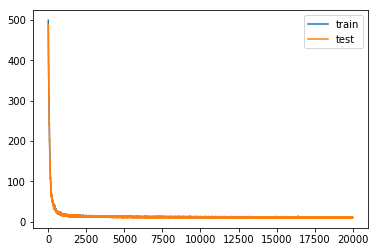

In [303]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [304]:
yhat = model.predict(validateX)

In [305]:
np.savetxt("yhat.csv", yhat.flatten(), delimiter=",")
np.savetxt("testingX.csv", validateX.flatten(), delimiter=",")
np.savetxt("testingY.csv", validateY.flatten(), delimiter=",")

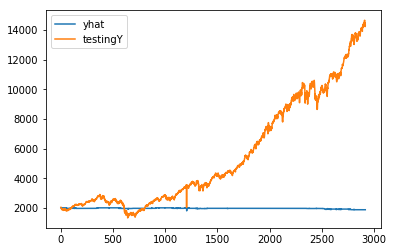

In [306]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [307]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 <= prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    growth.append(initial_capital)

10000
9940.525527667654
9740.528342992706
9582.57350811274
9583.21840264009
9553.940970426956
9400.184282020753
9315.704560178763
9404.64886150544
9304.108148617403
9228.216629423683
9286.128060563973
9378.414220917972
9415.79959444707
9213.292971248758
9313.114266299255
9502.300700192769
9502.63678570929
9281.763819653781
9304.424750915578
9268.946784462853
9254.27592104601
9194.008481726858
9039.113973369069
8983.671553074062
9034.335714068962
9282.990288248855
9231.052411854387
9131.229168482056
9135.640656196741
9310.16061039754
9243.202146816864
9265.369178493505
9303.997094272814
9175.081022181203
9227.01597609292
9487.033163213988
9497.617908662573
9565.502312195287
9422.926068638695
9429.202587429845
9315.26716192683
9235.08300265035
9341.74631690458
9202.88990681128
9065.996430966647
8977.943486879441
8994.697106337799
8978.727686417991
9154.233004386793
8931.666946656751
8832.380953030393
9012.064934254611
9076.630858622026
9007.805415643046
8907.969995259247
8907.96999525924

IndexError: index 2917 is out of bounds for axis 0 with size 2917

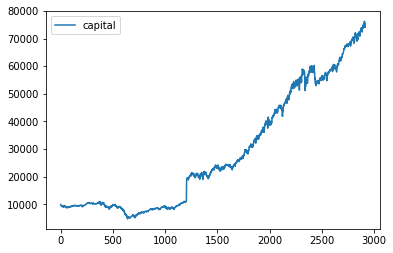

In [308]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()